<a href="https://www.kaggle.com/code/aditidutta/learning-about-my-fellow-kagglers?scriptVersionId=114697038" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<p style="text-align:center;"> <span style="font-size:30px;"> <b> Kaggle Survey Analysis 2021  </b> </span> </p>

![KagglePic](https://storage.googleapis.com/kaggle-competitions/kaggle/23724/logos/header.png?t=2020-10-31-23-22-58)


# Motivation
Before diving into the analysis, I would like to take a moment to state my motivation for taking up this challenge. Being a beginner myself, this is my first attempt at working on exploratory data analysis. To enhance my creativity skills, I used Plotly, especially because it enabled me to use beautiful interactive visualizations to support my analysis. This notebook is mostly a product of my experimentation with different kinds of graphs and my attempt at making a meaningful story out of the survey. I hope I was also able to learn quite a bit about my fellow Kagglers in the process! 

I am going to focus on trying to understand certain graphical interpretations/observations and see if it helps in answering certain questions. I hope you guys are there with me in this journey and see if we can explore together on this.

![GetStarted](https://c.tenor.com/r3XdvPsAV3kAAAAC/despicable-me-minions.gif)

# 1. Abstract

This is Kaggle's fifth online survey, and true to its data science community, it has given us an opportunity to explore and learn more about the global, diverse, and dynamic nature of the data science and machine learning industry. Being new to the community, I am awed by the variety of questions Kaggle put forward which gave me a better picture in understanding more about the industry (virtually) and try deciphering certain trends/representations/views which are popular currently.

<i>Disclaimer: The observations in the survey represent only a subset of the data science community. Please note that any unusual observations in the survey may vary from a general observations in the whole community. But for the time-being, let us all just focus on learning more about the people who participated in the survey.</i>


# 2.Importing data and the necessary libraries

In [1]:
!pip install circlify
!pip install venn

  Created wheel for venn: filename=venn-0.1.3-py3-none-any.whl size=19714 sha256=123c0ec98def88cd290e7e72cbf9872c462afcada7e98162bea6be70a015031a
  Stored in directory: /root/.cache/pip/wheels/85/8c/61/85a84e4c69c79c6475b9689755fc4ee4dae0bdc32b101011cb
Successfully built venn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
import circlify
from venn import venn
import gc
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')
df = df.iloc[1:,:] #The first row was describing the columns

# 3. Age

In [4]:
blue_colors = ['#189AB4', '#00B5F7','#17BECF','#19D3FE', '#2ED9FF','#0DF9F7', '#1CFFCE','rgb(179,226,205)','rgb(204, 235, 197)','#E6E6E6']


fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

n_ages = df['Q1'].value_counts().reset_index(name='total')

fig.add_trace(go.Bar(
     x=n_ages['index'], y=n_ages['total'], showlegend=False,
    text =n_ages['total'],
     name="Age-groups"), 
     row=1, col=1)
fig.update_yaxes(range=[0,5500])
#fig.update_layout(uniformtext_minsize=8)
fig.update_traces(textposition='outside', marker_color=blue_colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)
fig.update_layout(
    shapes=[
        dict(type="rect", xref="x", yref="y",
            x0=-0.5, y0=4000, x1=2.5, y1=5500, line_width=3)
    ])


fig.add_annotation(
        x=2.5,
        y=5000,
        xref="x",
        yref="y",
        text="18-29 age group make up for more than 50% of the respondants",
        showarrow=True,
        font=dict(
            family="Muli, sans-serif",
            size=10,
            color="#222A2A"
            ),
        align="right",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=120,
        ay=-20,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ffffff",
        opacity=0.8
        )


n_agegroup  = n_ages['index'].values


# pull is given as a fraction of the pie radius
fig.add_trace(go.Pie(
     values=n_ages['total'],
     labels=n_agegroup, pull=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], hole=.3, 
    marker_colors=blue_colors, opacity=0.6,
     name="Age-groups"),
    row=1, col=2)


fig.update_layout(title_text='Age groups of the participants', title_x=0.5,
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5))
fig.show()

From the above graphs, we see that most of the participants here are young, following the age group of 18-29. This might explain the current popularity of data science among the youngsters. Though the numbers among the elder groups seem small, it by no means undermines their interest on the subject. With the companies understanding the value of data science and hiring people to enrich their data and make it better, it is imperative that the applicants and workers demostrate the necessary skillset to help the compnies in their road to success. And this is where Kaggle plays a huge role. By providing an online community platform, it helps the budding aspirants and the experts connect. By sharing knowledge, providing online courses, hosting competitions, discussions, etc., it is helping the community to learn from one another and enhance their skills at the same time.

# 4. Gender 

In [5]:
blue_colors = ['#0099C6','#1CFFCE','rgb(179,226,205)','#E6E6E6']

df_q1_q2 = df.copy()
df_q1_q2 = pd.crosstab(df_q1_q2['Q1'], df_q1_q2['Q2']).reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=df_q1_q2['Q1'], y=df_q1_q2['Man'], name = "Man",
                 marker_color = 'rgb(0, 134, 149)', text = df_q1_q2['Man'], textposition = "outside",
))
fig.add_trace(go.Bar(x=df_q1_q2['Q1'], y=-df_q1_q2['Woman'], name = "Woman",
            marker_color = 'orange', text = df_q1_q2['Woman'], textposition = "outside"))
fig.add_trace(go.Bar(x=df_q1_q2['Q1'], y=-df_q1_q2['Nonbinary'], name = "Nonbinary",
            marker_color = '#316395', text = df_q1_q2['Nonbinary'], textposition = "outside"))
fig.add_trace(go.Bar(x=df_q1_q2['Q1'], y=-df_q1_q2['Prefer not to say'], name = "Prefer not to say",
            marker_color = 'rgb(179, 226, 205)', text = df_q1_q2['Prefer not to say'], textposition = "outside"))
fig.add_trace(go.Bar(x=df_q1_q2['Q1'], y=-df_q1_q2['Prefer to self-describe'], name = "Prefer to self-describe",
            marker_color = 'rgb(102,102,102)', text = df_q1_q2['Prefer to self-describe'], textposition = "outside"))
fig.add_annotation(
        x=5.5,
        y=3598,
        xref="x",
        yref="y",
        text="Male participants form more than half of the survey",
        showarrow=False,
            yshift=10,
        bgcolor="#ffffff",
        opacity=0.8
        )

fig.add_shape(type='line',
                x0=-0.5,
                y0=0.31,
                x1=11,
                y1=0.31,
                line=dict(color='black', dash='dot'),
                xref='x',
                yref='paper'
)

fig.update_layout(barmode='relative',
    title_text='Gender Ratio based on age groups',
    height=500, title_x = 0.5, yaxis_title=" ", 
    legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5)
)

fig.update_xaxes(visible=True, categoryorder='total descending')
fig.update_yaxes(visible=False, range=[-2000,4500])

We see that more than half of the survey participants are males. But the number of participants from other genders look promising for the younger groups, especially of the age 18-21. In the real world, it is seen that even though women take up a large portion of the working community, they still lack behind in the techinical sectors by a huge margin. Not so much is known about the other genders though. But if we follow the trend observed in this survey, even though it corresponds to the real world, we can say that the other genders are gradually working becoming more prominant in the tech industry. And it won't be long until we see more of their participation!

# 5. Country 

In [6]:
n_country = df['Q3'].value_counts().reset_index(name='total')


blue_colors = ['#19D3F3', '#17BECF', '#0099C6', '#1CFFCE', '#2ED9FF', '#00B5F7', '#0DF9FF', '#22FFA7', 
    'rgb(102, 197, 204)', 'rgb(56, 166, 165)', 'rgb(47, 138, 196)', '#2ED9FF']

df['Q3'] = np.where((df['Q3'] == 'United States of America'),'USA',df['Q3'])
df['Q3'] = np.where((df['Q3'] == 'United Kingdom of Great Britain and Northern Ireland'),'UK & North Ireland',df['Q3'])

n_undisclosed_loc= df.loc[df.Q3 == 'I do not wish to disclose my location', 'Q3'].count()
n_other_loc= df.loc[df.Q3 == 'Other', 'Q3'].count()

df_234 = df[['Q2','Q3','Q4']]
df_234=df_234.rename(columns={'Some college/university study without earning a bachelor’s degree':'Without Bachelor’s degree'})
df_m = df_234[df_234['Q2']=='Man']
df_w = df_234[df_234['Q2']=='Woman']
df_o = df_234[(df_234['Q2'] != 'Man') & (df_234['Q2'] != 'Woman')]

blue_colors = {'Bachelor’s degree':'#0099C6', 'Master’s degree':'#17BECF',
              'Doctoral degree':'#19D3F3', 'I prefer not to answer':'#2ED9FF',
              'High school passout':'#1CFFCE', 'Professional doctorate':'rgb(204, 235, 197)',
              'Higher study w/o bachelor’s': 'rgb(102, 102, 102)'}

# Needs a little modification for some of the country names
df_m['Q3'] = np.where((df_m['Q3'] == 'United States of America'),'USA',df_m['Q3'])
df_m['Q3'] = np.where((df_m['Q3'] == 'United Kingdom of Great Britain and Northern Ireland'),'UK',df_m['Q3'])

df_m['Q4'] = np.where((df_m['Q4'] == 'No formal education past high school'),'High school passout',df_m['Q4'])
df_m['Q4'] = np.where((df_m['Q4'] == 'Some college/university study without earning a bachelor’s degree'),'Higher study w/o bachelor’s',df_m['Q4'])


df_w['Q3'] = np.where((df_w['Q3'] == 'United States of America'),'USA',df_w['Q3'])
df_w['Q3'] = np.where((df_w['Q3'] == 'United Kingdom of Great Britain and Northern Ireland'),'UK',df_w['Q3'])

df_w['Q4'] = np.where((df_w['Q4'] == 'No formal education past high school'),'High school passout',df_w['Q4'])
df_w['Q4'] = np.where((df_w['Q4'] == 'Some college/university study without earning a bachelor’s degree'),'Higher study w/o bachelor’s',df_w['Q4'])

df_o['Q3'] = np.where((df_o['Q3'] == 'United States of America'),'USA',df_o['Q3'])
df_o['Q3'] = np.where((df_o['Q3'] == 'United Kingdom of Great Britain and Northern Ireland'),'UK',df_o['Q3'])

df_o['Q4'] = np.where((df_o['Q4'] == 'No formal education past high school'),'High school passout',df_o['Q4'])
df_o['Q4'] = np.where((df_o['Q4'] == 'Some college/university study without earning a bachelor’s degree'),'Higher study w/o bachelor’s',df_o['Q4'])

df_o.drop(df_o.index[df_o['Q3'] == 'Other'], inplace = True)
df_o.drop(df_o.index[df_o['Q3'] == 'I do not wish to disclose my location'], inplace = True)

n_country_gen = df_o['Q3'].value_counts().reset_index(name='total')

df_w.drop(df_w.index[df_w['Q3'] == 'Other'], inplace = True)

n_country_female = df_w['Q3'].value_counts().reset_index(name='total')

df_m.drop(df_m.index[df_m['Q3'] == 'Other'], inplace = True)

n_country_male = df_m['Q3'].value_counts().reset_index(name='total')


fig1 = go.Figure(data=[go.Choropleth(locations = n_country['index'],
                                            z = n_country['total'],
                                            zmid = 4000,
                                            locationmode = 'country names',
                                            colorscale = 'Blugrn', name='All',
                                            colorbar_title = "No. of respondants"),   
                    go.Choropleth(locations = n_country_male['index'],
                                            z = n_country_male['total'],
                                            zmid = 3000,
                                            locationmode = 'country names',
                                            colorscale = 'Blugrn', name='Men',
                                            colorbar_title = "No. of male respondants"),
                    go.Choropleth(locations = n_country_female['index'],
                                            z = n_country_female['total'],
                                            zmid = 3000,
                                            locationmode = 'country names',
                                            colorscale = 'Blugrn', name='Women',
                                            colorbar_title = "No. of female respondants"),
                    go.Choropleth(locations = n_country_gen['index'],
                                            z = n_country_gen['total'],
                                            zmid = 3000,
                                            locationmode = 'country names',
                                            colorscale = 'Blugrn', name='Other Genders',
                                            colorbar_title = "No. of other respondants")
                ])


fig1.update_layout(
    title_text = 'Participations from each countries for all genders', title_x=0.5, title_y=0.94,
                         geo = dict(showframe = False,
                                    showcoastlines = False,
                                    projection_type = 'equirectangular'),
    annotations = [dict(
        x=0.5,
        y=0,    #Trying a negative number makes the caption disappear - I'd like the caption to be below the map
        xref='paper',
        yref='paper',
        text=" No. of respondants who did not wish to disclose <br> their location: " + str(n_undisclosed_loc) +
           "<br> and who are from other (unlisted) countries: " + str(n_other_loc),
        showarrow = False,
        font=dict(
                family="Muli, sans-serif",
                size=14,
                color="#ffffff"
                ),
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#222A2A",
        opacity=0.8
    )], 
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[{"visible": [True, False, False, False]}]),
                dict(label="Men",
                     method="update",
                     args=[{"visible": [False, True, False, False]}]),
                dict(label="Women",
                     method="update",
                     args=[{"visible": [False, False, True, False]}]),
                dict(label="Other/Undisclosed Genders",
                     method="update",
                     args=[{"visible": [False, False, False, True]}])
                            ]
                         ))])
fig1.update_layout(
    margin=dict(l=10, r=10, t=10, b=10))  

fig1.show()



df_m_sort = pd.crosstab( index=df_m['Q3'], columns=df_m['Q4'], margins=True, margins_name='Total')
df_m_sort = df_m_sort.sort_values(by='Total', ascending=False).head(11)
df_m_sort = df_m_sort.iloc[1:,:-1]

df_w_sort = pd.crosstab( index=df_w['Q3'], columns=df_w['Q4'], margins=True, margins_name='Total')
df_w_sort = df_w_sort.sort_values(by='Total', ascending=False).head(11)
df_w_sort = df_w_sort.iloc[1:,:-1]

df_o_sort = pd.crosstab( index=df_o['Q3'], columns=df_o['Q4'], margins=True, margins_name='Total')
df_o_sort = df_o_sort.sort_values(by='Total', ascending=False).head(11)
df_o_sort = df_o_sort.iloc[1:,:-1]

fig2 = make_subplots(rows=1, cols=3, specs=[[{"type": "bar"}, {"type": "bar"}, {"type": "bar"}]],
                    subplot_titles=('Gender type 1', 'Gender type 2','Gender type 3'))

for col in df_m_sort.columns:
    fig2.add_trace(go.Bar(x=df_m_sort.index, y=df_m_sort[col], name = col, text=df_m_sort[col], 
                          marker_color=blue_colors[col], textposition = 'outside', showlegend=False), row=1, col=1)
    fig2.add_trace(go.Scatter(x=df_m_sort.index, y=df_m_sort[col], name = col, line = dict(
        color = blue_colors[col],
        width = 0.5), showlegend=False),
              row = 1, col = 1)

for col in df_w_sort.columns:
    fig2.add_trace(go.Bar(x=df_w_sort.index, y=df_w_sort[col], name = col, text=df_w_sort[col],
                          marker_color=blue_colors[col], textposition = 'outside', showlegend=False), row=1, col=2)
    fig2.add_trace(go.Scatter(x=df_w_sort.index, y=df_w_sort[col], name = col, line = dict(
        color = blue_colors[col],
        width = 0.5), showlegend=False),
              row = 1, col = 2)
    
for col in df_o_sort.columns:
    fig2.add_trace(go.Bar(x=df_o_sort.index, y=df_o_sort[col], name = col, text=df_o_sort[col],
                          marker_color=blue_colors[col], textposition = 'outside'), row=1, col=3)
    fig2.add_trace(go.Scatter(x=df_o_sort.index, y=df_o_sort[col], name = col, line = dict(
        color = blue_colors[col],
        width = 0.5),showlegend=False),
              row = 1, col = 3)

names = {'Gender type 1':'Man', 'Gender type 2':'Woman', 'Gender type 3':'Other/Undisclosed gender'}
fig2.for_each_annotation(lambda a: a.update(text = names[a.text]))

fig2.update_layout(
    title_text = 'Top 10 countries with participations from each gender based on their qualifications', title_x=0.5, title_y=0.98,
                 legend=dict(orientation="h", yanchor="bottom", y=1.097, xanchor="center", x=0.5))
fig2.show()

We see that most of the participants are from the Asian countries. Along with United States of America, it seems that those countries form the vast majority of the participants along all the genders. India clearly dominating over other countries on the number of particpation. Following behind, are the European countries and Australia. But the particpations from the Africa, South America and the Middle-East countries seem to be very less. One possible explanation could be because of the lack of connectivity, or the access to technology, or it could be because of important socio-economic features like formal education, working with machine learning and yearly compensations. 

# 6. Formal education

In [7]:
blue_colors = ['#0099C6', '#17BECF', '#19D3F3', '#2ED9FF', '#1CFFCE', 'rgb(204, 235, 197)']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

n_roles = df['Q4'].value_counts().reset_index(name='total')
n_roles= n_roles.replace({'Some college/university study without earning a bachelor’s degree': 'Without Bachelor’s degree'})

fig.add_trace(go.Bar(
     x=n_roles['index'], y=n_roles['total'], showlegend=False, 
    text =n_roles['total'],
     name="Jobs roles"), 
     row=1, col=1)
fig.update_traces(textposition='outside', marker_color=blue_colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)
fig.update_yaxes(range=[0,11000])

n_jobcategory  = n_roles['index'].values


# pull is given as a fraction of the pie radius
fig.add_trace(go.Pie(
     values=n_roles['total'],
     labels=n_jobcategory, pull=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], hole=.3, 
    marker_colors=blue_colors, opacity=0.6,
     name="Job Role"),
    row=1, col=2)

fig.add_annotation(
        x=4,
        y=9000,
        xref="x",
        yref="y",
        text="Most of the participants <br> pursued/are pursuing <br> higher studies",
        showarrow=False,
            yshift=10,
        bgcolor="#ffffff",
        opacity=0.8
        )


fig.update_layout(title_text='Job roles of the participants', title_x=0.5,title_y=0.97,
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5), height=450)
fig.show()

Most of the particpants are either pursuing/pursued higher studies, which makes us question if that can explain the huge particpation from the younger community. So we look into our next data.

# 7. Profession

In [8]:
blue_colors = ['#19D3F3', '#17BECF', '#0099C6', '#1CFFCE', '#2ED9FF', '#00B5F7', '#0DF9FF', '#22FFA7', 
    'rgb(102, 197, 204)', 'rgb(56, 166, 165)', 'rgb(47, 138, 196)', '#2ED9FF','#0DF9F7', '#1CFFCE','rgb(179,226,205)','rgb(204, 235, 197)','#E6E6E6']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

n_roles = df['Q5'].value_counts().reset_index(name='total')

fig.add_trace(go.Bar(
     x=n_roles['index'], y=n_roles['total'], showlegend=False,
    text =n_roles['total'],
     name="Jobs roles"), 
     row=1, col=1)
#fig.update_layout(uniformtext_minsize=8)
fig.update_traces(textposition='outside', marker_color=blue_colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)

fig.add_annotation(
        x=0.6,
        y=6804,
        xref="x",
        yref="y",
        text="Students participated the most in this survey, <br> more than a quarter of the respondants",
        showarrow=True,
        font=dict(
            family="Muli, sans-serif",
            size=10,
            color="#222A2A"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=120,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ffffff",
        opacity=0.8
        )



n_jobcategory  = n_roles['index'].values


# pull is given as a fraction of the pie radius
fig.add_trace(go.Pie(
     values=n_roles['total'],
     labels=n_jobcategory, pull=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], hole=.3, 
    marker_colors=blue_colors, opacity=0.6,
     name="Job Role"),
    row=1, col=2)

#fig.update_traces(opacity=0.6)

fig.update_layout(title_text='Job roles of the participants', title_x=0.5, title_y=0.996,
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5))
fig.show()

df_profession_male = df[df['Q2'] == 'Man'][['Q2', 'Q5']]
df_profession_male = df_profession_male['Q5'].value_counts().rename_axis('Profession').reset_index(name='Counts').sort_values(by=['Counts'], ascending=False)
df_profession_male['Gender'] = 'Man'

df_profession_female = df[df['Q2'] == 'Woman'][['Q2', 'Q5']]
df_profession_female = df_profession_female['Q5'].value_counts().rename_axis('Profession').reset_index(name='Counts').sort_values(by=['Counts'], ascending=False)
df_profession_female['Gender'] = 'Woman'

df_profession_other = df[(df['Q2'] != 'Man') & (df['Q2'] != 'Woman')][['Q2', 'Q5']]
df_profession_other = df_profession_other['Q5'].value_counts().rename_axis('Profession').reset_index(name='Counts').sort_values(by=['Counts'], ascending=False)
df_profession_other['Gender'] = 'Others'

df_gen_prof = pd.concat([df_profession_male, df_profession_female, df_profession_other], axis=0)
fig1 = px.funnel(df_gen_prof, x='Counts', y='Profession', color='Gender',
                       height=500, title='Profession by gender',
                       category_orders={'Gender': ['Man', 'Woman', 'Others']},
                       color_discrete_sequence=['teal', 'orange', 'lightblue'],
                       )
fig1.update_traces(textposition='inside')
fig1.update_layout(autosize=True,
                         margin=dict(t=110, b=50, l=70, r=40), title_x=0.5, title_y=0.92,
                         plot_bgcolor='white', paper_bgcolor='white', 
                         title_font=dict(size=21, color='#222A2A', family="Muli, sans-serif"),
                         font=dict(color='#222A2A'),
                         legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5))
fig1.update_layout(
                 margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                        ))

As expected, most of the participants are students, consisting of more than a quarter of the lot, along all the genders. Considering that the Kaggle platform is very much useful for the beginners and ameteurs in learning, pursuing and enhancing their data science skillsets, it is no wonder that they form a large chunk of the Kaggle cimmunity. Following closely behind are the Data Scientists/Analysts and Software Engineers. From the graph, we see that both the experts(professionals) and the beginners participate well in this platform. But participation from some professions seem to be lacking, particularly the ones which are not directly related to the field, or may not need so much coding in their work (eg., statisticians, developer relations, etc.). Maybe we can explain it better in the later stages?

# 8. Coding experience

In [9]:
blue_colors = ['#0099C6', '#17BECF', '#19D3F3', '#2ED9FF', '#1CFFCE', 'rgb(204, 235, 197)','#E6E6E6']


fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

n_coding = df['Q6'].value_counts().reset_index(name='total')

fig.add_trace(go.Bar(
     x=n_coding['index'], y=n_coding['total'], showlegend=False,
    text =n_coding['total'],
     name="Coding experience"), 
     row=1, col=1)
fig.update_traces(textposition='outside', marker_color=blue_colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)

fig.update_layout(
    shapes=[
        dict(type="rect", xref="x", yref="y",
            x0=-0.5, y0=5000, x1=1.5, y1=8500, line_width=3),
        dict(type="rect", xref="x", yref="y",
            x0=5.5, y0=900, x1=6.5, y1=1500, line_width=3)
    ])

fig.add_annotation(
        x=3,
        y=7874,
        xref="x",
        yref="y",
        text="Most are beginners and/or amateurs",
        showarrow=False,
            yshift=10,
        bgcolor="#ffffff",
        opacity=0.8
        )


n_codgroup  = n_coding['index'].values


# pull is given as a fraction of the pie radius
fig.add_trace(go.Pie(
     values=n_coding['total'],
     labels=n_codgroup, pull=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], hole=.3, 
    marker_colors=blue_colors, opacity=0.6,
     name="Coding Exp"),
    row=1, col=2)


fig.update_layout(title_text='Coding experiences of the participants', title_x=0.5,
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                 height=450)
fig.show()

Again, we see that more than 50% of the participants have beginner level coding experience (or no experience at all). This could explain the participation of youngsters, and ALSO the particpations of other community members who might be from other professions and deciding to explore this field, or who want to switch to data science in the future. 

Maybe we can check if coding experience matters more or degrees in securing a job?

In [10]:
df_456 = df[['Q4', 'Q5', 'Q6']]
df_456['Q6'] = df_456['Q6'].replace(dict.fromkeys(['I have never written code', '< 1 years', '1-3 years'],'Beginner'))
df_456['Q6'] = df_456['Q6'].replace(dict.fromkeys(['3-5 years', '5-10 years'],'Intermediate'))
df_456['Q6'] = df_456['Q6'].replace(dict.fromkeys(['10-20 years', '20+ years'],'Expert'))
df_456['Q4'] = df_456['Q4'].replace({'Some college/university study without earning a bachelor’s degree': 'Without Bachelor’s degree'})

df_456 = round(pd.crosstab(df_456['Q4'], [df_456['Q5'],df_456['Q6']], normalize='index'), 2).T.reset_index()

df_456_beginner = df_456[df_456['Q6']=='Beginner'].sort_values(by=["Q5"]).reset_index().drop('index', axis=1)
df_456_intermediate = df_456[df_456['Q6']=='Intermediate'].sort_values(by=["Q5"]).reset_index().drop('index', axis=1)
df_456_expert = df_456[df_456['Q6']=='Expert'].sort_values(by=["Q5"]).reset_index().drop('index', axis=1)

fig = make_subplots(rows=1, cols=7, shared_yaxes=True, horizontal_spacing=0, vertical_spacing=0)                    
fig.add_trace(go.Bar(y=df_456_beginner['Q5'], x=df_456_beginner['Bachelor’s degree'], marker_color='teal', name='Beginner-level coding experience',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_456_intermediate['Q5'], x=df_456_intermediate['Bachelor’s degree'], marker_color='orange', name='Intermediate-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_456_expert['Q5'], x=df_456_expert['Bachelor’s degree'], marker_color='rgb(102, 102, 102)', name='Expert-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=1)



fig.add_trace(go.Bar(y=df_456_beginner['Q5'], x=df_456_beginner['Master’s degree'], marker_color='teal', name='Beginner-level coding experience',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_456_intermediate['Q5'], x=df_456_intermediate['Master’s degree'], marker_color='orange', name='Intermediate-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_456_expert['Q5'], x=df_456_expert['Master’s degree'], marker_color='rgb(102, 102, 102)', name='Expert-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=2)


fig.add_trace(go.Bar(y=df_456_beginner['Q5'], x=df_456_beginner['Doctoral degree'], marker_color='teal', name='Beginner-level coding experience',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=3)
fig.add_trace(go.Bar(y=df_456_intermediate['Q5'], x=df_456_intermediate['Doctoral degree'], marker_color='orange', name='Intermediate-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=3)
fig.add_trace(go.Bar(y=df_456_expert['Q5'], x=df_456_expert['Doctoral degree'], marker_color='rgb(102, 102, 102)', name='Expert-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=3)


fig.add_trace(go.Bar(y=df_456_beginner['Q5'], x=df_456_beginner['Professional doctorate'], marker_color='teal', name='Beginner-level coding experience',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=4)
fig.add_trace(go.Bar(y=df_456_intermediate['Q5'], x=df_456_intermediate['Professional doctorate'], marker_color='orange', name='Intermediate-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=4)
fig.add_trace(go.Bar(y=df_456_expert['Q5'], x=df_456_expert['Professional doctorate'], marker_color='rgb(102, 102, 102)', name='Expert-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=4)


fig.add_trace(go.Bar(y=df_456_beginner['Q5'], x=df_456_beginner['I prefer not to answer'], marker_color='teal', name='Beginner-level coding experience',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=5)
fig.add_trace(go.Bar(y=df_456_intermediate['Q5'], x=df_456_intermediate['I prefer not to answer'], marker_color='orange', name='Intermediate-level coding experience', 
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=5)
fig.add_trace(go.Bar(y=df_456_expert['Q5'], x=df_456_expert['I prefer not to answer'], marker_color='rgb(102, 102, 102)', name='Expert-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=5)


fig.add_trace(go.Bar(y=df_456_beginner['Q5'], x=df_456_beginner['Without Bachelor’s degree'],  marker_color='teal', name='Beginner-level coding experience',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=6)
fig.add_trace(go.Bar(y=df_456_intermediate['Q5'], x=df_456_intermediate['Without Bachelor’s degree'], marker_color='orange', name='Intermediate-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=6)
fig.add_trace(go.Bar(y=df_456_expert['Q5'], x=df_456_expert['Without Bachelor’s degree'], marker_color='rgb(102, 102, 102)', name='Expert-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=6)

fig.add_trace(go.Bar(y=df_456_beginner['Q5'], x=df_456_beginner['No formal education past high school'],  marker_color='teal', name='Beginner-level coding experience',
                     orientation='h', opacity=0.8),
                     row=1, col=7)
fig.add_trace(go.Bar(y=df_456_intermediate['Q5'], x=df_456_intermediate['No formal education past high school'], marker_color='orange', name='Intermediate-level coding experience',
                     orientation='h', opacity=0.8),
                     row=1, col=7)
fig.add_trace(go.Bar(y=df_456_expert['Q5'], x=df_456_expert['No formal education past high school'], marker_color='rgb(102, 102, 102)', name='Expert-level coding experience',
                     orientation='h', opacity=0.8),
                     row=1, col=7)

fig.update_xaxes(zeroline=False,showticklabels=False, ticks="")
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_yaxes(tickmode='array', showline=False, showgrid=False,
                 tickvals=['Business Analyst', 'Currently not employed',
                       'DBA/Database Engineer', 'Data Analyst', 'Data Engineer',
                       'Data Scientist', 'Developer Relations/Advocacy',
                       'Machine Learning Engineer', 'Other', 'Product Manager',
                       'Program/Project Manager', 'Research Scientist',
                       'Software Engineer', 'Statistician', 'Student'],
                 ticktext=['Business Analyst', 'Currently not employed',
                       'DBA/Database Engineer', 'Data Analyst', 'Data Engineer',
                       'Data Scientist', 'Developer Relations/Advocacy',
                       'Machine Learning Engineer', 'Other', 'Product Manager',
                       'Program/Project Manager', 'Research Scientist',
                       'Software Engineer', 'Statistician', 'Student'])
fig.update_layout(height=550, 
                  title_text="Degree and Job title based on Coding Experience", title_x =0.5, title_y = 0.96,
                  template="plotly_white", barmode='stack',
                  autosize=True,
                  margin=dict(t=80, b=50, l=70, r=40),
                 plot_bgcolor='white', paper_bgcolor='white', 
                title_font=dict(size=21, color='#222A2A', family="Muli, sans-serif"),
                         font=dict(color='#222A2A'),
                         legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5)
                 )


fig['layout']['xaxis'].update(title_text='Bachelor\'s<br> degree', title_font=dict(size=12))
fig['layout']['xaxis2'].update(title_text='Master\'s<br> degree', title_font=dict(size=12))
fig['layout']['xaxis3'].update(title_text='Doctoral\'s<br> degree', title_font=dict(size=12))
fig['layout']['xaxis4'].update(title_text='Professional<br> doctorate', title_font=dict(size=12))
fig['layout']['xaxis5'].update(title_text='Prefer<br> not to<br> answer', title_font=dict(size=12))
fig['layout']['xaxis6'].update(title_text='Without<br> Bachelor\'s<br> degree', title_font=dict(size=12))
fig['layout']['xaxis7'].update(title_text='No formal<br> education<br> past high<br>school', title_font=dict(size=12))



fig.show()

For the key data science related professions, we mostly see the intermediate and the expert level coders. While students and currently unemployed people also form a huge portion of this category, we can see a clear difference in coding experience among the professions which had showed low particpation rate. But interestingly enough, even the related fields of data science have professionals with beginner level of coding experience. 

Like we discussed before, other genders seem to have lesser particpation than men in the tech world. Is it consistent in all the countries around the world? Let's check through our data in the survey.

In [11]:
dfb = df[df['Q2']=='Man']
dfb = pd.crosstab(dfb['Q3'], dfb['Q6'], margins=True, margins_name="Total").sort_values(by='Total', ascending=False).reset_index()
dfb = dfb.iloc[1:, :-1]
dfb = dfb.loc(axis=0)[1,2,3,16,7,10,8,6,11,5].reset_index(drop=True)
cm1 = sns.light_palette("teal", as_cmap=True)
dfb.style.background_gradient(axis=1, cmap=cm1)


dfg = df[df['Q2']=='Woman']
dfg = pd.crosstab(dfg['Q3'], dfg['Q6'], margins=True, margins_name="Total").sort_values(by='Total', ascending=False).reset_index()
dfg = dfg.iloc[1:, :-1]
dfg = dfg.loc(axis=0)[1,2,3,16,7,10,8,6,11,5].reset_index(drop=True)
cm2 = sns.light_palette("#5A9", as_cmap=True)
dfg.style.background_gradient(axis=1, cmap=cm2)


dfo = df[(df['Q2'] != 'Man') & (df['Q2'] != 'Woman')]
dfo = pd.crosstab(dfo['Q3'], dfo['Q6'], margins=True, margins_name="Total").sort_values(by='Total', ascending=False).reset_index()
dfo = dfo.iloc[1:, :-1]
dfo = dfo.loc(axis=0)[1,2,3,16,7,10,8,6,11,5].reset_index(drop=True)


df_gender_wise = pd.merge(dfb, dfg, left_index=True, right_index=True)
df_gender_wise = pd.merge(df_gender_wise, dfo, left_index=True, right_index=True)
df_gender_wise.drop(['Q3', 'Q3_y'], axis='columns', inplace=True)

df_gender_wise.rename(columns={"1-3 years_x": "1-3 years", 
                               '10-20 years_x': "1-3 years", '20+ years_x': "20+ years", 
                               '3-5 years_x': "3-5 years", '5-10 years_x': "5-10 years", 
                               '< 1 years_x': "< 1 years",  'I have never written code_x': "I have never written code",                             
                               "1-3 years_y": "1-3 years",
                               '10-20 years_y': "1-3 years", '20+ years_y': "20+ years", 
                               '3-5 years_y': "3-5 years", '5-10 years_y': "5-10 years", 
                               '< 1 years_y': "< 1 years", 'I have never written code_y': "I have never written code"
                              }, inplace = True)

df_gender_wise_1 = df_gender_wise.iloc[:, 0]
df_gender_wise_2 = df_gender_wise.iloc[:, 1:]

df_gender_wise_2.columns = pd.MultiIndex.from_product([['Men', 'Women', 'Other Genders'],['1-3 years', '10-20 years', '20+ years', '3-5 years', '5-10 years',
       '< 1 years', 'I have never written code']])

df_gender_wise = pd.concat([df_gender_wise_1, df_gender_wise_2], axis=1)
df_gender_wise = df_gender_wise.rename({'Q3_x' : 'Country'}, axis=1)

cm1 = sns.light_palette("teal", as_cmap=True)
cm2 = sns.light_palette("orange", as_cmap=True)
cm3 = sns.light_palette("lightblue", as_cmap=True)


df_gender_wise.style.background_gradient(cmap=cm1, subset=[('Men', '1-3 years'),
                               ('Men', '10-20 years'),
                                 ('Men', '20+ years'),
                                 ('Men', '3-5 years'),
                                ('Men', '5-10 years'),
                                 ('Men', '< 1 years'),
                 ('Men', 'I have never written code')])\
    .background_gradient(cmap=cm2, subset=[('Women', '1-3 years'),
                             ('Women', '10-20 years'),
                               ('Women', '20+ years'),
                               ('Women', '3-5 years'),
                              ('Women', '5-10 years'),
                               ('Women', '< 1 years'),
               ('Women', 'I have never written code')])\
    .background_gradient(cmap=cm3, subset=[('Other Genders', '1-3 years'),
                     ('Other Genders', '10-20 years'),
                       ('Other Genders', '20+ years'),
                       ('Other Genders', '3-5 years'),
                      ('Other Genders', '5-10 years'),
                       ('Other Genders', '< 1 years'),
       ('Other Genders', 'I have never written code')])\
    .set_caption("Genders and their years of experience in the top 10 countries of participation")\
    .format(precision=2).set_properties(**{
        'width': '20px',
        'max-width': '20px',
        'font-size': '8pt'
    })

,Country,"('Men', '1-3 years')","('Men', '10-20 years')","('Men', '20+ years')","('Men', '3-5 years')","('Men', '5-10 years')","('Men', '< 1 years')","('Men', 'I have never written code')","('Women', '1-3 years')","('Women', '10-20 years')","('Women', '20+ years')","('Women', '3-5 years')","('Women', '5-10 years')","('Women', '< 1 years')","('Women', 'I have never written code')","('Other Genders', '1-3 years')","('Other Genders', '10-20 years')","('Other Genders', '20+ years')","('Other Genders', '3-5 years')","('Other Genders', '5-10 years')","('Other Genders', '< 1 years')","('Other Genders', 'I have never written code')"
0,India,2074,289,92,842,495,1675,214,619,46,10,233,145,537,66,35,8,1,15,8,27,3
1,USA,372,283,392,297,342,195,68,140,60,48,94,81,132,51,19,10,17,15,17,14,3
2,Other,285,91,84,171,138,193,42,65,13,8,51,19,52,19,3,5,9,6,5,8,3
3,France,62,36,48,80,69,28,3,9,8,7,10,7,25,2,0,1,2,1,3,0,0
4,Russia,181,55,53,114,72,143,12,48,1,1,16,7,33,0,1,1,7,3,1,0,0
5,UK & North Ireland,104,53,70,67,74,54,7,22,9,5,8,12,23,2,2,1,0,2,2,1,0
6,Nigeria,228,12,2,73,45,196,38,31,8,3,9,8,37,8,5,0,0,3,0,3,1
7,Brazil,141,83,87,116,107,111,19,41,1,0,7,1,44,13,1,2,4,3,2,4,1
8,Spain,74,53,86,63,60,44,9,26,3,0,17,2,27,6,3,1,1,1,2,0,0
9,China,286,37,11,134,56,142,6,25,9,9,16,15,30,9,5,4,3,4,0,4,1


We see the usual trend even through this above table, and the participation among the top 10 countries seem to show a consistent result on the amount of coding experience of the participants, as per their genders. While most of the participants show beginner and intermediate level of coding, for the top 2 countries like India and USA, some good portion of participants seem to have 10-20 years of experience (though most of them are from the male participants). This further adds to our previous analysis- could it be because of ease of understanding and working with certain coding languages? Sometimes it might help the user in learning the basics of the coding language quickly and apply their skills in improving on it further. 


# 9. Coding languages used vs preferred

In [12]:
Q7_values = df.loc[:,['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4',
       'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9',
       'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER']]

blue_colors = ['#19D3F3', '#17BECF', '#0099C6', '#1CFFCE', '#2ED9FF', '#00B5F7', '#0DF9FF', '#22FFA7', 
    'rgb(102, 197, 204)', 'rgb(56, 166, 165)', 'rgb(47, 138, 196)', '#2ED9FF']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

fig.add_trace(go.Bar(
     x=Q7_values.stack().unique(), y=Q7_values.stack().value_counts().values, showlegend=False,
    text =Q7_values.stack().value_counts().values,
     name="Programming language"), 
     row=1, col=1)
#fig.update_layout(uniformtext_minsize=8)
fig.update_traces(textposition='outside', marker_color=blue_colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)

# pull is given as a fraction of the pie radius
fig.add_trace(go.Pie(
     values=Q7_values.stack().value_counts().values,
     labels=Q7_values.stack().unique(), pull=[0.08, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], hole=.3, 
    marker_colors=blue_colors, opacity=0.6,
     name="Programming language"),
    row=1, col=2)


#fig.update_traces(opacity=0.6)

fig.update_layout(title_text='Preferred programming language by participants', title_x=0.5, title_y=0.95,
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5), height= 350)
fig.show()

blue_colors = ['#0099C6', '#19D3F3', '#17BECF', '#1CFFCE', '#2ED9FF', '#00B5F7', '#0DF9FF', '#22FFA7', 
    'rgb(102, 197, 204)', 'rgb(56, 166, 165)', 'rgb(47, 138, 196)', '#2ED9FF']

fig1 = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

n_recom_coding = df['Q8'].value_counts().reset_index(name='total')

fig1.add_trace(go.Bar(
     x=n_recom_coding['index'], y=n_recom_coding['total'], showlegend=False,
    text =n_recom_coding['total'],
     name="Coding experience"), 
     row=1, col=1)

fig1.update_traces(textposition='outside', marker_color=blue_colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)
fig1.add_trace(go.Scatter(x=n_recom_coding['index'], y=n_recom_coding['total'], showlegend=False, line = dict(
        color = 'red',
        width = 1.5)), row=1, col=1)

fig1.add_annotation(
        x=0.6,
        y=12000,
        xref="x",
        yref="y",
        text="A huge gap in <br> between Python and <br> other coding language <br> suggestions",
        showarrow=True,
        font=dict(
            family="Muli, sans-serif",
            size=10,
            color="#222A2A"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=120,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ffffff",
        opacity=0.8
        )

fig1.add_shape(type='line',
                x0=0.5,
                y0=0,
                x1=0.5,
                y1=1,
                line=dict(color='black', dash='dot'),
                xref='x',
                yref='paper'
)

n_reccodgroup  = n_recom_coding['index'].values

# pull is given as a fraction of the pie radius
fig1.add_trace(go.Pie(
     values=n_recom_coding['total'],
     labels=n_reccodgroup, pull=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05], hole=.3, 
    marker_colors=blue_colors, opacity=0.6,
     name="Coding Recom"),
    row=1, col=2)


fig1.update_layout(title_text='Coding recommendations of the participants', title_x=0.5, title_y=0.96,
                 legend=dict(orientation="h", yanchor="bottom", y=1.07, xanchor="center", x=0.5),
                 height=350)
fig1.show()

In [13]:
df_q6_q7 = df[['Q6',"Q7_Part_1", "Q7_Part_2", "Q7_Part_3",
                                 "Q7_Part_4", "Q7_Part_5", "Q7_Part_6",
                                 "Q7_Part_7", "Q7_Part_8", "Q7_Part_9",
                                 "Q7_Part_10", "Q7_Part_11", "Q7_Part_12", "Q14_OTHER"]]

df_q6_q7['Q6'] = df_q6_q7['Q6'].replace(dict.fromkeys(['I have never written code', '< 1 years', '1-3 years'],'Beginner'))
df_q6_q7['Q6'] = df_q6_q7['Q6'].replace(dict.fromkeys(['3-5 years', '5-10 years'],'Intermediate'))
df_q6_q7['Q6'] = df_q6_q7['Q6'].replace(dict.fromkeys(['10-20 years', '20+ years'],'Expert'))

df_q6_q7 = df_q6_q7.groupby(['Q6'])[["Q7_Part_1", "Q7_Part_2", "Q7_Part_3",
                                 "Q7_Part_4", "Q7_Part_5", "Q7_Part_6",
                                 "Q7_Part_7", "Q7_Part_8", "Q7_Part_9",
                                 "Q7_Part_10", "Q7_Part_11", "Q7_Part_12", "Q14_OTHER"] 
                                 ].count().unstack().fillna(0).reset_index(name='counts')


df_q6_q7_beginner = df_q6_q7[df_q6_q7['Q6'] == 'Beginner'].drop(columns='Q6').sort_values(by='counts', axis=0, ascending=False)
df_q6_q7_intermediate = df_q6_q7[df_q6_q7['Q6'] == 'Intermediate'].drop(columns='Q6').sort_values(by='counts', axis=0, ascending=False)
df_q6_q7_expert = df_q6_q7[df_q6_q7['Q6'] == 'Expert'].drop(columns='Q6').sort_values(by='counts', axis=0, ascending=False)

#df_q6_q7 = df_q6_q7.sort_values(by='counts', ascending = True).tail()
df_q6_q7 = pd.merge(df_q6_q7_beginner, df_q6_q7_intermediate, on='level_0')
df_q6_q7 = pd.merge(df_q6_q7, df_q6_q7_expert, on='level_0')
names = ['Q7', 'Beginner', 'Intermediate', 'Expert']
df_q6_q7.columns = names
df_q6_q7["All"] = df_q6_q7.sum(axis=1)
df_q6_q7 = df_q6_q7.head()

df_q6_q7 = df_q6_q7.replace({'Q7' : 
                                 { 'Q7_Part_1' : 'Python', "Q7_Part_2" : 'R' ,     
                                "Q7_Part_3" : 'SQL', "Q7_Part_4" : 'C',
                                "Q7_Part_5" : 'C++'
                                 }})


data1 = [{'id': 'World', 'datum': df_q6_q7.value_counts().sum(), 'children' : [
              {'id' : df_q6_q7['Q7'].iloc[0], 'datum' : df_q6_q7['All'].iloc[0],  
                   'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q7['Beginner'].iloc[0]},
                     {'id' : "Intermediate", 'datum' : df_q6_q7['Intermediate'].iloc[0]},
                     {'id' : "Expert", 'datum' : df_q6_q7['Expert'].iloc[0]}
                   ]},
              {'id' : df_q6_q7['Q7'].iloc[1], 'datum' : df_q6_q7['All'].iloc[1],  
                   'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q7['Beginner'].iloc[1]},
                     {'id' : "Intermediate", 'datum' : df_q6_q7['Intermediate'].iloc[1]},
                     {'id' : "Expert", 'datum' : df_q6_q7['Expert'].iloc[1]}
                   ]},
              {'id' : df_q6_q7['Q7'].iloc[2], 'datum' : df_q6_q7['All'].iloc[2],  
                   'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q7['Beginner'].iloc[2]},
                     {'id' : "Intermediate", 'datum' : df_q6_q7['Intermediate'].iloc[2]},
                     {'id' : "Expert", 'datum' : df_q6_q7['Expert'].iloc[2]}
                   ]},
              {'id' : df_q6_q7['Q7'].iloc[3], 'datum' : df_q6_q7['All'].iloc[3],  
                               'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q7['Beginner'].iloc[3]},
                     {'id' : "Intermediate", 'datum' : df_q6_q7['Intermediate'].iloc[3]},
                     {'id' : "Expert", 'datum' : df_q6_q7['Expert'].iloc[3]}
                               ]},
              {'id' : df_q6_q7['Q7'].iloc[4], 'datum' : df_q6_q7['All'].iloc[4],  
                               'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q7['Beginner'].iloc[4]},
                     {'id' : "Intermediate", 'datum' : df_q6_q7['Intermediate'].iloc[4]},
                     {'id' : "Expert", 'datum' : df_q6_q7['Expert'].iloc[4]}
                               ]}
    ]}]


circles = circlify.circlify(
    data1, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)


child_circle_groups = []
for i in range(len(data1)):
    child_circle_groups.append(circlify.circlify(
        data1, 
        show_enclosure=False, 
        target_enclosure=circlify.Circle(x=circles[i].x, y=circles[i].y, r=circles[i].r)
    ))

    
fig1 = go.Figure()

fig1.update_xaxes(
    range=[-1.05, 1.05], # making slightly wider axes than -1 to 1 so no edge of circles cut-off
    showticklabels=False,
    showgrid=False,
    zeroline=False
)

fig1.update_yaxes(
    range=[-1.05, 1.05],
    showticklabels=False,
    showgrid=False,
    zeroline=False,
)

for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle    
    label = circle.ex["id"]
    value = circle.ex['datum']
    fig1.add_shape(type="circle",
        xref="x", yref="y",
        x0=x-r, y0=y-r, x1=x+r, y1=y+r,
        line_color="LightSeaGreen",
        line_width=2,
        fillcolor="rgb(179, 226, 205)", 
    )
    fig1.add_annotation(
        x=x,
        y=y,
        xref="x",
        yref="y",showarrow=False, xshift=50, yshift=70,
        text= str(label) + ": " + str(value),
        font=dict(
            family="Muli, sans-serif",
            size=10,
            color="black"
            ),
        align="center",
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ffffff",
        opacity=1
        )
    fig1.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
    
    
for circle in circles:
    if circle.level != 3:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    value = circle.ex['datum']
    fig1.add_shape(type="circle",
        xref="x", yref="y",
        x0=x-r, y0=y-r, x1=x+r, y1=y+r,
        line_color="LightSeaGreen",
        line_width=2,
        fillcolor="rgb(82, 188, 163)",
    )
    fig1.add_annotation(
        x=x,
        y=y, 
        xref="x", yref="y",showarrow=False,
        text= str(label) + ": " + str(value),
        font=dict(
            family="Muli, sans-serif",
            size=10,
            color="black"
            ),
        align="center",
        opacity=0.8,
        )
    fig1.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', width=500, height=500, plot_bgcolor="white",
                      margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=0, #top margin
                        ), title_text='Top 5 programming languages used regularly', title_x=0.5, title_y=0.998,
                      )
fig1.show()


df_q6_q8 = df[['Q6','Q8']]
df_q6_q8 = df_q6_q8[df_q6_q8.Q8 != 'None']

df_q6_q8['Q6'] = df_q6_q8['Q6'].replace(dict.fromkeys(['I have never written code', '< 1 years', '1-3 years'],'Beginner'))
df_q6_q8['Q6'] = df_q6_q8['Q6'].replace(dict.fromkeys(['3-5 years', '5-10 years'],'Intermediate'))
df_q6_q8['Q6'] = df_q6_q8['Q6'].replace(dict.fromkeys(['10-20 years', '20+ years'],'Expert'))

df_q6_q8 = pd.crosstab(df_q6_q8['Q8'], df_q6_q8['Q6'], margins=True).reset_index()[:-1].sort_values(by='All', ascending=False).head(5)

data2 = [{'id': 'World', 'datum': df_q6_q8.value_counts().sum(), 'children' : [
              {'id' : df_q6_q8['Q8'].iloc[0], 'datum' : df_q6_q8['All'].iloc[0],  
                   'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q8['Beginner'].iloc[0]},
                     {'id' : "Intermediate", 'datum' : df_q6_q8['Intermediate'].iloc[0]},
                     {'id' : "Expert", 'datum' : df_q6_q8['Expert'].iloc[0]}
                   ]},
              {'id' : df_q6_q8['Q8'].iloc[1], 'datum' : df_q6_q8['All'].iloc[1],  
                   'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q8['Beginner'].iloc[1]},
                     {'id' : "Intermediate", 'datum' : df_q6_q8['Intermediate'].iloc[1]},
                     {'id' : "Expert", 'datum' : df_q6_q8['Expert'].iloc[1]}
                   ]},
              {'id' : df_q6_q8['Q8'].iloc[2], 'datum' : df_q6_q8['All'].iloc[2],  
                   'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q8['Beginner'].iloc[2]},
                     {'id' : "Intermediate", 'datum' : df_q6_q8['Intermediate'].iloc[2]},
                     {'id' : "Expert", 'datum' : df_q6_q8['Expert'].iloc[2]}
                   ]},
              {'id' : df_q6_q8['Q8'].iloc[3], 'datum' : df_q6_q8['All'].iloc[3],  
                               'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q8['Beginner'].iloc[3]},
                     {'id' : "Intermediate", 'datum' : df_q6_q8['Intermediate'].iloc[3]},
                     {'id' : "Expert", 'datum' : df_q6_q8['Expert'].iloc[3]}
                               ]},
              {'id' : df_q6_q8['Q8'].iloc[4], 'datum' : df_q6_q8['All'].iloc[4],  
                               'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q8['Beginner'].iloc[4]},
                     {'id' : "Intermediate", 'datum' : df_q6_q8['Intermediate'].iloc[4]},
                     {'id' : "Expert", 'datum' : df_q6_q8['Expert'].iloc[4]}
                               ]}
    ]}]


circles = circlify.circlify(
    data2, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)


child_circle_groups = []
for i in range(len(data2)):
    child_circle_groups.append(circlify.circlify(
        data2, 
        show_enclosure=False, 
        target_enclosure=circlify.Circle(x=circles[i].x, y=circles[i].y, r=circles[i].r)
    ))

    
fig2 = go.Figure()

fig2.update_xaxes(
    range=[-1.05, 1.05], # making slightly wider axes than -1 to 1 so no edge of circles cut-off
    showticklabels=False,
    showgrid=False,
    zeroline=False
)

fig2.update_yaxes(
    range=[-1.05, 1.05],
    showticklabels=False,
    showgrid=False,
    zeroline=False,
)

for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle    
    label = circle.ex["id"]
    value = circle.ex['datum']
    fig2.add_shape(type="circle",
        xref="x", yref="y",
        x0=x-r, y0=y-r, x1=x+r, y1=y+r,
        line_color="#d48b06",
        line_width=2,
        fillcolor="#f2cc85", 
    )
    fig2.add_annotation(
        x=x,
        y=y,
        xref="x",
        yref="y",showarrow=False, xshift=-30, yshift=40,
        text= str(label) + ": " + str(value),
        font=dict(
            family="Muli, sans-serif",
            size=10,
            color="black"
            ),
        align="center",
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ffffff",
        opacity=1
        )
    fig2.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
    
    
for circle in circles:
    if circle.level != 3:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    value = circle.ex['datum']
    fig2.add_shape(type="circle",
        xref="x", yref="y",
        x0=x-r, y0=y-r, x1=x+r, y1=y+r,
        line_color="#d48b06",
        line_width=2,
        fillcolor="#faa60c",
    )
    fig2.add_annotation(
        x=x,
        y=y, 
        xref="x", yref="y",showarrow=False,
        text= str(label) + ": " + str(value) + "\n",
        font=dict(
            family="Muli, sans-serif",
            size=10,
            color="black"
            ),
        align="center",
        opacity=0.8,
        )
    fig2.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', width=500, height=500, plot_bgcolor="white",
                      margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=0, #top margin
                        ), title_text='Top 5 programming languages recommended', title_x=0.5, title_y=0.91)
fig2.show()

From the above graphs, we see a clear domination of Python over other coding languages, when it comes to working on data science. Among the top 5 languages used and chosen by the participants, we can see that many have worked on various languages <i>other than <b>Python</b></i>, but still did not show to prefer those other languages over it. While the other languages form a considerably large portion of the daily usage of certain participants, they look inconsistent with the languages chosen, even by advance-level coders. Languages like SQL, R, C++ and C used to form a greater portion of the earlier years of the tech industry (and might still be), but maybe because of the simplicity and readability of Python, it is more preferred. Similarly, we can say that maybe there could be a portion of the participants who chose some of the other coding languages because they are yet to be introduced to data science, or maybe because they had worked with those other languages before, they feel familiar and more confident to use those over Python. This trend may be valid more for the older participants.

There could be various explanations for the particular popularity of a few of these programming languages over others, and vice-versa. Here are some assumptions we can make out of it:
- Python is a high level, a robust programming language which has become one of the fastest growing programming languages making it the obvious choice for developing applications with machine learning, AI, big data and IoT. It's general use and speciality lie in web application and AI. And considering the number of job opportunity it provides, it can easily be seen why it is a mass favourite among all levels of coders (especially who work/show interest in machine learning), hence the people using and recommending it is fairly similar. Python also plays a vital role in AI coding language by providing it with good frameworks like scikit-learn: machine learning in Python, which fulfils almost every need in this field.
- Among the other languages in the options, Java and SQL are known to be very popular among the coders. Yet they somehow fall back to Python by a large margin, with Java not even making to the top 5 list. SQL is a very useful language which is easy to moderate and specializes in data queries. But it is rarely seen as a primary skillset in current jobs, even though it is an useful skillset, especially if it is in machine learning applications. On the other hand, AI developers prefer Python over Java because of its ease of use, accessibility and simplicity. Java has a better performance than Python but Python requires lesser code and can compile even when there are bugs in your code. C++ is also faster than Java, which makes it to the top 5 list. So both of the polpular languages- Java and SQL are lesser preferred by the participants.
- C++ finds a popular spot in the list of preferred and used coding languages. It may not be the first choice when developing an AI application; it is, however, perfect for people working in an embedded environment who can't afford the overhead cost of the Java Virtual Machine. C++ is used for resource-intensive applications, AI in games and robot locomotion, and rapid execution of projects due to its high level of performance and efficiency. It has fast in-code execution and a better level and efficiency of control. 
- R, on the other hand, is created for predictive analysis and statistics, and that is why it’s mostly used in data science. R is easy to understand and has a lot of packages and material libraries that can speed up the learning process, just like Python, which might be the reason why it can be seen to be used a lot for machine learning, even more than the other popular languages like Java.
-  C standard library has been ported to many platforms, so it is viable in many use cases. However, the low-level systems programming it is typically used for is a more specialized skill than general application programming. Unlike Java and C++ (apart from Python), it does not have much scope for job opportunities. It can primarily be seen as a programming language for time-sensitive AI/machine learning projects. It works great with statistical AI approach, which is a part of neural networks.
-  In case of C and C++, both are good, but python is the better choice for ML/AI unless one is doing some extremely time critical things. In fact, they are also used for the development of numerous machine learning/deep learning libraries. But even though they are possible choices, but not a preferred one as compared to Python for coders.

# 10. IDEs 

In [14]:
Q9_values = df.loc[:,['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4',
       'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9',
       'Q9_Part_10', 'Q9_Part_11', 'Q9_Part_12', 'Q9_OTHER']]

Q9_df = pd.DataFrame(list(Q9_values.stack().value_counts().items()), columns = ['IDE', 'Count'])
Q9_df.iloc[0] = Q9_df.iloc[0] + Q9_df.iloc[3]
Q9_df = Q9_df.drop(3).reset_index(drop=True)
Q9_df['IDE'] = np.where((Q9_df.IDE == ' Jupyter NotebookJupyter (JupyterLab, Jupyter Notebooks, etc) '),'Jupyter',Q9_df.IDE)
Q9_df['IDE'] = np.where((Q9_df.IDE == ' Visual Studio Code (VSCode) '),'VSCode',Q9_df.IDE)

blue_colors = ['#0099C6','#19D3F3', '#17BECF', '#1CFFCE', '#2ED9FF', '#00B5F7', '#0DF9FF', '#22FFA7', 
    'rgb(102, 197, 204)', 'rgb(56, 166, 165)', 'rgb(47, 138, 196)', '#2ED9FF']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

fig.add_trace(go.Bar(
     x=Q9_df['IDE'], y=Q9_df['Count'], showlegend=False,
    text =Q9_df['Count'],
     name="Programming language"), 
     row=1, col=1)
fig.update_traces(textposition='outside', marker_color=blue_colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)

fig.add_shape(type="line",
    x0=-0.3, y0=22700, x1=-0.3, y1=23400,
    line=dict(color="rgb(102,102,102)",width=2)
)
fig.add_shape(type="line",
    x0=-0.3, y0=23400, x1=2.3, y1=23400,
    line=dict(color="rgb(102,102,102)",width=2)
)
fig.add_shape(type="line",
    x0=2.3, y0=8700, x1=2.3, y1=23400,
    line=dict(color="rgb(102,102,102)",width=2)
)

fig.add_annotation(
        x=2.3,
        y=16000,
        xref="x",
        yref="y",
        text="It explains why most <br> of the regularly used IDEs <br> are Python-based editors. <br> Covers more than <br> 50% of the IDEs",
        showarrow=True,
        font=dict(
            family="Muli, sans-serif",
            size=10,
            color="#222A2A"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=120,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ffffff",
        opacity=0.8
        )

# pull is given as a fraction of the pie radius
fig.add_trace(go.Pie(
     values=Q9_df['Count'],
     labels=Q9_df['IDE'], pull=[0.08, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], hole=.3, 
    marker_colors=blue_colors, opacity=0.6,
     name="Programming language"),
    row=1, col=2)

fig.update_yaxes(range=[0,24000])
#fig.update_traces(opacity=0.6)

fig.update_layout(title_text='Regularly used integrated development environments (IDEs)', title_x=0.5, title_y=0.94,
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5), height=450)
fig.show()

Following from our previous observation, the observation from this graph is well-predicted. Since most of the participants use Python, it is similarly reflected in the graph by the use of IDEs. Some of the top-most IDEs used primarily(/only) support Python coding. While the Jupyter system supports over 100 programming languages (called “kernels” in the Jupyter ecosystem) including Python, Java, R, Julia, Matlab, Octave, Scheme, Processing, Scala, and many more; VSCode too supports vast number of programming languages like C++ - C# - CSS - Dart - Dockerfile - F# - Go - HTML - Java - JavaScript - JSON - Julia - Less - Markdown - PHP - PowerShell - Python - SCSS - T-SQL - TypeScript. But some IDEs do not.

_For example, PyCharm does not support any C/C++ coding and there are no existing plugins for PyCharm that will support this. And Rstudio supports only Python and SQL, other than R._

Let's check what the people regularly working on the top 5 programming language use(/prefer, since both have the same languages) for their IDE. Similarly, we can also check how particiants feel comfortable using each of these languages on specialized hardware.

In [15]:
df_q7_q9 = df.copy()
df_q7_q9_1 = df_q7_q9.groupby(['Q7_Part_1'])[['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4',
       'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9',
       'Q9_Part_10', 'Q9_Part_11', 'Q9_Part_12', 'Q9_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='Python').drop('Q7_Part_1', axis='columns')
df_q7_q9_2 = df_q7_q9.groupby(['Q7_Part_2'])[['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4',
       'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9',
       'Q9_Part_10', 'Q9_Part_11', 'Q9_Part_12', 'Q9_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='R').drop('Q7_Part_2', axis='columns')
df_q7_q9_3 = df_q7_q9.groupby(['Q7_Part_3'])[['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4',
       'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9',
       'Q9_Part_10', 'Q9_Part_11', 'Q9_Part_12', 'Q9_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='SQL').drop('Q7_Part_3', axis='columns')
df_q7_q9_4 = df_q7_q9.groupby(['Q7_Part_4'])[['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4',
       'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9',
       'Q9_Part_10', 'Q9_Part_11', 'Q9_Part_12', 'Q9_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='C').drop('Q7_Part_4', axis='columns')
df_q7_q9_5 = df_q7_q9.groupby(['Q7_Part_5'])[['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4',
       'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9',
       'Q9_Part_10', 'Q9_Part_11', 'Q9_Part_12', 'Q9_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='C++').drop('Q7_Part_5', axis='columns')
df_q7_q9 = df_q7_q9_1.merge(df_q7_q9_2, how='left', on='level_0')
df_q7_q9 = df_q7_q9.merge(df_q7_q9_3, how='left', on='level_0')
df_q7_q9 = df_q7_q9.merge(df_q7_q9_4, how='left', on='level_0')
df_q7_q9 = df_q7_q9.merge(df_q7_q9_5, how='left', on='level_0')

df_q7_q9 = df_q7_q9.replace({'level_0' : 
                                 { 'Q9_Part_1' : 'JupyterLab', 'Q9_Part_2' : 'RStudio',
                                 "Q9_Part_3" : 'Visual Studio' ,  "Q9_Part_4" : 'VSCode',  
                                  "Q9_Part_5" : 'PyCharm' ,  "Q9_Part_6" : 'Spyder',
                                  'Q9_Part_7' : 'Notepad++', 'Q9_Part_8' : 'Sublime Text',
                                 "Q9_Part_9" : 'Vim, Emacs, or similar' ,  "Q9_Part_10" : 'MATLAB',  
                                  "Q9_Part_11" : 'Jupyter Notebook' ,  "Q9_Part_12" : 'None',
                                    "Q9_OTHER": 'Other'
                                 }}) 

df_q7_q9 = df_q7_q9[(df_q7_q9['level_0'] != 'None')]
df_q7_q9['total'] = df_q7_q9.sum(axis=1)
df_q7_q9 = df_q7_q9.sort_values(by='total', ascending=False)



df_q7_q12 = df.copy()
df_q7_q12_1 = df_q7_q12.groupby(['Q7_Part_1'])[['Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_Part_4',
       'Q12_Part_5', 'Q12_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='Python').drop('Q7_Part_1', axis='columns')
df_q7_q12_2 = df_q7_q12.groupby(['Q7_Part_2'])[['Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_Part_4',
       'Q12_Part_5', 'Q12_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='R').drop('Q7_Part_2', axis='columns')
df_q7_q12_3 = df_q7_q12.groupby(['Q7_Part_3'])[['Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_Part_4',
       'Q12_Part_5', 'Q12_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='SQL').drop('Q7_Part_3', axis='columns')
df_q7_q12_4 = df_q7_q12.groupby(['Q7_Part_4'])[['Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_Part_4',
       'Q12_Part_5', 'Q12_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='C').drop('Q7_Part_4', axis='columns')
df_q7_q12_5 = df_q7_q12.groupby(['Q7_Part_5'])[['Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_Part_4',
       'Q12_Part_5', 'Q12_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='C++').drop('Q7_Part_5', axis='columns')
df_q7_q12 = df_q7_q12_1.merge(df_q7_q12_2, how='left', on='level_0')
df_q7_q12 = df_q7_q12.merge(df_q7_q12_3, how='left', on='level_0')
df_q7_q12 = df_q7_q12.merge(df_q7_q12_4, how='left', on='level_0')
df_q7_q12 = df_q7_q12.merge(df_q7_q12_5, how='left', on='level_0')

df_q7_q12 = df_q7_q12.replace({'level_0' : 
                                 { 'Q12_Part_1' : 'NVIDIA GPUs', 'Q12_Part_2' : 'Google Cloud TPUs',
                                 "Q12_Part_3" : 'AWS Trainium Chips' ,  "Q12_Part_4" : 'AWS Inferentia Chips',  
                                  "Q12_Part_5" : 'None' , "Q12_OTHER": 'Other'
                                 }}) 
df_q7_q12 = df_q7_q12[(df_q7_q12['level_0'] != 'None')]

df_q7_q12['total'] = df_q7_q12.sum(axis=1)
df_q7_q12 = df_q7_q12.sort_values(by='total', ascending=False)

fig = make_subplots(rows=1, cols=2, shared_yaxes=True, specs=[[{"type": "bar"},{"type": "bar"}]], horizontal_spacing=0.01, vertical_spacing=0)

fig.add_trace(go.Bar(x=df_q7_q9['level_0'], y=df_q7_q9['Python'], marker_color='#011338', name= 'Python',
                     text=df_q7_q9['Python'], showlegend=False, opacity=0.6),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q7_q9['level_0'], y=df_q7_q9['R'], marker_color='#0b484a', name= 'R',
                      text=df_q7_q9['R'], showlegend=False, opacity=0.6), 
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q7_q9['level_0'], y=df_q7_q9['SQL'], marker_color='#0978bd', name= 'SQL',
                     text=df_q7_q9['SQL'], showlegend=False, opacity=0.6),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q7_q9['level_0'], y=df_q7_q9['C'], marker_color='#4dc3eb', name= 'C',
                      text=df_q7_q9['C'], showlegend=False, opacity=0.6), 
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q7_q9['level_0'], y=df_q7_q9['C++'], marker_color='#72f3f7', name= 'C++',
                     text=df_q7_q9['C++'], showlegend=False, opacity=0.6),
                     row=1, col=1)

fig.add_trace(go.Bar(x=df_q7_q12['level_0'], y=df_q7_q12['Python'], marker_color='#011338', name= 'Python',
                     text=df_q7_q12['Python'], opacity=0.6),
                     row=1, col=2)
fig.add_trace(go.Bar(x=df_q7_q12['level_0'], y=df_q7_q12['R'], marker_color='#0b484a', name= 'R',
                      text=df_q7_q12['R'], opacity=0.6), 
                     row=1, col=2)
fig.add_trace(go.Bar(x=df_q7_q12['level_0'], y=df_q7_q12['SQL'], marker_color='#0978bd', name= 'SQL',
                     text=df_q7_q12['SQL'], opacity=0.6),
                     row=1, col=2)
fig.add_trace(go.Bar(x=df_q7_q12['level_0'], y=df_q7_q12['C'], marker_color='#4dc3eb', name= 'C', 
                      text=df_q7_q12['C'], opacity=0.6), 
                     row=1, col=2)
fig.add_trace(go.Bar(x=df_q7_q12['level_0'], y=df_q7_q12['C++'], marker_color='#72f3f7', name= 'C++',
                     text=df_q7_q12['C++'], opacity=0.6),
                     row=1, col=2)

fig.update_layout(
    title_text = 'Usage of IDEs for each of the 5 most popular languages and their corresponding usage of specialized hardware', title_x=0.5, title_y=0.95,
                         geo = dict(showframe = False,
                                    showcoastlines = False,
                                    projection_type = 'equirectangular'),
    margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=70,
                        ),
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Python",
                     method="update",
                     args=[{"visible": [True, False,False,False,False, True, False, False,False,False,]}]),
                dict(label="R",
                     method="update",
                     args=[{"visible": [False, True,False,False,False, False, True, False,False,False,]}]),
                dict(label="SQL",
                     method="update",
                     args=[{"visible": [False, False,True,False,False, False, False, True,False,False,]}]),
                dict(label="C",
                     method="update",
                     args=[{"visible": [False, False,False,True, False, False, False, False, True,False,]}]),
                dict(label="C++",
                     method="update",
                     args=[{"visible": [False, False,False,False, True, False, False,False,False,True]}]),
                            ]
                         ))],
legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5))
fig.update_traces(textposition="outside")
fig.update_yaxes(range=[0,16000])
fig['layout']['xaxis'].update(title_text='IDEs')
fig['layout']['xaxis2'].update(title_text='Specialized hardwares')

fig.show()

The use and observations about the specialized hardware will be discussed in the following section. But before we go there, the key takeaways from the two graphs above are that Python clearly dominates over the other languages and consequently the IDEs supporting Python are seen to predominate. For the specialized hardware as well, it can be seen that for some languages, the use of specialized hardware is more, while not so much in others. 

_**Disclaimer**: Some IDEs here are seen to be used by the coding languages which they do **NOT** support. It is because they seem to have been selected based on the multiple value input from the participant, and those participants might have selected one/more of the other coding languages which are supported by those IDEs. 
Similarly for the specialized hardwares. It will be analyzed further in the next section._

# 11. Notebook products vs use of specialized hardware
Currently, cloud providers offer a plethora of choices when it comes to the processing platform that will be used to train your machine learning application. AWS, Google and Azure (among a few others) offers several platforms such as general purpose CPUs, compute-optimized CPUs, memory-optimized CPUs, GPUs, FPGAs and Tensor Flow Processing Units. Choosing one of these platforms in order to achieve the best performance, lower cost or better performance/cost is a challenging task and needs careful consideration and detailed planning.

<img src="https://www.inaccel.com/wp-content/uploads/fpgaplatfroms.png" width="400">

A brief understanding of the specialized hardware and when to use them:
- **When to use CPUs**:
The main advantage of CPUs is that it is very easy to program them and supports any programming framework. You can program them in C/C++, Scala, Java, Python or any other new language. That way it is very easy to do a fast design space exploration and run your applications. However, when it comes to machine learning training it is most suited for simple models that do not take long to train and for small models with small effective batch sizes. If you want to run large models and large datasets then the total execution time for machine learning training will be prohibited.

- **When to use GPUs**:
GPUs are specialized processing units that were mainly designed to process images and videos. There are based on simpler processing units compared to CPUs but they can host much larger number of cores making them ideal for applications in which data need to be processed in parallel like the pixels of images or videos. However, GPUs are programmed in languages like CUDA and OpenCL and therefore provide limited flexibility compared to CPUs.

- **When to use TPUs**:
Tensor Processing Units have been designed from the bottom up to allow faster execution of application. TPUs are very fast at performing dense vector and matrix computations and are specialized on running very fast program based on Tensorflow. They are very well suited for applications dominated by matrix computations and for applications and models with no custom TensorFlow operations inside the main training loop. That means that they have lower flexibility compared to CPUs and GPUs and they only makes sense to use them when it comes to models based on the TensorFlow.



In [16]:
df_q12_q13 = df.copy()
df_q12_q13 = df_q12_q13.groupby(['Q13'])[['Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_Part_4', 'Q12_Part_5', 'Q12_OTHER']
                                 ].count().unstack().fillna(0).reset_index(name='counts')

df_q12_q13 = df_q12_q13.replace({'level_0' : 
                                 { 'Q12_Part_1' : 'NVIDIA GPUs', 'Q12_Part_2' : 'Google Cloud TPUs',
                                 "Q12_Part_3" : 'AWS Trainium Chips' ,  "Q12_Part_4" : 'AWS Inferentia Chips',     
                                  "Q12_Part_5" : 'None',  "Q12_OTHER": 'Other'
                                 }}) 
df_q12_q13 = df_q12_q13[df_q12_q13['level_0'] != 'None']
#df_q12_q13 = df_q12_q13[df_q12_q13['Q13'] != 'Never']

df_q12_q13 = df_q12_q13.sort_values(by='counts', ascending = False)

df_q12_q13_0 = df_q12_q13[df_q12_q13['Q13'] == 'Never'].drop('Q13', axis='columns').rename(columns = {'counts': 'Never'}, inplace = False)
df_q12_q13_1 = df_q12_q13[df_q12_q13['Q13'] == 'Once'].drop('Q13', axis='columns').rename(columns = {'counts': 'Once'}, inplace = False)
df_q12_q13_2 = df_q12_q13[df_q12_q13['Q13'] == '2-5 times'].drop('Q13', axis='columns').rename(columns = {'counts': '2-5 times'}, inplace = False)
df_q12_q13_3 = df_q12_q13[df_q12_q13['Q13'] == '6-25 times'].drop('Q13', axis='columns').rename(columns = {'counts': '6-25 times'}, inplace = False)
df_q12_q13_4 = df_q12_q13[df_q12_q13['Q13'] == 'More than 25 times'].drop('Q13', axis='columns').rename(columns = {'counts': 'More than 25 times'}, inplace = False)

df_q12_q13= pd.merge(df_q12_q13_0, df_q12_q13_1, on='level_0')
df_q12_q13= pd.merge(df_q12_q13, df_q12_q13_2, on='level_0')
df_q12_q13= pd.merge(df_q12_q13, df_q12_q13_3, on='level_0')
df_q12_q13= pd.merge(df_q12_q13, df_q12_q13_4, on='level_0')


Q13_values = df['Q13'].value_counts().reset_index(name='total')

fig = make_subplots(rows=1, cols=2, shared_yaxes=True, horizontal_spacing=0, vertical_spacing=0, 
                    specs=[[{"type": "bar"},{"type": "pie"}]],
                    column_widths=[0.6, 0.4])

colors = ['#0026ff', '#0055ff', '#0095ff', '#00d5ff', '#00ffea']

#fig.add_trace(go.Bar(x=df_q12_q13['level_0'], y=df_q12_q13['Never'], marker_color='#0026ff', name= 'Never',
#                     text=df_q12_q13['Never'], showlegend=False,  opacity=0.6),
#                     row=1, col=2)
fig.add_trace(go.Bar(x=df_q12_q13['level_0'], y=df_q12_q13['Once'], marker_color='#0055ff', name= 'Once',
                     text=df_q12_q13['Once'], showlegend=False, opacity=0.6),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q12_q13['level_0'], y=df_q12_q13['2-5 times'], marker_color='#0095ff', name= '2-5 times',
                      text=df_q12_q13['2-5 times'], showlegend=False, opacity=0.6), #, legendgroup = '1'
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q12_q13['level_0'], y=df_q12_q13['6-25 times'], marker_color='#00d5ff', name= '6-25 times',
                    text=df_q12_q13['6-25 times'], showlegend=False, opacity=0.6), #, legendgroup = '1'
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q12_q13['level_0'], y=df_q12_q13['More than 25 times'], marker_color='#00ffea', name= 'More than 25 times',
                     text=df_q12_q13['More than 25 times'], showlegend=False, opacity=0.6), 
                     row=1, col=1)
fig.update_traces(textposition='outside', marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)


fig.add_trace(go.Pie(
     values=Q13_values['total'],
     labels=Q13_values['index'].values, pull=[0.08, 0.05, 0.05, 0.05, 0.05, 0.05], hole=.3, 
    marker_colors=colors, opacity=0.5,
     name="Coding Platform"),
    row=1, col=2)

fig.update_layout(
    title_text="Usage of specialized hardware and their usage frequencies by participants", title_x=0.5, title_y=0.9,
    xaxis1_title = 'Specialized Hardware',
    yaxis1_title = 'Usage frequency of TPU types',
    #legend_tracegroupgap = 180,
    legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5)
)
fig.show()
df_q10_q13 = df.copy()
df_q10_q13 = df_q10_q13.groupby(['Q13'])[['Q10_Part_1', 'Q10_Part_2', 'Q10_Part_3', 'Q10_Part_4',
       'Q10_Part_5', 'Q10_Part_6', 'Q10_Part_7', 'Q10_Part_8', 'Q10_Part_9',
       'Q10_Part_10', 'Q10_Part_11', 'Q10_Part_12', 'Q10_Part_13',
       'Q10_Part_14', 'Q10_Part_15', 'Q10_Part_16', 'Q10_OTHER']
                                 ].count().unstack().fillna(0).reset_index(name='counts')

df_q10_q13_0 = df_q10_q13[df_q10_q13['Q13'] == 'Never'].drop('Q13', axis='columns').rename(columns = {'counts': 'Never'}, inplace = False)
df_q10_q13_1 = df_q10_q13[df_q10_q13['Q13'] == 'Once'].drop('Q13', axis='columns').rename(columns = {'counts': 'Once'}, inplace = False)
df_q10_q13_2 = df_q10_q13[df_q10_q13['Q13'] == '2-5 times'].drop('Q13', axis='columns').rename(columns = {'counts': '2-5 times'}, inplace = False)
df_q10_q13_3 = df_q10_q13[df_q10_q13['Q13'] == '6-25 times'].drop('Q13', axis='columns').rename(columns = {'counts': '6-25 times'}, inplace = False)
df_q10_q13_4 = df_q10_q13[df_q10_q13['Q13'] == 'More than 25 times'].drop('Q13', axis='columns').rename(columns = {'counts': 'More than 25 times'}, inplace = False)


df_q10_q13= pd.merge(df_q10_q13_0, df_q10_q13_1, on='level_0')
df_q10_q13= pd.merge(df_q10_q13, df_q10_q13_2, on='level_0')
df_q10_q13= pd.merge(df_q10_q13, df_q10_q13_3, on='level_0')
df_q10_q13= pd.merge(df_q10_q13, df_q10_q13_4, on='level_0')


df_q10_q13 = df_q10_q13.replace({'level_0' : 
                                 { 'Q10_Part_1' : 'Kaggle Notebooks', 'Q10_Part_2' : 'Colab Notebooks',
                                 "Q10_Part_3" : 'Azure Notebooks' ,  "Q10_Part_4" : 'Paperspace / Gradient',     
                                "Q10_Part_5" : 'Binder / JupyterHub', "Q10_Part_6" : 'Code Ocean',
                                "Q10_Part_7" : ' IBM Watson Studio', "Q10_Part_8" : 'Amazon Sagemaker Studio Notebooks', 
                                "Q10_Part_9" : ' Amazon EMR Notebooks',  "Q10_Part_10" : 'Google Cloud Notebooks (AI Platform / Vertex AI)', 
                                "Q10_Part_11" : 'Google Cloud Datalab', "Q10_Part_12" : ' Databricks Collaborative Notebooks',  
                                  "Q10_Part_13" : 'Zeppelin / Zepl Notebooks', "Q10_Part_14" : ' Deepnote Notebooks', 
                                  "Q10_Part_15" : 'Observable Notebooks', "Q10_Part_16" : 'None', "Q10_OTHER": 'Other'
                                 }})


plot = go.Figure(data=[go.Bar(
    name = 'Never',
    y = df_q10_q13['level_0'],
    x = df_q10_q13['Never'], 
    orientation = 'h', text=df_q10_q13['Never'], marker_color='#02252e' , opacity = 0.7
   ),
                       go.Bar(
    name = 'Once',
    y = df_q10_q13['level_0'],
    x = df_q10_q13['Once'],
    orientation = 'h', text=df_q10_q13['Once'], marker_color='#124739' , opacity = 0.7
   ),
                       go.Bar(
    name = '2-5 times',
    y = df_q10_q13['level_0'],
    x = df_q10_q13['2-5 times'],
    orientation = 'h', text=df_q10_q13['2-5 times'], marker_color = '#0ba179', opacity = 0.7
   ),
                       go.Bar(
    name = '6-25 times',
    y = df_q10_q13['level_0'],
    x = df_q10_q13['6-25 times'],
    orientation = 'h', text=df_q10_q13['6-25 times'], marker_color = '#84d4e8', opacity = 0.7
   ),
                       go.Bar(
    name = 'More than 25 times',
    y = df_q10_q13['level_0'],
    x = df_q10_q13['More than 25 times'],
    orientation = 'h', text=df_q10_q13['More than 25 times'], marker_color = '#bcdbe3', opacity = 0.7
   )                       
])

plot.update_yaxes(categoryorder='total ascending')
plot.update_traces(textposition="outside")
 
plot.update_layout(barmode='stack', title_text = "Notebook products and corresponding TPU usage by participants",
                  title_x = 0.5, title_y = 0.93,
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=80,
                        ),)
                  
plot.show()

It can be seen that even though some companies offer services of specialized hardware, most of the participants have seldom used it. While most have never used it (67.4%), many people have only used it once or 2-5 times, showing how less it is been used by participants. When it comes to AI/ML, both GPUs and TPUs have a lot to offer. While GPUs have the ability to break complex problems into thousands or millions of separate tasks and work them out all at once, TPUs were designed specifically for neural network loads and have the ability to work quicker than GPUs while also using fewer resources. But it also depends on the budgets projects have to offer, to use these facilities. 

Of all the types of specialized hardwares present, the most popular ones seem to the NVIDIA GPUs and Google Cloud TPUs, both taking up almost similar amount of interests from the participants. But still the usage is still low, as we saw from the previous graphs. It may be because of the kind of exposure the participants had, and maybe they were not properly introduced to the idea of using their speed, and massive computing power which is mostly required for the underlying math in deep learning.


From the lower graph, we see that even though many notebook products available to the participants which provide access to these specialized hardware, majority of the participants have not used it. Even the most popular ones like the Kaggle and Colab offer access to them (_Colab supports free GPU, and Kaggle provides free access to NVIDIA TESLA P100 GPUs_), they are severely underutilized. 


# 12. Experience in Machine Learning 

In [17]:
blue_colors = ['#0099C6', '#19D3F3', '#17BECF', '#1CFFCE', '#2ED9FF', '#00B5F7', '#0DF9FF', '#22FFA7', 
    'rgb(102, 197, 204)', 'rgb(56, 166, 165)', 'rgb(47, 138, 196)', '#2ED9FF']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

n_code_methods = df['Q15'].value_counts().reset_index(name='total')

fig.add_trace(go.Bar(
     x=n_code_methods['index'], y=n_code_methods['total'], showlegend=False,
    text =n_code_methods['total'],
     name="Coding methods"), 
     row=1, col=1)

fig.update_traces(textposition='outside', marker_color=blue_colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)

n_codemethod  = n_code_methods['index'].values

# pull is given as a fraction of the pie radius
fig.add_trace(go.Pie(
     values=n_code_methods['total'],
     labels=n_codemethod, pull=[0.08, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05], hole=.3, 
    marker_colors=blue_colors, opacity=0.6,
     name="Coding method"),
    row=1, col=2)


fig.update_layout(title_text='Coding method experiences by the participants', title_x=0.5,title_y=0.97,
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5))
fig.show()

Looking at the graph above, it can be seen that it is showing similar level of experience for the participants with coding experience. Does that mean that most of them had started working on machine learning methods right after they started coding? Let's find out. Since we have previously discussed about the disparity of involvement of other genders in tech, as compared to men, let us also check the differences.

In [18]:
fig = make_subplots(rows=2, cols=1, specs=[[{"type": "scatter"}], [{"type": "scatter"}]],
                   subplot_titles=('Experience 1', 'Experience 2'))

df_q26 = df[['Q2','Q6']]
df_q26['Q2'] = np.where(((df_q26['Q2'] != 'Man') & (df_q26['Q2'] != 'Woman')),'Other/Undisclosed genders',df_q26['Q2'])
df_q26 = pd.crosstab(df_q26.Q2, df_q26.Q6).T.reset_index() 
df_q26 = df_q26.loc(axis=0)[6,5,0,3,4,1,2].reset_index(drop=True)
df_q26['Q6'] = np.where((df_q26.Q6 == 'I have never written code'),'No experience',df_q26.Q6)

fig.add_trace(go.Scatter(x=df_q26['Man'], y=df_q26['Q6'], mode = 'markers', name='Man',
                          marker=dict(color='teal', size = 10), showlegend=False
             ), row=1, col=1)
fig.add_trace(go.Scatter(x=df_q26['Woman'], y=df_q26['Q6'], mode = 'markers', name='Woman', showlegend=False,
                         marker=dict(color='orange', size = 10)
            ), row=1, col=1)
fig.add_trace(go.Scatter(x=df_q26['Other/Undisclosed genders'], y=df_q26['Q6'], mode = 'markers', name='Other/Undisclosed genders',showlegend=False,
                         marker=dict(color='lightblue', size = 10)
            ), row=1, col=1)
for i in range(0, len(df_q26)):
    fig.add_shape(type='line',
                              x0 = df_q26['Man'][i],
                              y0 = i,
                              x1 = df_q26['Woman'][i],
                              y1 = i,
                              line=dict(color='#c6ccd8', width = 2), row=1, col=1)
    fig.add_shape(type='line',
                              x0 = df_q26['Woman'][i],
                              y0 = i,
                              x1 = df_q26['Other/Undisclosed genders'][i],
                              y1 = i,
                              line=dict(color='#647087', width = 2), row=1, col=1)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
)
fig.update_yaxes(tickmode='linear')


df_q215 = df[['Q2','Q15']]
df_q215['Q2'] = np.where(((df_q215['Q2'] != 'Man') & (df_q215['Q2'] != 'Woman')),'Other/Undisclosed genders',df_q215['Q2'])
df_q215 = pd.crosstab(df_q215.Q2, df_q215.Q15).T.reset_index() 
df_q215.iloc[0] = df_q215.iloc[0] + df_q215.iloc[2]
df_q215 = df_q215.drop(2).reset_index(drop=True)
df_q215.iloc[3] = df_q215.iloc[3] + df_q215.iloc[4]
df_q215 = df_q215.drop(4).reset_index(drop=True)
df_q215['Q15'] = np.where((df_q215.Q15 == '1-2 years2-3 years'),'1-3 years',df_q215.Q15)
df_q215['Q15'] = np.where((df_q215.Q15 == '3-4 years4-5 years'),'3-5 years',df_q215.Q15)
df_q215['Q15'] = np.where((df_q215.Q15 == 'Under 1 year'),'< 1 years',df_q215.Q15)
df_q215['Q15'] = np.where((df_q215.Q15 == '20 or more years'),'20+ years',df_q215.Q15)
df_q215['Q15'] = np.where((df_q215.Q15 == 'I do not use machine learning methods'),'No experience',df_q215.Q15)
df_q215 = df_q215.loc(axis=0)[5,6,0,3,4,1,2].reset_index(drop=True)

fig.add_trace(go.Scatter(x=df_q215['Man'], y=df_q215['Q15'], mode = 'markers', name='Man',
                          marker=dict(color='teal', size = 10),
             ), row=2, col=1)
fig.add_trace(go.Scatter(x=df_q215['Woman'], y=df_q215['Q15'], mode = 'markers', name='Woman',
                         marker=dict(color='orange', size = 10),
            ), row=2, col=1)
fig.add_trace(go.Scatter(x=df_q215['Other/Undisclosed genders'], y=df_q215['Q15'], mode = 'markers', name='Other/Undisclosed genders',
                         marker=dict(color='lightblue', size = 10),
            ), row=2, col=1)
for i in range(0, len(df_q215)):
    fig.add_shape(type='line',
                              x0 = df_q215['Man'][i],
                              y0 = i,
                              x1 = df_q215['Woman'][i],
                              y1 = i,
                              line=dict(color='#c6ccd8', width = 2), row=2, col=1)
    fig.add_shape(type='line',
                              x0 = df_q215['Woman'][i],
                              y0 = i,
                              x1 = df_q215['Other/Undisclosed genders'][i],
                              y1 = i,
                              line=dict(color='#647087', width = 2), row=2, col=1)
fig.update_xaxes(matches='x')
fig.update_yaxes(tickmode='linear')

names = {'Experience 1':'Coding Experience', 'Experience 2':'Machine Learning Experience'}
fig.for_each_annotation(lambda a: a.update(text = names[a.text]))

fig.update_layout(height=500, 
                  margin=dict(b=0,r=20,l=20), 
                  title_text="Coding and ML Experience Comparison by Gender", title_x=0.5, title_y=0.96,
                  template="plotly_white",
                  title_font=dict(size=25, color='#444', family="Muli, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  legend=dict(orientation="h", yanchor="bottom", y=1.05, xanchor="center", x=0.5))
fig.update_traces(mode = "markers+lines")

fig.show()

As we can see from these above graphs, the participation disparity of the genders still persists when it comes to both coding and ML experiences. A consistent trend is seen here where the number of participants with experience in ML methods is much less than compared to their coding experience. The gap is more proiminent in male participants with more experience, because machine learning looks to be more popular with beginner-level coders and the ones who are just starting out. The budding growth in popularity of ML could be because of certain factors like:
- The modern challenges are “high-dimensional” in nature.
- With rich data sources, it is important to build models that solve problems in high-dimensional space.
- Through it, the models can be integrated into working software. It supports the kinds of products that are being demanded by the industry.

In fact, **Machine Learning is the Future**.
Powerful methods have been developed, and the principles are well understood in statistical and probabilistic frameworks.

Since this field has matured both in terms of identity, methods and tools, it has varied options and thus the horizon of jobs has increased. Along with the abundance of data to learn from, it helps to understand and improve business processes, reducing wastage of money and time. 

# 13. Machine Learning Frameworks
Machine learning relies on algorithms. A machine learning framework, then, simplifies machine learning algorithms. An ML framework is any tool, interface, or library that lets you develop ML models easily, without understanding the underlying algorithms.

In [19]:
Q16_values = df.loc[:,['Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4',
       'Q16_Part_5', 'Q16_Part_6', 'Q16_Part_7', 'Q16_Part_8', 'Q16_Part_9',
       'Q16_Part_10', 'Q16_Part_11', 'Q16_Part_12', 'Q16_Part_13',
       'Q16_Part_14', 'Q16_Part_15', 'Q16_Part_16', 'Q16_Part_17',
                       'Q16_OTHER']]

blue_colors = ['#0a4963', 'teal', '#0099C6','#17BECF', '#1CFFCE', '#19D3F3', '#2ED9FF', '#1da4de', '#00B5F7', '#0DF9FF', '#22FFA7', 
    'rgb(102, 197, 204)', 'rgb(56, 166, 165)', 'rgb(47, 138, 196)', '#2ED9FF', 'lightblue', '#7c96a1', '#3e4a4f']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

fig.add_trace(go.Bar(
     x=Q16_values.stack().unique(), y=Q16_values.stack().value_counts().values, showlegend=False,
    text =Q16_values.stack().value_counts().values,
     name="ML framework"), 
     row=1, col=1,)
fig.update_traces(textposition='outside', marker_color=blue_colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)

'''
df_q15_q16 = df.copy()
df_q15_q16 = df_q15_q16.groupby(['Q15'])[
                                 ['Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4',
                                   'Q16_Part_5', 'Q16_Part_6', 'Q16_Part_7', 'Q16_Part_8', 'Q16_Part_9',
                                   'Q16_Part_10', 'Q16_Part_11', 'Q16_Part_12', 'Q16_Part_13',
                                   'Q16_Part_14', 'Q16_Part_15', 'Q16_Part_16', 'Q16_Part_17',
                                                   'Q16_OTHER']
                                 ].count().unstack().fillna(0).reset_index(name='16_counts')
df_q15_q16['Q15'] = df_q15_q16['Q15'].replace(dict.fromkeys(['I do not use machine learning methods', 'Under 1 year', '1-2 years'],'Beginner'))
df_q15_q16['Q15'] = df_q15_q16['Q15'].replace(dict.fromkeys(['2-3 years', '3-4 years', '4-5 years'],'Intermediate'))
df_q15_q16['Q15'] = df_q15_q16['Q15'].replace(dict.fromkeys(['5-10 years', '10-20 years', '20 or more years'],'Advanced'))

df_q15_q16 = df_q15_q16.replace({'level_0' : 
                                 { 'Q16_Part_1' : 'Scikit-learn', 'Q16_Part_2' : 'TensorFlow',
                                 "Q16_Part_3" : 'Keras' ,  "Q16_Part_4" : 'PyTorch',     
                                "Q16_Part_5" : 'Fast.ai', "Q16_Part_6" : 'MXNet',
                                "Q16_Part_7" : ' Xgboost', "Q16_Part_8" :' LightGBM', 
                                "Q16_Part_9" : ' CatBoost',  "Q16_Part_10" : 'Prophet', 
                                "Q16_Part_11" : ' H2O 3',  "Q16_Part_12" : 'Caret', 
                                  "Q16_Part_13" : ' Tidymodels', "Q16_Part_14" :' JAX', 
                                  "Q16_Part_15" : ' PyTorch Lightning', "Q16_Part_16" :' Huggingface',
                                "Q16_Part_17" : 'None', "Q16_OTHER": 'Other'
                                 }})
'''

# pull is given as a fraction of the pie radius
fig.add_trace(go.Pie(
     values=Q16_values.stack().value_counts().values,
     labels=Q16_values.stack().unique(), pull=[0.08, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], hole=.3, 
    marker_colors=blue_colors, opacity=0.6,
     name="ML framework"),
    row=1, col=2)


#fig.update_traces(opacity=0.6)

fig.update_layout(title_text='Machine learning frameworks regularly used by participants', title_x=0.5, title_y=0.99,
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5))
fig.show()

It is known that TensorFlow, PyTorch, and scikit-learn are the most popular ML frameworks, even though choosing which framework to use will depend on the work one is trying to perform. And it is similarly reflected in this graph. These frameworks are oriented towards mathematics and statistical modeling (machine learning) as opposed to neural network training (deep learning).
- TensorFlow and PyTorch are direct competitors because of their similarity. They both provide a rich set of linear algebra tools, and they can run regression analysis.
- Scikit-learn has been around a long time and would be most familiar to R programmers, but it comes with a big caveat: it is not built to run across a cluster.

Even though all 3 of these form in the top 5 of the most used frameworks, some other popular frameworks are:
- Keras, a neural network library built on top of TensorFlow to make ML modelling straightforward. It simplifies some of the coding steps, like offering all-in-one models, Keras can also use the same code to run on a CPU or a GPU.
- Caret, a comprehensive framework for building machine learning models in R. With R having so many implementations of ML algorithms, it can be challenging to keep track of which algorithm resides in which package. This is where Caret comes in handy, because no matter which package the algorithm resides, caret will remember that for us. It will just prompt to run install package for that particular algorithm's package.

Like Keras mostly uses TensorFlow for its backend, Fast.ai and PyTorch Lightning are built on PyTorch. LightGBM is almost 10 times faster than XGBoost based on experiments. Even though, XGBoost recently started to support leaf-wise approach in its new version, its default approach is level-wise. On the other hand, leaf-wise tends to be overfitting. That's why, XGBoost builds more robust models than LightGBM. Similarly, CatBoost tree can predict extraordinarily faster than either XGBoost or LightGBM. On the flip side, some of CatBoost's internal identification of categorical data slows its training time significantly in comparison to XGBoost, but it is still reported much faster than XGBoost.

But why then is LightGBM is seent to be more popular than XGBoost? If one has GPUs and strong CPUs, then XGBoost is more recommended since it is more scalable than LightGBM. But while building on a personal environment with no GPU and limited CPU power, LightGBM is mostly used in the early stages because it's faster and provides more time for feature egineering. Considering that most of the participants here do not use/rarely use specialized hardware, it is understandable why LightGBM is more preferred. 

# 14. Data Visualization tools vs Machine Learning algorithms

In [20]:
df_q14_q15_q17 = df.copy()

df_q14_q15_q17['Q15'] = df_q14_q15_q17['Q15'].replace(dict.fromkeys(['I do not use machine learning methods', 'Under 1 year', '1-2 years'],'Beginner'))
df_q14_q15_q17['Q15'] = df_q14_q15_q17['Q15'].replace(dict.fromkeys(['2-3 years', '3-4 years', '4-5 years'],'Intermediate'))
df_q14_q15_q17['Q15'] = df_q14_q15_q17['Q15'].replace(dict.fromkeys(['5-10 years', '10-20 years', '20 or more years'],'Advanced'))

df_q14_q15 = df_q14_q15_q17.groupby(['Q15'])[["Q14_Part_1", "Q14_Part_2", "Q14_Part_3",
                                 "Q14_Part_4", "Q14_Part_5", "Q14_Part_6",
                                 "Q14_Part_7", "Q14_Part_8", "Q14_Part_9",
                                 "Q14_Part_10", "Q14_Part_11", "Q14_OTHER",] 
                                 ].count().unstack().fillna(0).reset_index(name='15_counts')
df_q14_q15 = df_q14_q15.sort_values(by='15_counts', ascending = True)

df_q15_q17 = df_q14_q15_q17.groupby(['Q15'])[[
                                 "Q17_Part_1", "Q17_Part_2", "Q17_Part_3",
                                 "Q17_Part_4", "Q17_Part_5", "Q17_Part_6",
                                 "Q17_Part_7", "Q17_Part_8", "Q17_Part_9",
                                 "Q17_Part_10", "Q17_Part_11", "Q17_OTHER"] 
                                 ].count().unstack().fillna(0).reset_index(name='17_counts')
df_q15_q17 = df_q15_q17.sort_values(by='17_counts', ascending = True)

df_q14_q15 = df_q14_q15.replace({'level_0' : 
                                 { 'Q14_Part_1' : 'Matplotlib', 'Q14_Part_2' : 'Seaborn',
                                 "Q14_Part_3" : ' Plotly / Plotly Express' ,  "Q14_Part_4" : 'Ggplot / ggplot2',     
                                "Q14_Part_5" : 'Shiny', "Q14_Part_6" : 'D3 js',
                                "Q14_Part_7" : ' Altair', "Q14_Part_8" :' Bokeh', 
                                "Q14_Part_9" : ' Geoplotlib',  "Q14_Part_10" : 'Leaflet / Folium', 
                                "Q14_Part_11" : 'None', "Q14_OTHER": 'Other'
                                 }})



df_q15_q17 = df_q15_q17.replace({'level_0' : 
                                 { 'Q17_Part_1' : 'Linear or Logistic Regression', 'Q17_Part_2' : 'Decision Trees or Random Forests',
                                 "Q17_Part_3" : 'Gradient Boosting Machines' ,  "Q17_Part_4" : 'Bayesian Approaches',     
                                "Q17_Part_5" : 'Evolutionary Approaches', "Q17_Part_6" : 'Dense Neural Networks',
                                "Q17_Part_7" : 'Convolutional Neural Networks', "Q17_Part_8" :'Generative Adversarial Networks', 
                                "Q17_Part_9" : 'Recurrent Neural Networks',  "Q17_Part_10" : 'Transformer Networks', 
                                "Q17_Part_11" : 'None', "Q17_OTHER": 'Other'
                                 }})

df_q14_q15_beginner = df_q14_q15[df_q14_q15['Q15']=='Beginner']
df_q14_q15_intermediate = df_q14_q15[df_q14_q15['Q15']=='Intermediate']
df_q14_q15_advanced = df_q14_q15[df_q14_q15['Q15']=='Advanced']

df_q15_q17_beginner = df_q15_q17[df_q15_q17['Q15']=='Beginner']
df_q15_q17_intermediate = df_q15_q17[df_q15_q17['Q15']=='Intermediate']
df_q15_q17_advanced = df_q15_q17[df_q15_q17['Q15']=='Advanced']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "bar"}]], horizontal_spacing = 0.005)
fig.add_trace(go.Bar(y=df_q14_q15_beginner['level_0'], x=df_q14_q15_beginner['15_counts'], marker_color='teal', name='Beginner (0-2 years)',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q14_q15_intermediate['level_0'], x=df_q14_q15_intermediate['15_counts'], marker_color='orange', name='Intermediate (2-5 years)',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q14_q15_advanced['level_0'], x=df_q14_q15_advanced['15_counts'], marker_color='rgb(102,102,102)', name='Advanced (More than 5 years)',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=1)
fig['layout']['xaxis'].update(autorange='reversed', title_text='DV tools')

'''
fig['layout']['xaxis'].update(
    annotations=[
    dict(
        x=2, y=2, # annotation point
        xref='x1', 
        yref='y1',
        text='dict Text',
        showarrow=True,
        arrowhead=7,
        ax=10,
        ay=70
    ),
    dict(
        ...
        # if have multiple annotations
    )
])
'''


fig.add_trace(go.Bar(y=df_q15_q17_beginner['level_0'], x=df_q15_q17_beginner['17_counts'], marker_color='teal', name='Beginner (0-2 years)',
                      orientation='h', opacity=0.8), 
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q15_q17_intermediate['level_0'], x=df_q15_q17_intermediate['17_counts'], marker_color='orange', name='Intermediate (2-5 years)',
                     orientation='h', opacity=0.8 ),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q15_q17_advanced['level_0'], x=df_q15_q17_advanced['17_counts'], marker_color='rgb(102,102,102)', name='Advanced (More than 5 years)',
                     orientation='h', opacity=0.8),
                     row=1, col=2)
fig['layout']['xaxis2'].update(title_text='ML algorithms')
#fig.update_yaxes(visible=False, categoryorder='total ascending')
fig.update_layout(title_text='Participants using data visualization (DV) tools and machine learning (ML) <br> algorithms as per participant\'s experience in ML', title_x=0.5, title_y=0.92,
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                    yaxis=dict(side='left') , yaxis2=dict(side='right'))

As can be seen from the above graph, a comparison between the sage of ML algorithms and DV tools is been made. While the beginner-level and the intermediate level ML coders work with almost all of the ML algorithms listed above (some being more popular than the other), but the usage of DV tools among all the participants seem to be heavily predominated by a selected few tools only. Also, the beginners seem to work more with DV tools than with the ML algorithms. Why?

Data Visualization is one of the most important skills. It provides an important suite of tools for identifying a qualitative understanding. In ML, it is important to understand how data is used in a particular machine learning model before using it with any of the algorithms, and DV helps in analyzing that. It is better for beginners to learn about the data more before diving into it. Otherwise all the intermediate and expert level coders seem to have an equal usage of both the DV tools and ML algorithms. 

Among the ML algorithms, Linear Regression and Logistic Regression are the two most famous algorithms which come under supervised learning technique. The Linear Regression is used for solving Regression problems whereas Logistic Regression is used for solving the Classification problems.


# 15. Computer Vision vs Natural Language Processing methods

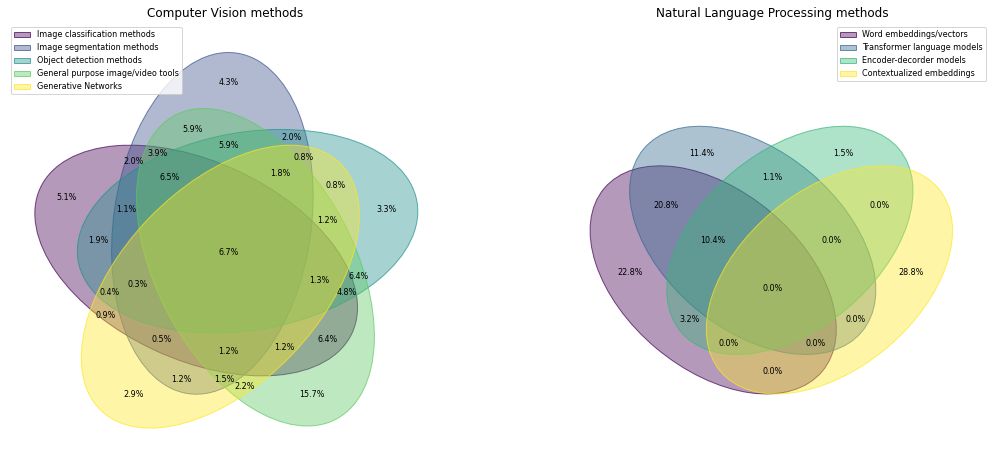

In [21]:
Q18_values = df.loc[:,['Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4',
       'Q18_Part_5', 'Q18_Part_6', 'Q18_OTHER']]

df_q18 = Q18_values.stack().value_counts().rename_axis('Computer Vision methods').reset_index(name='counts')
df_q18['Computer Vision methods'] = np.where((df_q18['Computer Vision methods'] == 'Generative Networks (GAN, VAE, etc)'),'Generative Networks',df_q18['Computer Vision methods'])
df_q18['Computer Vision methods'] = np.where((df_q18['Computer Vision methods'] == 'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)'),
                                             'Image classification methods',df_q18['Computer Vision methods'])
df_q18['Computer Vision methods'] = np.where((df_q18['Computer Vision methods'] == 'Image segmentation methods (U-Net, Mask R-CNN, etc)'),
                                             'Image segmentation methods',df_q18['Computer Vision methods'])
df_q18['Computer Vision methods'] = np.where((df_q18['Computer Vision methods'] == 'Object detection methods (YOLOv3, RetinaNet, etc)'),
                                             'Object detection methods',df_q18['Computer Vision methods'])
df_q18['Computer Vision methods'] = np.where((df_q18['Computer Vision methods'] == 'General purpose image/video tools (PIL, cv2, skimage, etc)'),
                                             'General purpose image/video tools',df_q18['Computer Vision methods'])

Q19_values = df.loc[:,['Q19_Part_1', 'Q19_Part_2', 'Q19_Part_3', 'Q19_Part_4',
       'Q19_Part_5',  'Q19_OTHER']]

df_q19 = Q19_values.stack().value_counts().rename_axis('NLP methods').reset_index(name='counts')

df_q19['NLP methods'] = np.where((df_q19['NLP methods'] == 'Word embeddings/vectors (GLoVe, fastText, word2vec)'),
                                             'Word embeddings/vectors',df_q19['NLP methods'])
df_q19['NLP methods'] = np.where((df_q19['NLP methods'] == 'Transformer language models (GPT-3, BERT, XLnet, etc)'),
                                             'Transformer language models',df_q19['NLP methods'])
df_q19['NLP methods'] = np.where((df_q19['NLP methods'] == 'Encoder-decorder models (seq2seq, vanilla transformers)'),
                                             'Encoder-decorder models',df_q19['NLP methods'])
df_q19['NLP methods'] = np.where((df_q19['NLP methods'] == 'Contextualized embeddings (ELMo, CoVe)'),
                                             'Contextualized embeddings',df_q19['NLP methods'])

df_q18_q19 = pd.concat([df_q18, df_q19], axis=1)
column_names =['CV methods', 'CV counts', 'NLP methods', 'NLP counts']
df_q18_q19.columns = column_names

blue_colors = ['#045669', '#1b7a8f', '#429eb3', '#69bed1', '#91d4e3', '#caf1fa']
orange_colors = ['#ad7309','#c28d2d','#d4ac63','#e6cc9c','#FFA500']

fig = go.Figure()
fig.add_trace(go.Bar(x=df_q18_q19['CV methods'], y=df_q18_q19['CV counts'], name = "CV methods",
                 marker_color = blue_colors, text = df_q18_q19['CV counts'], textposition = "outside",
))
fig.add_trace(go.Bar(x=df_q18_q19['NLP methods'], y=-df_q18_q19['NLP counts'], name = "NLP methods",
            marker_color = orange_colors, text = df_q18_q19['NLP counts'], textposition = "outside"))


fig.update_layout(barmode='relative',                  
    title_text='Participants using the two of the major areas of deep learning',
    height=500, title_x = 0.5, yaxis_title=" ", xaxis_title="Methods",
    legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5)
)

fig.update_xaxes(visible=True, categoryorder='total descending')
fig.update_yaxes(visible=False, range=[-3500,5000])
fig.show()


d1 = df[~df['Q19_Part_1'].isnull()].index.tolist() 
d2 = df[~df['Q19_Part_2'].isnull()].index.tolist() 
d3 = df[~df['Q19_Part_3'].isnull()].index.tolist() 
d4 = df[~df['Q19_Part_5'].isnull()].index.tolist()
d5 = df[~df['Q18_Part_1'].isnull()].index.tolist() 
d6 = df[~df['Q18_Part_2'].isnull()].index.tolist() 
d7 = df[~df['Q18_Part_3'].isnull()].index.tolist() 
d8 = df[~df['Q18_Part_4'].isnull()].index.tolist()
d9 = df[~df['Q18_Part_5'].isnull()].index.tolist() 

_, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(18, 8))
labels = ['Word embeddings/vectors',
 'Transformer language models',
 'Encoder-decorder models',
 'Contextualized embeddings',
 'Image classification methods',
 'Image segmentation methods',
 'Object detection methods',
 'General purpose image/video tools',
 'Generative Networks']
letters = iter(labels)

for n_sets, ax in zip(range(1,2), (ax1, ax2)):
    dataset_dict1 = {
        labels[4]: set(d5),
    labels[5]: set(d6),
    labels[6]: set(d7),
    labels[7]: set(d8),
    labels[8]: set(d9)
    }
    venn(dataset_dict1, fmt="{percentage:.1f}%", fontsize=8, legend_loc="upper left", ax=ax1)
    ax1.title.set_text('Computer Vision methods')
    dataset_dict2 = {
        labels[0]: set(d1),
    labels[1]: set(d2),
    labels[2]: set(d3),
    labels[3]: set(d4),
    }
    venn(dataset_dict2, fmt="{percentage:.1f}%", fontsize=8, legend_loc="upper right", ax=ax2)
    ax2.title.set_text('Natural Language Processing methods')

Computer Vision (CV) and Natural Language Processing (NLP), both are one of the most actively developing machine learning research areas. Data Science really can be termed as a blanket term for several disciplines, but the benefit of specializing in NLP or Computer Vision is that one will know what you are getting into, and can focus on learning and improving on those specific skills required by each, respective position. Both are good at tackling certain circumscribed tasks. But still, it can be seen that the number of participations in both is not similar. While some may prefer either or both, a general observation shows that NLP seems to be the less popular of the two. Why? It could be because of the following reasons:

- High accuracy in problem-solving. Many of the basic computer vision issues, like Object Detection and Face Recognition, have been solved with solid accuracy.
- Ubiquitous product coverage. Such big names like Facebook working in Facial Recognition and Google Goggles working in Object Detection have helped the computer vision technology become more mature.
- Great interest in image technologies. Many tech companies have been concentrating more on images than text. _This could be one of the major reasons why participants prefer Computer Vision over NLP, because of its massive interest and support from Huge Tech Companies_
- Advances in hardware. 

Now let us understand more about each of them, and reach some conclusions for usage of the given methods in their respective areas:
- **Computer Vision** 
   - The participants working on Computer Vision is seen to share working in different CV methods like  General purpose image/video tools (PIL, cv2, skimage, etc); Image segmentation methods (U-Net, Mask R-CNN, etc); Object detection methods (YOLOv3, RetinaNet, etc); Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc); and, Generative Networks (GAN, VAE, etc); among other less popular ones. About 6.7% of them work with ALL of these methods, but the most popular one among them is the image classification method with a whopping majority over the next popular one. 
   - Image clarification comprises of a variety of challenges, including viewpoint variation, scale variation, intra-class variation, image deformation, image occlusion, illumination conditions, and background clutter. CV researchers have come up with a data-driven approach to classify images into distinct categories. They provide the computer with a few examples of each image class and expand learning algorithms. Convolutional Neural Networks (CNNs) is the most famous architecture used for image classification. An average use case for CNNs is where one feeds the network images, and the network categorises the data. CNNs tend to start with an input “scanner” that isn’t intended to parse all the training data at once. For instance, to input an image of 100×100 pixels, one wouldn’t want a layer with 10,000 nodes.
   - While image classification was already known to be the most popular one among the other methods generally, it was similarly refelected in the above graph. But the participants here are mostly seen to work only with image classification, and not a lot of them work with other methods. It could be because most of the beginners start with image classification, since most of the courses begin with an introduction to building classification models, before introducing to other methods.
   - Apart from that, 4 other methods find a place in the top 5 list, which includes Object Detection, Object Tracking, Semantic Segmentation, and Instance Segmentation. The 4th and the 5th collectively form the image segmentation (_Two major types of Image Segmentation: Semantic Segmentation: Objects classified with the same pixel values are segmented with the same colormaps. Instance Segmentation: It differs from semantic segmentation because different instances of the same object are segmented with different color maps._) From the above graph it is similarly reflected here since it occupies the 2nd position in the list, and it seems like the many of the participants here otherwise also indulge in working with Object detection and general purpose image/video tools.   
   - Image segmentation is the process of dividing an image into multiple segments. In this process, every pixel in the image is associated with an object type. Before detecting the objects and even before classifying the image, we need to understand what the image consists of, and this is where image segmentation helps. By applying Object Detection models, one can only be able to build a bounding box corresponding to each class in the image, not telling anything about the shape of the object as the bounding boxes are either rectangular or square in shape. Image Segmentation models on the other hand will create a pixel-wise mask for each object in the image. This technique gives a far more granular understanding of the object(s) in the image. Which explains why it has more popularity than object detection.
   - Object detection is the task to identify objects within images usually involving outputting bounding boxes and labels for individual items. It differs from the classification task by using classification and localization to many objects instead of a single dominant object. There are only two classes of object classification. One is object bounding boxes, and other is non-object bounding boxes. For instance, in vehicle detection, one has to identify all vehicles, including two-wheelers and four-wheelers, in a given image with their bounding boxes. In short, it presents many sizable challenges beyond what is required for image classification, particularly because of these five challenges: dual priorities, speed, multiple scales, limited data, and class imbalance. Because of all these reasons and the fact that it needs to be conducted in a controlled environment, it seems to be much less popular than image classification, but almost at par with image segmentation. 
   - While we see much less participants working solely on object detection (being a challenging field), many of the participants also work on image segmentation and general purpose image/video tools. If we look at it from another angle, it might be suffice to say that object detection is popular to many people, but most of them seem to be pursuing it alongside other approaches. Could be because of the challenges it entails, and the lack of solutions to these problems. If more progress is made in this field, maybe it could gain even greater popularity in the future.
   - Among all of the CV methods, general purpose image/video tools seem to be the most sought after for sole experiementation with image/video processing (more than 15%). Now this could be because of various reasons. The most obvious one could be that since image processing is a method to perform some operations on an image, to get an enhanced image or to extract some useful information from it, it can be used **without** the use of the other CV methods. An analysis could be very useful for understanding the image data and performing other functions like image enhancement, restoration, encoding, and compression. **Other than that,an interesting point should be noted. Most of these processing tools either support Python along with some other langauges, or just Python. This further explains how the enhancement in various tools in Python has helped in the popularity and use of that language.**
   - Generative Networks do not seem as popular as all the other CV methods, even though popular generative networks like GANs remain as the most versatile neural network architectures in use today. It could be because of the problems: non-convergence (the model parameters oscillate, destabilize and never converge); mode collapse (the generator collapses which produces limited varieties of samples), and diminished gradient (the discriminator gets too successful that the generator gradient vanishes and learns nothing, but this could be improved by modification of the loss function in order to remove the vanishing gradient challenge). But maybe because overall generative networks are hard to train, they are not much popular among the participants.
   
   


- **Natural Language Processing**
    - The participants working on Computer Vision is seen to share working in different NLP methods like: word embeddings/vectors (GLoVe, fastText, word2vec); encoder-decoder models (seq2seq, vanilla transformers); contextualized embeddings (ELMo, CoVe), transformer language models (GPT-3, BERT, XLnet, etc); among other less popular ones. Unfortunately from the graph, it seems that not any participant work with all of the listed methods. In fact, very little correlation is seen between all of them. 
    - In NLP, word embedding is a term used for the representation of words for text analysis, typically capturing the semantic, syntactic context or a word/term that help understand how similar/dissimilar it is to other terms in an article, blog, etc. And it is known to be the most popular method among all, and it seems to show the same in the graph (over 40%). And the participants using word embeddings/vectors seem to use 2 of the other top methods listed here. The reason might be:
       - It can be learnt standalone, where a model is trained to learn the embedding, which is saved and used as a part of another model for your task later. This is a good approach if one would like to use the same embedding in multiple models. 
       - Or, can be learnt Jointly, where the embedding is learned as part of a large task-specific model. This is a good approach if one only intend to use the embedding on one task.
       Because of its diverse nature, most of the NLP projects use pretrained word-embedding before using the other NLP models. Which is why we see many unions between word embeddings and other methods. Like image, it is always important to analyze text as well before working with it, and using word embeddings/vectors help us do that. But of course one only uses a new embedding (both static and updated types) if it results in better performance on your problem. Hence, it is popular, but not always required before approaching the other methods. 
    - Transformers form the 2nd most popular of the list, but amazingly falls quite behind word embeddings, given that it is often termed as the _"coolest new NLP model"_. The idea behind Transformer is to handle the dependencies between input and output with attention and recurrence completely. BERT, one of the most used model, uses the transformer architecture in addition to a number of different techniques to train the model, resulting in a model that performs at a SOTA level on a wide range of different tasks.While XLNet (arguably considered better than BERT), uses a different approach than BERT to achieve bidirectional dependencies (i.e. being able to learn context by not just processing input sequentially). It also uses an extension of the transformer architecture known as Transformer XL, which enables longer-term dependencies than the original transformer architecture. These models gained popularity because of being able to handle the dependencies between input and output with attention and recurrence completely. Additionally, it allows for significantly more parallelization and can reach a new state of the art in translation quality. All these perks might be the reason why it is so popular among the participants. And people working with transformers otherwise seem to work together with word embeddings than with other models. Or maybe the participants working with it are also well versed with the other models of NLP.    
    - The 3rd one, encoder decoder models (in some cases known as Sequence to Sequence (Seq2Seq) model) can be used for image captioning, semantic analysis and translation. Being a key model for understanding the advances in NLP (forms the seed for attention models and transformers), it can be used for many interesting works applications such as video captioning or question and answer. But all the information needs to be summarized in one dimensional vector, for long input sequences that can be extremely difficult to achieve. And also because of its limitations as an end-to-end approach, it can not be used for diverse applications. And like it was predicted, many of the participants who work with encoder decoder models, also work with transformers and word embeddings.    
    - Contextualized embeddings seem to be the least popular of all the methods and also used solely by the participants who work on it (may be for specialization purposes), because none of the participants who work on other method is seen to be working on this. One of the most used contextualized embedding, ELMO is embeddings from language models, hence a deep contextualized word representation (CoVe uses a supervised task like machine translation while ELMo uses an unsupervised task like language modelling). It is a breakout version of word token vectors or contextual word vectors and it learns word token vectors using long contexts, not context windows. It learns a deep bi-NLM and uses all its layers in prediction. (t uses Recurrent Neural Networks (RNNs) in the form of Long Short Term Memory (LSTM) architecture to generate contextualized word embeddings. ELMo, unlike BERT, is **not** built on the transformer architecture. However, it struggles with context-dependency on larger sentences because of that. It uses LSTMs to process sequential text. ELMo is like a bridge between the previous approaches such as GLoVe and Word2Vec and the transformer approaches such as BERT. But it is better to train the language model in the corpus that is related to the task that one is working on, and also use several techniques to improve the Language Model by including CNN character features or more deeper models as long as one gets a hidden representation to the words. This is where the other models come to play.
.
    


# 16. Industry Sectors

From different studies, it is seen that the fields of finance, professional services, and information technology employ the most data scientists. 

The **finance industry**, which includes banks, investment firms, insurance firms, and the real estate sector, uses data science to calculate risk, detect fraud, and predict market activity. In this context, data science is used to protect an organization’s bottom line. Financial institutions from big banks to insurance providers use data to prevent losses by flagging unprofitable customers, bad deals, and security breaches or scams. Data science is also used to automate trading and assess risks tied to major transactions.

The **academic services** industry uses data science to improve the accuracy and efficiency of processes, and open the way for disruptive data-driven solutions. Aligned with these advancements, growing interest from professionals in academic disciplines outside of computer science, regarding what are the Data Science tools and techniques need to know to prepare for the future, and what are the relevant applications in their area of specialisation. Data scientists collaborate closely with researchers/academia to interpret findings and create actionable insights that will facilitate growth. 

The **technology industry**, which encompasses any number of app and digital platform makers and service providers, uses data as its primary driver of product development. Machine learning lies at the heart of nearly every social media product, and key tech industry players are constantly adapting algorithms and AI to improve user experience and, in turn, collect more consumer data. 

Let's check if our data reflects the same as the general studies, and if the top most fields here are indeed popular as it said.

In [22]:
df_q2_q20 = df.copy()
df_q2_q20['Q2'] = np.where(((df_q2_q20['Q2'] != 'Man') & (df_q2_q20['Q2'] != 'Woman')),'Other/Undisclosed genders',df_q2_q20['Q2'])
df_q2_q20 = pd.crosstab(df_q2_q20['Q20'], df_q2_q20['Q2']).reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=df_q2_q20['Q20'], y=df_q2_q20['Man'], name = "Man",
                 marker_color = 'teal', text = df_q2_q20['Man'], textposition = "outside",
))
fig.add_trace(go.Bar(x=df_q2_q20['Q20'], y=-df_q2_q20['Woman'], name = "Woman",
            marker_color = 'orange', text = df_q2_q20['Woman'], textposition = "outside"))
fig.add_trace(go.Bar(x=df_q2_q20['Q20'], y=-df_q2_q20['Other/Undisclosed genders'], name = "Other/Undisclosed genders",
            marker_color = 'lightblue', text = df_q2_q20['Other/Undisclosed genders'], textposition = "outside"))

fig.update_layout(
    shapes=[
        dict(type="rect", xref="x", yref="y",
            x0=-0.5, y0=-1200, x1=2.5, y1=3800, line_width=3),
    ])

fig.add_annotation(
        x=2.5,
        y=2600,
        xref="x",
        yref="y",
        text="These top three industries cover more than 50% of the participants. <br> Consequently,these sectors seem to use data science more in their fields.",
        showarrow=True,
        font=dict(
            family="Muli, sans-serif",
            size=11,
            color="#222A2A"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=120,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ffffff",
        opacity=0.8
        )


fig.update_layout(barmode='relative',                  
    title_text='Gender Ratio based on their current industry',
    height=500, title_x = 0.45, yaxis_title=" ", xaxis_title="Industries",
    legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=70,
                        ),
                  
)

fig.update_xaxes(visible=True, categoryorder='total descending')
fig.update_yaxes(visible=False, range=[-1500,4000])
fig.show()


Looking at the above graph, it can be verified that those study results are true since these 3 sectors seem to dominate a lot over the other industrial sectors. While the reading is differentiated based on gender to see if any of the sectors show a different hiring trend than the other, it is clear that irrespective of the genders, most of them show a similar trend in hiring. But the proportion of the genders again is an issue here. 

While the academics and technology see to employ a much higher number of other genders (not male) as compared to the others, especially in academia, the other industries however seem to show even lesser proportion. The financial sector seems to be lagging behind in terms of participation/hiring of other genders. A report on Wall Street Financial Firms had shown that it the most important reason it was dominated by men is because **the largest gap in pay between women and men is in the financial services sector.** 

Hence, it is of great need that the participation of other genders are equally promoted in all the sectors to support a fair and just environment where everyone can progress based on their hard work, **not** on their gender.

Let us now check the relation between the job roles and the industry sectors.

### Occupation vs Industry sector


In [23]:
df_q5_q20 = df[['Q5', 'Q20']]
names = ['Job role', 'Industry']
df_q5_q20.columns = names

df_q5_q20 = df_q5_q20[(df_q5_q20['Job role'] != "Student") & (df_q5_q20['Job role'] != "Currently not employed")] # Since they cannot be working in any industry right now
fig = px.box(df_q5_q20, x="Job role", y="Industry", notched=True,)
fig.update_layout(title_text ="Occupation vs Industry Sector", title_x = 0.5, title_y = 0.93)
fig.update_xaxes( categoryorder='total ascending')
 
fig.show()

Studying the plot above, it can be seen that most of the occupations in data science are spread around a few selected industry sectors. In fact, it further demonstrate what we had seen in the previous plot, that is, the two major sectors- computers/technology and academics/education take up for most of the participants, in quite a few job roles (with technology showing the bulk number). Also, since this data can be termed as a sample collection, including the notches give us an useful insight about our data. Notches are used to show the most likely values expected for the median when the data represents a sample. When a comparison is made between groups, you can tell if the difference between medians are statistically significant based on if their ranges overlap. If any of the notch areas overlap, then it is said that the medians are statistically different; if they do not have overlap, then we can have good confidence that the true medians differ. But many of them seem to have the overlap around the region near 'other' industry sector. Otherwise for the other values, the medians do show that they are statistically different, hence indicating unique distributions which have skews and outliers.

Let us now see if the participants in their respective industry sectors get compensated as per their experience in using machine learning methods.

### Industry vs Compensations according to ML experiences

But before we take a look at the code, it should be noted that the income ranges have been further divided into four major groups (lower income, lower-middle income, upper-middle income, and upper income) for this plot study. They are:
   - Lower income bracket: '0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999','4,000-4,999', '5,000-7,499', '7,500-9,999'   
   - Lower middle income bracket: '10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999'                          
   - Upper middle income bracket: '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-124,999', '125,000-149,999'    
   - Upper income bracket: '150,000-199,999','200,000-249,999', '250,000-299,999', '300,000-499,999', '500,000-999,999', '>1,000,000'                                                                      

_Disclaimer: Please note that it is taken into account that the range of income limits might vary depending on countries, companies and for various other reasons. But for this study, it is assumed that a standard income bracket is maintained by the companies of all the participants, irrespective of their countries. **All income bracket ranges are in US dollars($).**_

In [24]:
df_q15_q20_q25 = df[['Q20', 'Q25', 'Q15']].dropna() 

df_q15_q20_q25 ['Q15'] = df_q15_q20_q25['Q15'].replace(dict.fromkeys(['I do not use machine learning methods', 'Under 1 year', '1-2 years'],'Beginner'))
df_q15_q20_q25 ['Q15'] = df_q15_q20_q25['Q15'].replace(dict.fromkeys(['2-3 years', '3-4 years', '4-5 years'],'Intermediate'))
df_q15_q20_q25 ['Q15'] = df_q15_q20_q25['Q15'].replace(dict.fromkeys(['5-10 years', '10-20 years', '20 or more years'],'Advanced'))

df_q15_q20_q25 ['Q25'] = df_q15_q20_q25['Q25'].replace(dict.fromkeys([ '$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999',
                                                                       '4,000-4,999', '5,000-7,499', '7,500-9,999'],'Lower-income bracket'))
df_q15_q20_q25 ['Q25'] = df_q15_q20_q25['Q25'].replace(dict.fromkeys([ '10,000-14,999', '15,000-19,999', 
                                                                      '20,000-24,999', '25,000-29,999', '30,000-39,999',
                                                                       '40,000-49,999'],'Lower-middle-income bracket'))
df_q15_q20_q25 ['Q25'] = df_q15_q20_q25['Q25'].replace(dict.fromkeys([ '50,000-59,999', '60,000-69,999', '70,000-79,999',
                                                                      '80,000-89,999', '90,000-99,999', '100,000-124,999',
                                                                       '125,000-149,999'],'Upper-middle income bracket'))
df_q15_q20_q25 ['Q25'] = df_q15_q20_q25['Q25'].replace(dict.fromkeys(['150,000-199,999','200,000-249,999',
                                                                       '250,000-299,999', '300,000-499,999',
                                                                       '$500,000-999,999', '>$1,000,000'],'Upper-income bracket'))



df_q15_q20_q25 = round(pd.crosstab(df_q15_q20_q25['Q25'], [df_q15_q20_q25['Q20'],df_q15_q20_q25['Q15']], normalize='index'), 2).T.reset_index()

df_q15_q20_q25_beginner = df_q15_q20_q25[df_q15_q20_q25['Q15']=='Beginner']
df_q15_q20_q25_intermediate = df_q15_q20_q25[df_q15_q20_q25['Q15']=='Intermediate']
df_q15_q20_q25_expert = df_q15_q20_q25[df_q15_q20_q25['Q15']=='Advanced']


fig = make_subplots(rows=1, cols=4, shared_yaxes=True, horizontal_spacing=0, vertical_spacing=0)      

fig.add_trace(go.Bar(y=df_q15_q20_q25_beginner['Q20'], x=df_q15_q20_q25_beginner['Lower-income bracket'], marker_color='teal', name='Beginner-level experience',
                     showlegend=False, orientation='h', opacity=0.8,),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q15_q20_q25_intermediate['Q20'], x=df_q15_q20_q25_intermediate['Lower-income bracket'], marker_color='orange', name='Intermediate-level experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q15_q20_q25_expert['Q20'], x=df_q15_q20_q25_expert['Lower-income bracket'], marker_color='rgb(102, 102, 102)', name='Expert-level experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=1)

fig.add_trace(go.Bar(y=df_q15_q20_q25_beginner['Q20'], x=df_q15_q20_q25_beginner['Lower-middle-income bracket'], marker_color='teal', name='Beginner-level experience',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q15_q20_q25_intermediate['Q20'], x=df_q15_q20_q25_intermediate['Lower-middle-income bracket'], marker_color='orange', name='Intermediate-level experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q15_q20_q25_expert['Q20'], x=df_q15_q20_q25_expert['Lower-middle-income bracket'], marker_color='rgb(102, 102, 102)', name='Expert-level experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=2)

fig.add_trace(go.Bar(y=df_q15_q20_q25_beginner['Q20'], x=df_q15_q20_q25_beginner['Upper-middle income bracket'], marker_color='teal', name='Beginner-level experience',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=3)
fig.add_trace(go.Bar(y=df_q15_q20_q25_intermediate['Q20'], x=df_q15_q20_q25_intermediate['Upper-middle income bracket'], marker_color='orange', name='Intermediate-level experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=3)
fig.add_trace(go.Bar(y=df_q15_q20_q25_expert['Q20'], x=df_q15_q20_q25_expert['Upper-middle income bracket'], marker_color='rgb(102, 102, 102)', name='Expert-level experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=3)

fig.add_trace(go.Bar(y=df_q15_q20_q25_beginner['Q20'], x=df_q15_q20_q25_beginner['Upper-income bracket'], marker_color='teal', name='Beginner-level experience',
                    orientation='h', opacity=0.8),
                     row=1, col=4)
fig.add_trace(go.Bar(y=df_q15_q20_q25_intermediate['Q20'], x=df_q15_q20_q25_intermediate['Upper-income bracket'], marker_color='orange', name='Intermediate-level experience',
                     orientation='h', opacity=0.8),
                     row=1, col=4)
fig.add_trace(go.Bar(y=df_q15_q20_q25_expert['Q20'], x=df_q15_q20_q25_expert['Upper-income bracket'], marker_color='rgb(102, 102, 102)', name='Expert-level experience',
                     orientation='h', opacity=0.8),
                     row=1, col=4)

fig.update_layout(height=550, 
                  title_text="Yearly compensation of participants based on the industrial sector <br> they work in and their experience in using ML methods", title_x =0.5, title_y = 0.96,
                  template="plotly_white", barmode='stack',
                  autosize=True,
                 # margin=dict(t=80, b=50, l=70, r=40),
                 plot_bgcolor='white', paper_bgcolor='white', 
                title_font=dict(size=21, color='#222A2A', family="Muli, sans-serif"),
                         font=dict(color='#222A2A'),
                         legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=80,
                        ),
                 )

fig['layout']['xaxis'].update(title_text='Lower-income bracket', title_font=dict(size=12))
fig['layout']['xaxis2'].update(title_text='Lower-middle income bracket', title_font=dict(size=12))
fig['layout']['xaxis3'].update(title_text='Upper-middle income bracket', title_font=dict(size=12))
fig['layout']['xaxis4'].update(title_text='Upper-income bracket', title_font=dict(size=12))

fig.update_xaxes(zeroline=False,showticklabels=False, ticks="")
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))

fig.show()

If we go by the graph above, it is evident that participants with lesser experience form the majority of the lower to lower-middle income groups, while the ones with most experiences are in the upper-income bracket. This is expected because it gives a general perception how experience in ML is valued in (possibly senior) positions for services in data science field. Interestingly enough, it is also seen that there are a good amount of beginners as well who fall into the upper-income bracket. Could it be that they have already mastered working on data science in the short span and hence secured good positions? Or maybe their job is based on some other field (which offers high compensation), but they themselves are budding data science practitioners, or maybe looking to switch their jobs. A general trend observed, is the same as whar was seen before, that the top 3 most popular industries offer more opportunities to all levels of ML coders than the others. Some outliers do lie in the lower-income bracket where people with expert-level coding experience are still present. What reason could that be? Here, it is worthwhile if we go back to the disclaimer as stated at the beginning, where we do not consider the income rates of different countries and companies, which possibly could be a reason with this unusual behavior. And this might be true for the lower and middle income groups as well. As expected, the lower income (and lower-middle) group has mostly the beginners, and as we go up the curve, more industries seem to provide more compensations to people with more experience. Some even compensating their workers accordingly, hence showing only beginners for the lower income and lower-middle income groups, and salary hike for those with more experience(like hospitality/sports/entertainment and military/security/defence). A general observation could be that for all of the industries stated here, the industries offer lesser positions, but more compensations to people with more experience (i.e., the senior positions). Yet there are a few sectors which are yet to implement data science in their work properly and hence offer less compensations (even less positions maybe) for their workload, like in Shipping/Transportation and Non-profit/Service. 


# 17. Company sizes vs data science workloads

In [25]:
df_q21_q22 = pd.crosstab(df['Q21'], df['Q22']).reset_index()
df_q21_q22 = df_q21_q22.loc(axis=0)[0,4,3,2,1].reset_index(drop=True)

fig = go.Figure()

fig = go.Figure(data=[
    go.Bar(x=df_q21_q22["Q21"], y=df_q21_q22['0'], marker_color = '#065769', name='People responsible: 0',textposition = 'outside', text = df_q21_q22['0']),
    go.Bar(x=df_q21_q22["Q21"], y=df_q21_q22['1-2'], marker_color = '#15778c', name='People responsible: 1-2',textposition = 'outside', text = df_q21_q22['1-2']),
    go.Bar(x=df_q21_q22["Q21"], y=df_q21_q22['3-4'], marker_color = '#2d9cb5', name='People responsible: 3-4',textposition = 'outside', text = df_q21_q22['3-4']),
    go.Bar(x=df_q21_q22["Q21"], y=df_q21_q22['5-9'], marker_color = '#41b7d1', name='People responsible: 5-9', textposition = 'outside',text = df_q21_q22['5-9']),
    go.Bar(x=df_q21_q22["Q21"], y=df_q21_q22['10-14'], marker_color = '#55cbe6', name='People responsible: 10-14', textposition = 'outside',text = df_q21_q22['10-14']),
    go.Bar(x=df_q21_q22["Q21"], y=df_q21_q22['15-19'], marker_color = '#6ddaf2', name='People responsible: 15-19',textposition = 'outside', text = df_q21_q22['15-19']),
    go.Bar(x=df_q21_q22["Q21"], y=df_q21_q22['20+'], marker_color = '#92e9fc', name='People responsible: 20+',textposition = 'outside', text = df_q21_q22['20+']),
    go.Line(x=df_q21_q22["Q21"], y=df_q21_q22['0'], marker_color = '#065769', showlegend=False),
    go.Line(x=df_q21_q22["Q21"], y=df_q21_q22['1-2'], marker_color = '#15778c', showlegend=False),
    go.Line(x=df_q21_q22["Q21"], y=df_q21_q22['3-4'], marker_color = '#2d9cb5', showlegend=False),
    go.Line(x=df_q21_q22["Q21"], y=df_q21_q22['5-9'], marker_color = '#41b7d1', showlegend=False),
    go.Line(x=df_q21_q22["Q21"], y=df_q21_q22['10-14'], marker_color = '#55cbe6', showlegend=False),
    go.Line(x=df_q21_q22["Q21"], y=df_q21_q22['15-19'], marker_color = '#6ddaf2', showlegend=False),
    go.Line(x=df_q21_q22["Q21"], y=df_q21_q22['20+'], marker_color = '#92e9fc', showlegend=False)
])



fig.add_annotation(
        x=2.0,
        y=1800,
        xref="x",
        yref="y",
        text="Following the lines within this circle, normally each line should decrease as we move up <br> to companies with more employess. But even after steady decline, <br> some companies still seem to have very less people in <br> data science team as per their company size.",
        showarrow=False,
        font=dict(
            family="Muli, sans-serif",
            size=11,
            color="#222A2A"
            ),
        align="center",
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ffffff",
        opacity=0.8
        )



fig.update_layout(
    shapes=[
        dict(type="circle", xref="x", yref="y",
            x0=0.2, y0=300, x1=0.7, y1=1400, line_width=3, line=dict(color='red')),
        dict(type="circle", xref="x", yref="y",
            x0=3.8, y0=150, x1=4.1, y1=500, line_width=3, line=dict(color='red')),
    ])


fig.update_layout(                
    title_text='Company size and number of individuals there who are responsible for data science workloads',
    height=500, title_x = 0.5, yaxis_title=" ", xaxis_title="Companies", title_y = 0.93,
    legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5)
)
fig.update_xaxes(visible=True, matches='x')

fig.show()

Commonly, with increase in the size of companies, they should hire more employees to certain key positions. Data science has recently gained much popularity, thanks to the diversity it possesses and the usefulness it provides. One of the advantages of data science is that organizations can find when and where their products sell best. This can help deliver the right products at the right time—and can help companies develop new products to meet their customers' needs. But it is still seen that many companies keep a fairly low employees in these key positions. The proportion and balance is clearly missing, and it has been reflected similarly in the above graph. Maybe some conclusions can be taken out of it.

While it is impressive to see that many small-sized companies employ a lot of data science workers (having 20+ on the team, for a company sized at less than 50 is impressive), it could be because those companies are more focused on data science (e.g., some firms provide data science consultancy services). And the curve of having more data science members for bigger-sized companies is seen, as expected. But it is still seen that many companies with more employees have a really small data science team. While it may be that most of them appoint external services for their data science works, it is better if they still employ more people to handle the data. 

Let's see if it can be explained in the next section with the purpose of every data science team for the companies.

# 18. Data science team in companies and their purposes

In [26]:
df_q22_q23_q24 = df.copy()

df_q22_q23_q24 = df_q22_q23_q24.groupby(['Q22','Q23'])[["Q24_Part_1", "Q24_Part_2", "Q24_Part_3",
                                 "Q24_Part_4", "Q24_Part_5", "Q24_Part_6",
                                 "Q24_Part_7", "Q24_OTHER",] 
                                 ].count().unstack().fillna(0).reset_index()
df_q22_q23_q24 = df_q22_q23_q24.loc(axis=0)[0,1,5,6,2,3,4].reset_index(drop=True)
#df_q22_q23_q24 = df_q22_q23_q24.sort_values(by='24_counts', ascending = True)
df_q22_q23_q24 = df_q22_q23_q24.T.reset_index()[1:]
column_names = ['Q22', 'Q23', '0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+']
df_q22_q23_q24.columns = column_names

df_q22_q23_q24['Q22'] = df_q22_q23_q24['Q22'].replace({'Q24_Part_1': 'Analyzing and understanding data to influence product/business decisions'})
df_q22_q23_q24['Q22'] = df_q22_q23_q24['Q22'].replace({'Q24_Part_2': 'Building and/or running data infrastructure for storing, analyzing, and operationalizing data'})
df_q22_q23_q24['Q22'] = df_q22_q23_q24['Q22'].replace({'Q24_Part_3': 'Building prototypes to explore applying machine learning to new areas'})
df_q22_q23_q24['Q22'] = df_q22_q23_q24['Q22'].replace({'Q24_Part_4': 'Building and/or running machine learning service that operationally improve product/workflows'})
df_q22_q23_q24['Q22'] = df_q22_q23_q24['Q22'].replace({'Q24_Part_5': 'Experimentation and iteration for improving existing ML models'})
df_q22_q23_q24['Q22'] = df_q22_q23_q24['Q22'].replace({'Q24_Part_6': 'Researching for advancing the state of the art of machine learning'})
df_q22_q23_q24['Q22'] = df_q22_q23_q24['Q22'].replace({'Q24_Part_7': 'None'})
df_q22_q23_q24['Q22'] = df_q22_q23_q24['Q22'].replace({'Q24_OTHER': 'Other'})

df_q22_q23_q24_1_1 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'I do not know'][df_q22_q23_q24.Q22 == 'Analyzing and understanding data to influence product/business decisions'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_1_2 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'I do not know'][df_q22_q23_q24.Q22 == 'Building and/or running data infrastructure for storing, analyzing, and operationalizing data'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_1_3 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'I do not know'][df_q22_q23_q24.Q22 == 'Building prototypes to explore applying machine learning to new areas'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_1_4 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'I do not know'][df_q22_q23_q24.Q22 == 'Building and/or running machine learning service that operationally improve product/workflows'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_1_5 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'I do not know'][df_q22_q23_q24.Q22 == 'Experimentation and iteration for improving existing ML models'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_1_6 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'I do not know'][df_q22_q23_q24.Q22 == 'Researching for advancing the state of the art of machine learning'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_1_7 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'I do not know'][df_q22_q23_q24.Q22 == 'None'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_1_8 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'I do not know'][df_q22_q23_q24.Q22 == 'Other'].drop(['Q22', 'Q23'], axis=1)

df_q22_q23_q24_1 = np.concatenate((df_q22_q23_q24_1_1, df_q22_q23_q24_1_2, df_q22_q23_q24_1_3, df_q22_q23_q24_1_4, df_q22_q23_q24_1_5, df_q22_q23_q24_1_6, df_q22_q23_q24_1_7, df_q22_q23_q24_1_8))

df_q22_q23_q24_2_1 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'No (we do not use ML methods)'][df_q22_q23_q24.Q22 == 'Analyzing and understanding data to influence product/business decisions'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_2_2 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'No (we do not use ML methods)'][df_q22_q23_q24.Q22 == 'Building and/or running data infrastructure for storing, analyzing, and operationalizing data'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_2_3 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'No (we do not use ML methods)'][df_q22_q23_q24.Q22 == 'Building prototypes to explore applying machine learning to new areas'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_2_4 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'No (we do not use ML methods)'][df_q22_q23_q24.Q22 == 'Building and/or running machine learning service that operationally improve product/workflows'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_2_5 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'No (we do not use ML methods)'][df_q22_q23_q24.Q22 == 'Experimentation and iteration for improving existing ML models'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_2_6 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'No (we do not use ML methods)'][df_q22_q23_q24.Q22 == 'Researching for advancing the state of the art of machine learning'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_2_7 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'No (we do not use ML methods)'][df_q22_q23_q24.Q22 == 'None'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_2_8 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'No (we do not use ML methods)'][df_q22_q23_q24.Q22 == 'Other'].drop(['Q22', 'Q23'], axis=1)

df_q22_q23_q24_2 = np.concatenate((df_q22_q23_q24_2_1, df_q22_q23_q24_2_2, df_q22_q23_q24_2_3, df_q22_q23_q24_2_4, df_q22_q23_q24_2_5, df_q22_q23_q24_2_6, df_q22_q23_q24_2_7, df_q22_q23_q24_2_8))

df_q22_q23_q24_3_1 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We are exploring ML methods (and may one day put a model into production)'][df_q22_q23_q24.Q22 == 'Analyzing and understanding data to influence product/business decisions'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_3_2 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We are exploring ML methods (and may one day put a model into production)'][df_q22_q23_q24.Q22 == 'Building and/or running data infrastructure for storing, analyzing, and operationalizing data'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_3_3 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We are exploring ML methods (and may one day put a model into production)'][df_q22_q23_q24.Q22 == 'Building prototypes to explore applying machine learning to new areas'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_3_4 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We are exploring ML methods (and may one day put a model into production)'][df_q22_q23_q24.Q22 == 'Building and/or running machine learning service that operationally improve product/workflows'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_3_5 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We are exploring ML methods (and may one day put a model into production)'][df_q22_q23_q24.Q22 == 'Experimentation and iteration for improving existing ML models'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_3_6 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We are exploring ML methods (and may one day put a model into production)'][df_q22_q23_q24.Q22 == 'Researching for advancing the state of the art of machine learning'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_3_7 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We are exploring ML methods (and may one day put a model into production)'][df_q22_q23_q24.Q22 == 'None'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_3_8 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We are exploring ML methods (and may one day put a model into production)'][df_q22_q23_q24.Q22 == 'Other'].drop(['Q22', 'Q23'], axis=1)

df_q22_q23_q24_3 = np.concatenate((df_q22_q23_q24_3_1, df_q22_q23_q24_3_2, df_q22_q23_q24_3_3, df_q22_q23_q24_3_4, df_q22_q23_q24_3_5, df_q22_q23_q24_3_6, df_q22_q23_q24_3_7, df_q22_q23_q24_3_8))

df_q22_q23_q24_4_1 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We have well established ML methods (i.e., models in production for more than 2 years)'][df_q22_q23_q24.Q22 == 'Analyzing and understanding data to influence product/business decisions'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_4_2 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We have well established ML methods (i.e., models in production for more than 2 years)'][df_q22_q23_q24.Q22 == 'Building and/or running data infrastructure for storing, analyzing, and operationalizing data'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_4_3 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We have well established ML methods (i.e., models in production for more than 2 years)'][df_q22_q23_q24.Q22 == 'Building prototypes to explore applying machine learning to new areas'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_4_4 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We have well established ML methods (i.e., models in production for more than 2 years)'][df_q22_q23_q24.Q22 == 'Building and/or running machine learning service that operationally improve product/workflows'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_4_5 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We have well established ML methods (i.e., models in production for more than 2 years)'][df_q22_q23_q24.Q22 == 'Experimentation and iteration for improving existing ML models'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_4_6 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We have well established ML methods (i.e., models in production for more than 2 years)'][df_q22_q23_q24.Q22 == 'Researching for advancing the state of the art of machine learning'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_4_7 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We have well established ML methods (i.e., models in production for more than 2 years)'][df_q22_q23_q24.Q22 == 'None'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_4_8 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We have well established ML methods (i.e., models in production for more than 2 years)'][df_q22_q23_q24.Q22 == 'Other'].drop(['Q22', 'Q23'], axis=1)

df_q22_q23_q24_4 = np.concatenate((df_q22_q23_q24_4_1, df_q22_q23_q24_4_2, df_q22_q23_q24_4_3, df_q22_q23_q24_4_4, df_q22_q23_q24_4_5, df_q22_q23_q24_4_6, df_q22_q23_q24_4_7, df_q22_q23_q24_4_8))


df_q22_q23_q24_5_1 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We recently started using ML methods (i.e., models in production for less than 2 years)'][df_q22_q23_q24.Q22 == 'Analyzing and understanding data to influence product/business decisions'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_5_2 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We recently started using ML methods (i.e., models in production for less than 2 years)'][df_q22_q23_q24.Q22 == 'Building and/or running data infrastructure for storing, analyzing, and operationalizing data'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_5_3 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We recently started using ML methods (i.e., models in production for less than 2 years)'][df_q22_q23_q24.Q22 == 'Building prototypes to explore applying machine learning to new areas'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_5_4 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We recently started using ML methods (i.e., models in production for less than 2 years)'][df_q22_q23_q24.Q22 == 'Building and/or running machine learning service that operationally improve product/workflows'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_5_5 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We recently started using ML methods (i.e., models in production for less than 2 years)'][df_q22_q23_q24.Q22 == 'Experimentation and iteration for improving existing ML models'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_5_6 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We recently started using ML methods (i.e., models in production for less than 2 years)'][df_q22_q23_q24.Q22 == 'Researching for advancing the state of the art of machine learning'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_5_7 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We recently started using ML methods (i.e., models in production for less than 2 years)'][df_q22_q23_q24.Q22 == 'None'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_5_8 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We recently started using ML methods (i.e., models in production for less than 2 years)'][df_q22_q23_q24.Q22 == 'Other'].drop(['Q22', 'Q23'], axis=1)

df_q22_q23_q24_5 = np.concatenate((df_q22_q23_q24_5_1, df_q22_q23_q24_5_2, df_q22_q23_q24_5_3, df_q22_q23_q24_5_4, df_q22_q23_q24_5_5, df_q22_q23_q24_5_6, df_q22_q23_q24_5_7, df_q22_q23_q24_5_8))


df_q22_q23_q24_6_1 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We use ML methods for generating insights (but do not put working models into production)'][df_q22_q23_q24.Q22 == 'Analyzing and understanding data to influence product/business decisions'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_6_2 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We use ML methods for generating insights (but do not put working models into production)'][df_q22_q23_q24.Q22 == 'Building and/or running data infrastructure for storing, analyzing, and operationalizing data'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_6_3 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We use ML methods for generating insights (but do not put working models into production)'][df_q22_q23_q24.Q22 == 'Building prototypes to explore applying machine learning to new areas'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_6_4 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We use ML methods for generating insights (but do not put working models into production)'][df_q22_q23_q24.Q22 == 'Building and/or running machine learning service that operationally improve product/workflows'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_6_5 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We use ML methods for generating insights (but do not put working models into production)'][df_q22_q23_q24.Q22 == 'Experimentation and iteration for improving existing ML models'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_6_6 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We use ML methods for generating insights (but do not put working models into production)'][df_q22_q23_q24.Q22 == 'Researching for advancing the state of the art of machine learning'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_6_7 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We use ML methods for generating insights (but do not put working models into production)'][df_q22_q23_q24.Q22 == 'None'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_6_8 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We use ML methods for generating insights (but do not put working models into production)'][df_q22_q23_q24.Q22 == 'Other'].drop(['Q22', 'Q23'], axis=1)

df_q22_q23_q24_6 = np.concatenate((df_q22_q23_q24_6_1, df_q22_q23_q24_6_2, df_q22_q23_q24_6_3, df_q22_q23_q24_6_4, df_q22_q23_q24_6_5, df_q22_q23_q24_6_6, df_q22_q23_q24_6_7, df_q22_q23_q24_6_8))


fig = go.Figure(data=[go.Heatmap(
                   z=df_q22_q23_q24_1, zmid = 450, text=df_q22_q23_q24_1,
                   x=['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+'], name='Not sure',
                   y=['Analyzing and understanding data to influence product/business decisions',
                                       'Building and/or running data infrastructure for storing, analyzing, and operationalizing data',
                                       'Building prototypes to explore applying machine learning to new areas',
                                       'Building and/or running machine learning service that operationally improve product/workflows',
                                       'Experimentation and iteration for improving existing ML models',
                                       'Researching for advancing the state of the art of machine learning',
                                       'None', 'Other'], colorscale=px.colors.diverging.BrBG, 
                                       hoverongaps = False),
                      go.Heatmap(
                   z=df_q22_q23_q24_2, zmid = 450,
                   x=['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+'], name='Do not use ML methods',
                   y=['Analyzing and understanding data to influence product/business decisions',
                                       'Building and/or running data infrastructure for storing, analyzing, and operationalizing data',
                                       'Building prototypes to explore applying machine learning to new areas',
                                       'Building and/or running machine learning service that operationally improve product/workflows',
                                       'Experimentation and iteration for improving existing ML models',
                                       'Researching for advancing the state of the art of machine learning',
                                       'None', 'Other'], colorscale=px.colors.diverging.BrBG,
                                       hoverongaps = False),
                      go.Heatmap(
                   z=df_q22_q23_q24_3, zmid = 450,
                   x=['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+'], name='May one day put a model into production',
                   y=['Analyzing and understanding data to influence product/business decisions',
                                       'Building and/or running data infrastructure for storing, analyzing, and operationalizing data',
                                       'Building prototypes to explore applying machine learning to new areas',
                                       'Building and/or running machine learning service that operationally improve product/workflows',
                                       'Experimentation and iteration for improving existing ML models',
                                       'Researching for advancing the state of the art of machine learning',
                                       'None', 'Other'], colorscale=px.colors.diverging.BrBG,
                                       hoverongaps = False),
                      go.Heatmap(
                   z=df_q22_q23_q24_4, zmid = 450,
                   x=['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+'], name='Models in production for more than 2 years',
                   y=['Analyzing and understanding data to influence product/business decisions',
                                       'Building and/or running data infrastructure for storing, analyzing, and operationalizing data',
                                       'Building prototypes to explore applying machine learning to new areas',
                                       'Building and/or running machine learning service that operationally improve product/workflows',
                                       'Experimentation and iteration for improving existing ML models',
                                       'Researching for advancing the state of the art of machine learning',
                                       'None', 'Other'], colorscale=px.colors.diverging.BrBG,
                                       hoverongaps = False),
                      go.Heatmap(
                   z=df_q22_q23_q24_5, zmid = 450,
                   x=['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+'], name='Models in production for less than 2 years',
                   y=['Analyzing and understanding data to influence product/business decisions',
                                       'Building and/or running data infrastructure for storing, analyzing, and operationalizing data',
                                       'Building prototypes to explore applying machine learning to new areas',
                                       'Building and/or running machine learning service that operationally improve product/workflows',
                                       'Experimentation and iteration for improving existing ML models',
                                       'Researching for advancing the state of the art of machine learning',
                                       'None', 'Other'], colorscale=px.colors.diverging.BrBG, #px.colors.sequential.Tealgrn,
                                       hoverongaps = False),
                      go.Heatmap(
                   z=df_q22_q23_q24_6, zmid = 450,
                   x=['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+'], name='Do not put working models into production',
                   y=['Analyzing and understanding data to influence product/business decisions',
                                       'Building and/or running data infrastructure for storing, analyzing, and operationalizing data',
                                       'Building prototypes to explore applying machine learning to new areas',
                                       'Building and/or running machine learning service that operationally improve product/workflows',
                                       'Experimentation and iteration for improving existing ML models',
                                       'Researching for advancing the state of the art of machine learning',
                                       'None', 'Other'], colorscale=px.colors.diverging.BrBG,
                                       hoverongaps = False),
                     ])

    
fig.update_xaxes(side="top", title_text = "Individuals responsible for data science")
fig.update_yaxes(title_text = "Purpose of the respective workers")

fig.update_layout( 
     title_text = 'Companies incorporating Machine Learning and their people to workload ratio',
     title_x = 0.5, title_y = 0.96,
     margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b = 0
                        ),
     updatemenus=[
        dict(
            active=0,
            x=-0.5,
            y=1,
            buttons=list(
                [
                    dict(
                        label="Not sure",
                        method="update",
                        args=[
                            {"visible": [True, False, False, False, False, False]},
                        ],
                    ),
                    dict(
                        label="ML methods not used",
                        method="update",
                        args=[
                            {"visible": [False, True, False, False, False, False]},
                        ],
                    ),
                    dict(
                        label="Exploring ML methods",
                        method="update",
                        args=[
                            {"visible": [False, False, True, False, False, False]},
                        ],
                    ),
                    dict(
                        label="Well established in ML methods",
                        method="update",
                        args=[
                            {"visible": [False, False, False, True, False, False]},
                        ],
                    ),
                    dict(
                        label="Recently started using ML methods",
                        method="update",
                        args=[
                            {"visible": [False, False, False, False, True, False]},
                        ],
                    ),
                    dict(
                        label="Use ML methods for generating insights",
                        method="update",
                        args=[
                            {"visible": [False, False, False, False, False, True]},
                        ],
                    ),
                ]
            ),
        )
    ]
)

fig.show()

Workload to capacity ratio of data science companies (based on incorporation of ML methods) show many interesting facts. For any stage of incorporation of ML methods, it seems like the purpose of ML for analyzing and understanding data which influence product/business decisions is the most sought after. And it is also seen that the more data science team expands, the more people they put people to serve this purpose, as this purpose alone serves to be one of the key reasons for the recent popularity of data science in business. For the compnies who just use ML for generating insights, apart from using ML for analysis and understanding, they also use ML for building prototypes to explore in new areas, and for storing, analyzing and operationalizing data. This maybe because they are just starting out and want to test the boundaries of data science before they fully decide to incorporate it in their company beyond just the purpose of analysis. And it is therefore similarly seen for the companies where they are exploring data science or recently started out on them. A key finding is that the companies who are beginners in using ML methods are more focused in building prototypes and exploring the subject before they fully incorporate it into their company, but the companies which are already well-established in their usage, focuses more on the experimentations on improving ML models as well apart from improving the product/workflow. Especially if the capacity of the data science team is more, that in turn opens up scopes of data exploration beyond the limited usage of data science. Hence the various purpose data science serves can be beneficial for any company if they decide on exploring it more.


# 19. Average hours spent on machine learning and/or cloud computing services at home (or at work)
As a business grows it inevitably faces the choice between investing in on-premises server infrastructure or cloud based infrastructure to manage their IT needs. Especially with the pandemic, companies are spending more on using this services. But often because of their expensive nature, it maybe worth noting if it is indeed as useful as they are thought to be. In which case, maybe a comparitive study of beginner to advance-level ML experts and their spendings on such services with respect to their yearly compensations might give us useful insights.

In [27]:
df_q26_q25_q15 = df.copy()
df_q26_q25_q15_1 = df_q26_q25_q15[(df_q26_q25_q15['Q15'] == 'I do not use machine learning methods') | (df_q26_q25_q15['Q15'] == '1-2 years') | (df_q26_q25_q15['Q15'] == 'Under 1 year')]
df_q26_q25_q15_2 = df_q26_q25_q15[(df_q26_q25_q15['Q15'] == '4-5 years') | (df_q26_q25_q15['Q15'] == '3-4 years') | (df_q26_q25_q15['Q15'] == '2-3 years')]
df_q26_q25_q15_3 = df_q26_q25_q15[(df_q26_q25_q15['Q15'] == '5-10 years') | (df_q26_q25_q15['Q15'] == '10-20 years') | (df_q26_q25_q15['Q15'] == '20 or more years')]


fig = go.Figure()

df_q26_q25_q15_1 = pd.crosstab(df_q26_q25_q15_1['Q25'], df_q26_q25_q15_1['Q26'], rownames=['Q25'], colnames=['Q26'])
df_q26_q25_q15_1 = df_q26_q25_q15_1.reset_index()


fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_1['Q25'],
        y=df_q26_q25_q15_1['$0 ($USD)'], 
        name="0", mode='lines+markers',
        marker_color="#023040",
    ),
)
fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_1['Q25'],
        y=df_q26_q25_q15_1['$1-$99'], 
        name="1-99",mode='lines+markers',
        marker_color="#19647d",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_1['Q25'],
        y=df_q26_q25_q15_1['$10,000-$99,999'], 
        name="10,000-99,999",mode='lines+markers',
        marker_color="#cc9e21",
    ),
)
fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_1['Q25'],
        y=df_q26_q25_q15_1['$100,000 or more ($USD)'], 
        name="100,000+",mode='lines+markers',
        marker_color="#13b7ed",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_1['Q25'],
        y=df_q26_q25_q15_1['$1000-$9,999'], 
        name="1000-9,999",mode='lines+markers',
        marker_color="#943d0a",
    ),
)



df_q26_q25_q15_2 = pd.crosstab(df_q26_q25_q15_2['Q25'], df_q26_q25_q15_2['Q26'], rownames=['Q25'], colnames=['Q26'])
df_q26_q25_q15_2 = df_q26_q25_q15_2.reset_index()

fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_2['Q25'],
        y=df_q26_q25_q15_2['$0 ($USD)'], 
        name="0",mode='lines+markers',
        marker_color="#023040",
    ),
)
fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_2['Q25'],
        y=df_q26_q25_q15_2['$1-$99'], 
        name="1-99",mode='lines+markers',
        marker_color="#19647d",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_2['Q25'],
        y=df_q26_q25_q15_2['$10,000-$99,999'], 
        name="10,000-99,999", mode='lines+markers',
        marker_color="#cc9e21",
    ),
)
fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_2['Q25'],
        y=df_q26_q25_q15_2['$100,000 or more ($USD)'],
        name="100,000+",mode='lines+markers',
        marker_color="#13b7ed",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_2['Q25'],
        y=df_q26_q25_q15_2['$1000-$9,999'], 
        name="1000-9,999",mode='lines+markers',
        marker_color="#943d0a",
    ),
)


df_q26_q25_q15_3 = pd.crosstab(df_q26_q25_q15_3['Q25'], df_q26_q25_q15_3['Q26'], rownames=['Q25'], colnames=['Q26'])
df_q26_q25_q15_3 = df_q26_q25_q15_3.reset_index()

fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_3['Q25'],
        y=df_q26_q25_q15_3['$0 ($USD)'],
        name="0",mode='lines+markers',
        marker_color="#023040",
    ),
)
fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_3['Q25'],
        y=df_q26_q25_q15_3['$1-$99'],
        name="1-99",mode='lines+markers',
        marker_color="#19647d",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_3['Q25'],
        y=df_q26_q25_q15_3['$10,000-$99,999'],
        name="10,000-99,999",mode='lines+markers',
        marker_color="#cc9e21",
    ),
)
fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_3['Q25'],
        y=df_q26_q25_q15_3['$100,000 or more ($USD)'],
        name="100,000+",mode='lines+markers',
        marker_color="#13b7ed",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_3['Q25'],
        y=df_q26_q25_q15_3['$1000-$9,999'],
        name="1000-9,999",mode='lines+markers',
        marker_color="#943d0a",
    ),
)



fig.update_layout(
    template="simple_white", title_text = 'Participants who work on ML methods and their spendings on computing platforms', 
    title_x = 0.5, title_y = 0.95, showlegend= True,
    xaxis=dict(title_text="Current yearly compensation (approximate $USD)"),
    yaxis=dict(title_text="Number of people spending an amount <br> on computing services at home <br>(or at work) in the past 5 years <br> (approximate $USD)"),
    legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
    #legend_title="Money spent",
)

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.65,
            y=0.95,
            showactive=True,
            buttons=list(
                [
                    dict(
                        label="Beginners",
                        method="update",
                        args=[
                            {"visible": [True, True,True,True,True, False,False,False,False,False,False,False,False,False,False]},
                        ],
                    ),
                    dict(
                        label="Intermediates",
                        method="update",
                        args=[
                            {"visible": [False,False,False,False,False, True, True,True,True,True, False,False,False,False,False]},
                        ],
                    ),
                    dict(
                        label="Experts",
                        method="update",
                        args=[
                            {"visible": [False,False,False,False,False,False,False,False,False,False,True, True,True,True,True]},
                        ],
                    ),
                ]
            ),
        )
    ]
)

fig.show()

As expected, some common observations are seen in the above plot. Comparing the annual compensation to the amount spent on ML and(/or)computing services, it is seen to be quite a bit popular among the participants (though the intermediate and experts seen to be using it more, which is expected). Even so, many of the participants are yet to try working with it. It could be because of various reasons. Firstly, a general trend can be seen with the corelation between the compensation and spending on the services, i.e., with more compensation the interest might relate to usage of more such services. While it is not necessarily always seen to be linearly related, but people with more income bracket seem to opt for such services more. For instance, for cloud services, it may also be because of using cloud services offered over a network which allow businesses to access their infrastructure remotely, and that has been especially helpful during the pandemic when most of the work were done remotely. Aside from being highly scalable, flexible and quicker, using virtual services of cloud also offers features like containers and serverless. And the reduction or elimination of the need for infrastructure by allowing for a remote workforce and collaboration, it shiifts the IT's focus to specialization and retraining. Increasing reliability and eliminating redundancies. This could be one of the reasons why companies maybe financing or helping setting up such workplaces at the home of their workers. For many, it could also be because their work is based on the use these services, which explains their spendings on the services. But for the smaller companies with lesser resources, it could also be an hindrance, given the technology vulnerabilities, especially on shared environments, along with insecure interfaces and APIs, among other things. So this is still a developing field, much like the ML. And with the budding interest of people in these areas, more people will grow to like/work with it.



# 20. Compensation and other demographic comparisons between top programming languages

As seen from previous charts, there is a distinct majority of Python over the other languages when it comes to preference. Let us compare the readings of Python with the other two coding languages in top 3 (R and SQL) and see various trends through their demographic plots, including their yearly compensation (i.e., income bracket).

In [28]:
#Python R/SQL demographic plot
df_copy = df.copy()
df_copy = df_copy[['Q1', 'Q2', 'Q4', 'Q5', 'Q6', 'Q25', 'Q8']]
df_copy['Q2'] = np.where(((df_copy['Q2'] != 'Man') & (df_copy['Q2'] != 'Woman')),'Other/Undisclosed',df_copy['Q2'])
df_copy['Q6'] = df_copy['Q6'].replace(dict.fromkeys(['I have never written code', '< 1 years', '1-3 years'],'Beginner'))
df_copy['Q6'] = df_copy['Q6'].replace(dict.fromkeys(['3-5 years', '5-10 years'],'Intermediate'))
df_copy['Q6'] = df_copy['Q6'].replace(dict.fromkeys(['10-20 years', '20+ years'],'Advanced'))
df_copy['Q4'] = np.where((df_copy['Q4'] == 'No formal education past high school'),'High school passout',df_copy['Q4'])
df_copy['Q4'] = np.where((df_copy['Q4'] == 'Some college/university study without earning a bachelor’s degree'),'Higher study w/o bachelor’s',df_copy['Q4'])
df_copy['Q5'] = np.where((df_copy['Q5'] == 'Machine Learning Engineer'),'ML Engineer',df_copy['Q5'])
df_copy['Q5'] = np.where((df_copy['Q5'] == 'Developer Relations/Advocacy'),'Dev Relations/Advocacy',df_copy['Q5'])
df_copy ['Q25'] = df_copy['Q25'].replace(dict.fromkeys([ '$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999',
                                                                       '4,000-4,999', '5,000-7,499', '7,500-9,999'],'Lower-income'))
df_copy ['Q25'] = df_copy['Q25'].replace(dict.fromkeys([ '10,000-14,999', '15,000-19,999', 
                                                                      '20,000-24,999', '25,000-29,999', '30,000-39,999',
                                                                       '40,000-49,999'],'Lower-middle-income'))
df_copy ['Q25'] = df_copy['Q25'].replace(dict.fromkeys([ '50,000-59,999', '60,000-69,999', '70,000-79,999',
                                                                      '80,000-89,999', '90,000-99,999', '100,000-124,999',
                                                                       '125,000-149,999'],'Upper-middle income'))
df_copy ['Q25'] = df_copy['Q25'].replace(dict.fromkeys(['150,000-199,999','200,000-249,999',
                                                                       '250,000-299,999', '300,000-499,999',
                                                                       '$500,000-999,999', '>$1,000,000'],'Upper-income'))



df_py = df_copy.copy()
df_py = df_py[df_py['Q8'] == 'Python']

df_rsql =df_copy.copy()
df_rsql = df_rsql[(df_rsql['Q8'] == 'R') | (df_rsql['Q8'] == 'SQL')]

df_py_age = df_py.groupby(['Q1']).size().reset_index().rename(columns={0:'age count'})
df_py_gen = df_py.groupby(['Q2']).size().reset_index().rename(columns={0:'gen count'})
df_py_edu = df_py.groupby(['Q4']).size().reset_index().rename(columns={0:'edu count'})
df_py_ocp = df_py.groupby(['Q5']).size().reset_index().rename(columns={0:'ocp count'})
df_py_cod = df_py.groupby(['Q6']).size().reset_index().rename(columns={0:'cod count'})
df_py_sal = df_py.groupby(['Q25']).size().reset_index().rename(columns={0:'sal count'})

df_rsql_age = df_rsql.groupby(['Q1']).size().reset_index().rename(columns={0:'age count'})
df_rsql_gen = df_rsql.groupby(['Q2']).size().reset_index().rename(columns={0:'gen count'})
df_rsql_edu = df_rsql.groupby(['Q4']).size().reset_index().rename(columns={0:'edu count'})
df_rsql_ocp = df_rsql.groupby(['Q5']).size().reset_index().rename(columns={0:'ocp count'})
df_rsql_cod = df_rsql.groupby(['Q6']).size().reset_index().rename(columns={0:'cod count'})
df_rsql_sal = df_rsql.groupby(['Q25']).size().reset_index().rename(columns={0:'sal count'})

fig = make_subplots(rows=2, cols=3, horizontal_spacing=0.035, vertical_spacing=0.1)                    
fig.add_trace(go.Bar(x=df_py_age['Q1'], y=df_py_age['age count'], marker_color='teal', name='Python',textposition='outside',
                     text=df_py_age['age count'], opacity=0.8, showlegend=False),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_rsql_age['Q1'], y=df_rsql_age['age count'], marker_color='orange', name='R/SQL',textposition='outside',
                      text=df_rsql_age['age count'], opacity=0.8, showlegend=False),
                     row=1, col=1)

fig.add_trace(go.Bar(x=df_py_gen['Q2'], y=df_py_gen['gen count'], marker_color='teal', name='Python',textposition='outside',
                     text=df_py_gen['gen count'], opacity=0.8, showlegend=False),
                     row=1, col=2)
fig.add_trace(go.Bar(x=df_rsql_gen['Q2'], y=df_rsql_gen['gen count'], marker_color='orange', name='R/SQL',textposition='outside',
                      text=df_rsql_gen['gen count'], opacity=0.8, showlegend=False),
                     row=1, col=2)

fig.add_trace(go.Bar(x=df_py_edu['Q4'], y=df_py_edu['edu count'], marker_color='teal', name='Python',textposition='outside',
                     text=df_py_edu['edu count'], opacity=0.8, showlegend=False),
                     row=2, col=2)
fig.add_trace(go.Bar(x=df_rsql_edu['Q4'], y=df_rsql_edu['edu count'], marker_color='orange', name='R/SQL',textposition='outside',
                      text=df_rsql_edu['edu count'], opacity=0.8, showlegend=False),
                     row=2, col=2)

fig.add_trace(go.Bar(x=df_py_ocp['Q5'], y=df_py_ocp['ocp count'], marker_color='teal', name='Python',textposition='outside',
                     text=df_py_ocp['ocp count'], opacity=0.8, showlegend=False),
                     row=2, col=1)
fig.add_trace(go.Bar(x=df_rsql_ocp['Q5'], y=df_rsql_ocp['ocp count'], marker_color='orange', name='R/SQL',textposition='outside',
                      text=df_rsql_ocp['ocp count'], opacity=0.8, showlegend=False),
                     row=2, col=1)

fig.add_trace(go.Bar(x=df_py_cod['Q6'], y=df_py_cod['cod count'], marker_color='teal', name='Python',textposition='outside',
                     text=df_py_cod['cod count'], opacity=0.8, showlegend=False),
                     row=1, col=3)
fig.add_trace(go.Bar(x=df_rsql_cod['Q6'], y=df_rsql_cod['cod count'], marker_color='orange', name='R/SQL',textposition='outside',
                      text=df_rsql_cod['cod count'], opacity=0.8, showlegend=False),
                     row=1, col=3)

fig.add_trace(go.Bar(x=df_py_sal['Q25'], y=df_py_sal['sal count'], marker_color='teal', name='Python',textposition='outside',
                     text=df_py_sal['sal count'], opacity=0.8),
                     row=2, col=3)
fig.add_trace(go.Bar(x=df_rsql_sal['Q25'], y=df_rsql_sal['sal count'], marker_color='orange', name='R/SQL',textposition='outside',
                      text=df_rsql_sal['sal count'], opacity=0.8),
                     row=2, col=3)

fig['layout']['xaxis5'].update(tickangle=90)
fig['layout']['xaxis6'].update(tickangle=90)
fig.update_layout(yaxis2 = dict(range=[0, 18000]), yaxis3 = dict(range=[0, 12500]),  yaxis6 = dict(range=[0, 6000]))

fig.update_layout(height=750,
                 title_text='Demographic plot of the most popular programming languages', title_x=0.5, 
                 legend=dict(orientation="h", yanchor="bottom", y=1.05, xanchor="center", x=0.5),
                 hoverlabel=dict(font=dict(family='sans-serif', size=14)),
                 
                 annotations = [dict(
                    x=0.93,
                    y=1.06,    
                    xref='paper',
                    yref='paper',
                    text="Coding experience",
                    showarrow = False,
                    font=dict(
                            family="Muli, sans-serif",
                            size=14,
                            color="black"
                            ),
                    bordercolor="white"
                ),
                              dict(
                    x=0.12,
                    y=1.06,    
                    xref='paper',
                    yref='paper',
                    text="Age",
                    showarrow = False,
                    font=dict(
                            family="Muli, sans-serif",
                            size=14,
                            color="black"
                            ),
                    bordercolor="white"
                ),
                 dict(
                    x=0.5,
                    y=1.06,    
                    xref='paper',
                    yref='paper',
                    text="Gender",
                    showarrow = False,
                    font=dict(
                            family="Muli, sans-serif",
                            size=14,
                            color="black"
                            ),
                    bordercolor="white"
                ),
                 dict(
                    x=0.10,
                    y=-0.395,    
                    xref='paper',
                    yref='paper',
                    text="Occupation",
                    showarrow = False,
                    font=dict(
                            family="Muli, sans-serif",
                            size=14,
                            color="black"
                            ),
                    bordercolor="white"
                ),  
                  dict(
                    x=0.5,
                    y=-0.395,    
                    xref='paper',
                    yref='paper',
                    text="Education level",
                    showarrow = False,
                    font=dict(
                            family="Muli, sans-serif",
                            size=14,
                            color="black"
                            ),
                    bordercolor="white"
                ),  
                  dict(
                    x=0.93,
                    y=-0.395,    
                    xref='paper',
                    yref='paper',
                    text="Yearly compensation",
                    showarrow = False,
                    font=dict(
                            family="Muli, sans-serif",
                            size=14,
                            color="black"
                            ),
                    bordercolor="white"
                )
                               ]
                 
                 )

fig.show()

Some useful information we get from the above figures:
- Python is a popular language among both the older and younger participants. The age group of 25-29 seems to be the most active group using R/SQL among all the participants.
- The gap between the usage of Python and R/SQL is more in males, as compared to females (and others/undisclosed).
- Python is a clear favoutite among coders of all experience level, but the beginners seem to prefer to start with Python more. 
- Observations show that occupations which directly link to the data science field seem to have more usage of R/SQL, among all of the occupations. This could be because R is one of the most favoured statistical language used for data analysis after Python, and hence comes second to preference (though the gap is still large). The gap between the usage of these languages is least with the statisticians, which suggests how significantly close both the languages (R and Python) are for cleaning, analyzing, and graphing the data.
- Software Engineers use Python much more than R/SQL users. Interestingly though, DBA/Database Engineers seem to prefer Python over SQL, even though DBAs are deemed to have in-depth SQL knowledge. This could be because SQL functions have fewer applications than Python, and hence Python gradually overtaking SQL for database management.
- Participants with education level Master's and Bachelor's form the majority of the survey, and they both prefer Python a lot more than the other two. Among the different levels of education, it seems that the formerly mentioned participants, along with participants with doctoral degree are the only ones who use R/SQL. The preference could be the because of the other demographic factors as mentioned earlier.
- Given the lower number of participants preferring R/SQL, there seems to be a better opportunity of getting more salary, as many of them fall into the upper-middle and upper income salary bracket. Whereas even though Python users get more salary across all salary ranges, the proportionality of getting a higher salary is lower as compared to the R/SQL users. 

# 21. Cloud Computing platforms used vs preferred 

In [29]:
df_q27a_q28 = df.copy()

df_q27a_q28 = df_q27a_q28.groupby(['Q28'])[["Q27_A_Part_1", "Q27_A_Part_2", "Q27_A_Part_3",
                                 "Q27_A_Part_4", "Q27_A_Part_5", "Q27_A_Part_6",
                                 "Q27_A_Part_7", "Q27_A_Part_8", "Q27_A_Part_9",
                                 "Q27_A_Part_10", "Q27_A_Part_11", "Q27_A_OTHER",] 
                                 ].count().unstack().fillna(0).reset_index(name='counts').sort_values(['counts'], ascending=[False])
df_q27a_q28 = df_q27a_q28.loc[~(df_q27a_q28['counts'] == 0)]

df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_1'),
                                             'Amazon Web Services (AWS)',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_2'),
                                             'Microsoft Azure',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_3'),
                                             'Google Cloud Platform (GCP)',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_4'),
                                             'IBM Cloud / Red Hat',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_5'),
                                             'Oracle Cloud',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_6'),
                                             'SAP Cloud',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_7'),
                                             'Salesforce Cloud',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_8'),
                                             'VMware Cloud',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_9'),
                                             'Alibaba Cloud',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_10'),
                                             'Tencent Cloud',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_11'),
                                             'None',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_OTHER'),
                                             'Other',df_q27a_q28['level_0'])
column_names = ['Q27a', 'Q28', 'counts']
df_q27a_q28.columns = column_names

df_q27a_q28= df_q27a_q28.replace({'They all had a similarly enjoyable developer experience': 'Similar experience for all'})
df_q27a_q28 = df_q27a_q28.loc[~((df_q27a_q28['Q27a'] == 'Other') | (df_q27a_q28['Q28'] == 'Other'))]

def genSankey(df,cat_cols=[],value_cols='',title=''):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#0a4963', 'orange', 'lightblue']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

sank = genSankey(df_q27a_q28,cat_cols=['Q27a', 'Q28'],value_cols='counts')

fig = go.Figure(sank)

fig.update_layout(height = 400, width = 800,
    template="simple_white", title_text = 'Participants who work on one cloud platform and their respective preferences', 
    title_x = 0.5, title_y = 0.95, 
    margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=70,
                        ),
    annotations = [dict(
        x=1,
        y=1.1,    
        xref='paper',
        yref='paper',
        text="Platform with the best developer experience",
        showarrow = False,
        font=dict(
                family="Muli, sans-serif",
                size=12,
                color="black"
                ),
        bordercolor="white",
        borderwidth=2,
        borderpad=4,
        bgcolor="white",
        opacity=0.8
    ),
                  dict(
        x=0,
        y=1.1,    
        xref='paper',
        yref='paper',
        text="Cloud computing platforms used on a regular basis",
        showarrow = False,
        font=dict(
                family="Muli, sans-serif",
                size=12,
                color="black"
                ),
        bordercolor="white",
        borderwidth=2,
        borderpad=4,
        bgcolor="white",
        opacity=0.8
    )]
)
fig.update_yaxes(visible = False)
fig.update_xaxes(visible = False)
iplot(fig)

There seems to be a tough competition among the top 3 platforms here. Though Amazon Web Services (AWS) seems to be leading the way over the other two, it is only by a small margin. It is closely followed by Google Cloud Platform (GCP) and  Microsoft Azure respectively. They are collectively known as _**The Big 3 Cloud Platforms**_. Even though AWS is the current market leader in terms of capacity and service, Microsoft and Google are also rapidly growing to compete with AWS. And the participants who regularly use either/all of them, majority of them show that they are happy for the services their favourite platforms provide and hence chose very platforms as their preferences. For the ones who couldn't decide, they seem to share of having similar experience for all the platforms (and most of them worked for the top 3). Hence, it is safe to say that the top 3 dominates over any other platform in terms of services and the facilities provided to them, along with the experience and expertise it posseses to provide a reliable and feature-rich cloud platform. Many of them have tried with multiple platforms, but some of them are not seen mentioned by any of the participants as their preferred one.

Microsoft in particular is hot on the heels of AWS with its strong emphasis on the enterprise. Meanwhile, Google continues to evolve its presence by providing excellent integrations with open-source projects and third-party services. And the multi-cloud strategies provided to leverage the strengths offered by each cloud provider further pushes participants to work in multiple platforms, like we see in the plot.

# 22. Cloud platforms providing big data products and their usage with business tools

In [30]:
df_q28_q33_q35 = df.copy()

df_q28_q33_q35 = df_q28_q33_q35.groupby(['Q28', 'Q33', 'Q35']).size().reset_index(name='count').sort_values(by=['count'], ascending = False)
df_q28_q33_q35 = df_q28_q33_q35.loc[~(df_q28_q33_q35['count'] == 0)]
df_q28_q33_q35 = df_q28_q33_q35.loc[~((df_q28_q33_q35['Q28'] == 'Other') | (df_q28_q33_q35['Q33'] == 'Other') | (df_q28_q33_q35['Q35'] == 'Other'))]

sank = genSankey(df_q28_q33_q35,cat_cols=['Q28', 'Q33', 'Q35'],value_cols='count')
fig = go.Figure(sank)
fig.update_layout(template="simple_white", 
                  title_text = 'Relation between developer experience vs big data product and business intelligent tools preferred by developers', 
                  title_x = 0.5, title_y = 0.95,
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=10, #bottom margin
                        ),
                  annotations = [dict(
                            x=1,
                            y=1.1,    
                            xref='paper',
                            yref='paper',
                            text="Business tools",
                            showarrow = False,
                            font=dict(
                                    family="Muli, sans-serif",
                                    size=14,
                                    color="black"
                                    ),
                            bordercolor="white",
                            borderwidth=2,
                            borderpad=4,
                            bgcolor="white",
                            opacity=0.8
                        ),
                                 dict(
                            x=0.5,
                            y=1.1,    
                            xref='paper',
                            yref='paper',
                            text="Big data products",
                            showarrow = False,
                            font=dict(
                                    family="Muli, sans-serif",
                                    size=14,
                                    color="black"
                                    ),
                            bordercolor="white",
                            borderwidth=2,
                            borderpad=4,
                            bgcolor="white",
                            opacity=0.8
                        ),
                                      dict(
                            x=0,
                            y=1.1,    
                            xref='paper',
                            yref='paper',
                            text="Cloud computing platforms",
                            showarrow = False,
                            font=dict(
                                    family="Muli, sans-serif",
                                    size=14,
                                    color="black"
                                    ),
                            bordercolor="white",
                            borderwidth=2,
                            borderpad=4,
                            bgcolor="white",
                            opacity=0.8
                        )]
                 )
iplot(fig)

Like we saw in the previous graph, the kind of servives the cloud platforms offer are very exclusive, yet diverse, which caters to the user's interests. Amazon being the top platform, is seen to provide the most services out of all (from networking to robotics), with some general products alongside their own ones. As it is often considered the gold standard in computation capacity, cloud reliability and security, it also has associations with major software vendors for making their programs available on AWS. GCP on the other hand, provides excellent support for containerized workloads and works well with other Google service and products. Microsoft Azure's services are equally worth noting, including best-in-class AI, ML, and analytics services, and support for hybrid cloud strategies. It is also relatively cheaper for most services vs AWS & GCP.


# 23. Big data products and Business tools (usage vs preferred)

In [31]:
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

Q32a_values = df.loc[:,["Q32_A_Part_1", "Q32_A_Part_2", "Q32_A_Part_3",
                                 "Q32_A_Part_4", "Q32_A_Part_5", "Q32_A_Part_6",
                                 "Q32_A_Part_7", "Q32_A_Part_8", "Q32_A_Part_9",
                                 "Q32_A_Part_10", "Q32_A_Part_11","Q32_A_Part_12", "Q32_A_Part_13",
                                 "Q32_A_Part_14", "Q32_A_Part_15", "Q32_A_Part_16",
                                 "Q32_A_Part_17", "Q32_A_Part_18", "Q32_A_Part_19",
                                 "Q32_A_OTHER"]]

big_data_products = df['Q33'].value_counts().reset_index(name='total')
trace0 = go.Scatter(
                x=big_data_products['index'],
                y=big_data_products['total'],
                mode='lines+markers',
                line=dict(color='teal'),showlegend=False,
                name='big data products',
)

trace1 = go.Bar(
                x=Q32a_values.stack().unique(), y=Q32a_values.stack().value_counts().values, showlegend=False,
    text =Q32a_values.stack().value_counts().values,
                marker=dict(color='lightblue',line=dict(color='teal',width=1)), textposition='outside',
                name='big data products',
                
)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)

Q34a_values = df.loc[:,["Q34_A_Part_1", "Q34_A_Part_2", "Q34_A_Part_3",
                                 "Q34_A_Part_4", "Q34_A_Part_5", "Q34_A_Part_6",
                                 "Q34_A_Part_7", "Q34_A_Part_8", "Q34_A_Part_9",
                                 "Q34_A_Part_10", "Q34_A_Part_11","Q34_A_Part_12", "Q34_A_Part_13",
                                 "Q34_A_Part_14", "Q34_A_Part_15", "Q34_A_OTHER"]]

business_products = df['Q35'].value_counts().reset_index(name='total')
trace3 = go.Scatter(
                x=business_products['index'],
                y=business_products['total'],
                mode='lines+markers',
                line=dict(color='teal'),showlegend=False,
                name='business tools products',
)

trace4 = go.Bar(
                x=Q34a_values.stack().unique(), y=Q34a_values.stack().value_counts().values, showlegend=False,
    text =Q34a_values.stack().value_counts().values,
                marker=dict(color='lightblue',line=dict(color='teal',width=1)), textposition='outside',
                name='business tools products',
                
)
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)


fig.update_layout(title_text='Big data products vs business tools usage and preference comparison', title_x=0.5,
                 
                 annotations = [dict(
                    x=0.5,
                    y=1.2,   
                    xref='paper',
                    yref='paper',
                    text="In both the diagrams, the lines show the preferences of the participants, and the bar graphs show what they regularly use",
                    showarrow = False,
                    font=dict(
                            family="Muli, sans-serif",
                            size=14,
                            color="#ffffff"
                            ),
                    bordercolor="#c7c7c7",
                    borderwidth=2,
                    borderpad=4,
                    bgcolor="#222A2A",
                    opacity=0.8
                )])

fig['layout']['xaxis'].update(title_text='Big data products', title_font=dict(size=12))
fig['layout']['xaxis2'].update(title_text='Business tools', title_font=dict(size=12))


iplot(fig)

From the above figures, it seems like for both- big data products and business tools, there is a huge gap between the number of people use a certain product on a regular basis and the ones they prefer. While some products and tools do seem to fair well among the participants, given that the ratio between the products/tools used and preferred is almost the same (like the Microsoft SQL server in the big data products, and Google Data Studio in the business tools), some do not even if they are used at a large scale (like IBM Db2 for the big data products and Alteryx for the business tools). What could be the reason behind this?


# 24. Data science learning platforms vs media sources

In [32]:
Q40_values = df.loc[:,["Q40_Part_1", "Q40_Part_2", "Q40_Part_3",
                                 "Q40_Part_4", "Q40_Part_5", "Q40_Part_6",
                                 "Q40_Part_7", "Q40_Part_8", "Q40_Part_9",
                                 "Q40_Part_10", "Q40_OTHER"]].stack().reset_index(name='Q40').drop('level_1', axis=1)

Q42_values = df.loc[:,["Q42_Part_1", "Q42_Part_2", "Q42_Part_3",
                                 "Q42_Part_4", "Q42_Part_5", "Q42_Part_6",
                                 "Q42_Part_7", "Q42_Part_8", "Q42_Part_9",
                                 "Q42_Part_10", "Q42_OTHER"]].stack().reset_index(name='Q42').drop('level_1', axis=1)

df_q40_q42 = pd.merge(Q40_values, Q42_values, on='level_0')

df_q40_q42 = df_q40_q42.groupby(['Q40','Q42']).size().reset_index().rename(columns={0:'counts'})


sank = genSankey(df_q40_q42,cat_cols=['Q40','Q42'],value_cols='counts')

fig = go.Figure(sank)
fig.update_layout(height = 400, width = 800,
    template="simple_white", title_text = 'Platforms which are popular among participants for data science courses <br>vs the popular data science media sources', 
    title_x = 0.5, title_y = 0.95, 
    margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=70,
                        ),
    annotations = [dict(
        x=1,
        y=1.1,    
        xref='paper',
        yref='paper',
        text="Media sources for data science topic",
        showarrow = False,
        font=dict(
                family="Muli, sans-serif",
                size=12,
                color="black"
                ),
        bordercolor="white",
        borderwidth=2,
        borderpad=4,
        bgcolor="white",
        opacity=0.8
    ),
                  dict(
        x=0,
        y=1.1,    
        xref='paper',
        yref='paper',
        text="Platforms providing data science courses",
        showarrow = False,
        font=dict(
                family="Muli, sans-serif",
                size=12,
                color="black"
                ),
        bordercolor="white",
        borderwidth=2,
        borderpad=4,
        bgcolor="white",
        opacity=0.8
    )]
)

fig.update_yaxes(visible = False)
fig.update_xaxes(visible = False)
iplot(fig)

It can be seen that the Kaggle platform has been instrumental in not only providing courses for many Data Science practitioners, but also providing them with maximum exposure to the field. 

When it comes to online courses, Coursera has always been the most popular one, offering a large number of open online courses (MOOC), specializations, and degrees in a range of subjects, including data science, machine learning, and Artificial Intelligence. While Udemy, which is especially designed for improving the job-related skills of the participants, is popular as well since it has a collection of courses, including over 100,000 online video courses, with over 1000 data science and machine learning courses. Since it often provides huge discounts on some courses, it might be a popular choice among the younger participants. DataCamp is another popular platform for the participants, especially since it is dedicated for data science aspirants, with courses at both beginner and advanced levels. That explains the figure above, since the majority of the participants here are beginners. But the most noteworthy of them is the Kaggle platform, mostly because it serves as an online community of data scientists and machine learning practitioners. It has gained much popularity over the years and even overtook every other noteworthy platforms for online learning (other than Coursera) within this short span. By providing a platform for them to interact and compete in solving real-life problems while upskilling themselves, it gives the participants an opportunity for finding and publishing data sets, and building models in a web-based data-science environment. Alongside these advantages, it also provides online micro-courses that can be helpful for those who look forward to quickly upskill themselves. By giving them a great ecosystem to engage, connect, and collaborate with other data scientists to build amazing machine learning models, it is especially beneficial for beginners for learning and expanding their knowledge in Data Science.

Hence, it also explains why Kaggle is the most popular platform as media sources for the topic of Data Science, among the participants. Like it is seen in this above figure, Kaggle (notebooks, forums, etc.) and its forums have been the most popular source of information and entertainment for data scientists world over, followed by Youtube such as Kaggle Youtube and Could AI Adventures, and Blogs such as Towards Data Science and Analytics Vidhya. Participants from every online platforms seem to be using Kaggle, much more than they indulge in other media sources. 


Can we maybe find a relationship between the usage of these media sources, based on age, education-level and occupation? Let's have a look.

In [33]:
df_q1_q42 = df.copy()
df_q1_q42 = df_q1_q42.groupby(['Q1'])[["Q42_Part_1", "Q42_Part_2", "Q42_Part_3",
                                 "Q42_Part_4", "Q42_Part_5", "Q42_Part_6",
                                 "Q42_Part_7", "Q42_Part_8", "Q42_Part_9",
                                 "Q42_Part_10", "Q42_OTHER"]
                                 ].count().unstack().fillna(0).reset_index(name='counts')

df_q1_q42 = df_q1_q42.replace({'level_0' : 
                                 { 'Q42_Part_1' : 'Twitter', 'Q42_Part_2' : 'Email newsletters',
                                 "Q42_Part_3" : 'Reddit' ,  "Q42_Part_4" : 'Kaggle',     
                                "Q42_Part_5" : 'Course Forums', "Q42_Part_6" : 'YouTube',
                                "Q42_Part_7" : 'Podcasts', "Q42_Part_8" : 'Blogs', 
                                "Q42_Part_9" : 'Journal Publications',  "Q42_Part_10" : 'Slack Communities', 
                                 "Q42_OTHER": 'Other'
                                 }})


df_q1_q42_1 = df_q1_q42[df_q1_q42['Q1'] == '18-21'].drop(['Q1'], axis=1).rename(columns = {'counts': '18-21'})
df_q1_q42_2 = df_q1_q42[df_q1_q42['Q1'] == '22-24'].drop(['Q1'], axis=1).rename(columns = {'counts': '22-24'})
df_q1_q42_3 = df_q1_q42[df_q1_q42['Q1'] == '25-29'].drop(['Q1'], axis=1).rename(columns = {'counts': '25-29'})
df_q1_q42_4 = df_q1_q42[df_q1_q42['Q1'] == '30-34'].drop(['Q1'], axis=1).rename(columns = {'counts': '30-34'})
df_q1_q42_5 = df_q1_q42[df_q1_q42['Q1'] == '35-39'].drop(['Q1'], axis=1).rename(columns = {'counts': '35-39'})
df_q1_q42_6 = df_q1_q42[df_q1_q42['Q1'] == '40-44'].drop(['Q1'], axis=1).rename(columns = {'counts': '40-44'})
df_q1_q42_7 = df_q1_q42[df_q1_q42['Q1'] == '45-49'].drop(['Q1'], axis=1).rename(columns = {'counts': '45-49'})
df_q1_q42_8 = df_q1_q42[df_q1_q42['Q1'] == '50-54'].drop(['Q1'], axis=1).rename(columns = {'counts': '50-54'})
df_q1_q42_9 = df_q1_q42[df_q1_q42['Q1'] == '55-59'].drop(['Q1'], axis=1).rename(columns = {'counts': '55-59'})
df_q1_q42_10 = df_q1_q42[df_q1_q42['Q1'] == '60-69'].drop(['Q1'], axis=1).rename(columns = {'counts': '60-69'})
df_q1_q42_11 = df_q1_q42[df_q1_q42['Q1'] == '70+'].drop(['Q1'], axis=1).rename(columns = {'counts': '70+'})


df_q1_q42 = pd.merge(df_q1_q42_1, df_q1_q42_2, on='level_0')
df_q1_q42 = pd.merge(df_q1_q42, df_q1_q42_3, on='level_0')
df_q1_q42 = pd.merge(df_q1_q42, df_q1_q42_4, on='level_0')
df_q1_q42 = pd.merge(df_q1_q42, df_q1_q42_5, on='level_0')
df_q1_q42 = pd.merge(df_q1_q42, df_q1_q42_6, on='level_0')
df_q1_q42 = pd.merge(df_q1_q42, df_q1_q42_7, on='level_0')
df_q1_q42 = pd.merge(df_q1_q42, df_q1_q42_8, on='level_0')
df_q1_q42 = pd.merge(df_q1_q42, df_q1_q42_9, on='level_0')
df_q1_q42 = pd.merge(df_q1_q42, df_q1_q42_10, on='level_0')
df_q1_q42 = pd.merge(df_q1_q42, df_q1_q42_11, on='level_0')

df_q4_q42 = df.copy()
df_q4_q42 = df_q4_q42.groupby(['Q4'])[["Q42_Part_1", "Q42_Part_2", "Q42_Part_3",
                                 "Q42_Part_4", "Q42_Part_5", "Q42_Part_6",
                                 "Q42_Part_7", "Q42_Part_8", "Q42_Part_9",
                                 "Q42_Part_10", "Q42_OTHER"]
                                 ].count().unstack().fillna(0).reset_index(name='counts')

df_q4_q42 = df_q4_q42.replace({'level_0' : 
                                 { 'Q42_Part_1' : 'Twitter', 'Q42_Part_2' : 'Email newsletters',
                                 "Q42_Part_3" : 'Reddit' ,  "Q42_Part_4" : 'Kaggle',     
                                "Q42_Part_5" : 'Course Forums', "Q42_Part_6" : 'YouTube',
                                "Q42_Part_7" : 'Podcasts', "Q42_Part_8" : 'Blogs', 
                                "Q42_Part_9" : 'Journal Publications',  "Q42_Part_10" : 'Slack Communities', 
                                 "Q42_OTHER": 'Other'
                                 }})


df_q4_q42_1 = df_q4_q42[df_q4_q42['Q4'] == 'Bachelor’s degree'].drop(['Q4'], axis=1).rename(columns = {'counts': 'Bachelor’s degree'})
df_q4_q42_2 = df_q4_q42[df_q4_q42['Q4'] == 'Master’s degree'].drop(['Q4'], axis=1).rename(columns = {'counts': 'Master’s degree'})
df_q4_q42_3 = df_q4_q42[df_q4_q42['Q4'] == 'Doctoral degree'].drop(['Q4'], axis=1).rename(columns = {'counts': 'Doctoral degree'})
df_q4_q42_4 = df_q4_q42[df_q4_q42['Q4'] == 'I prefer not to answer'].drop(['Q4'], axis=1).rename(columns = {'counts': 'Prefer not to answer'})
df_q4_q42_5 = df_q4_q42[df_q4_q42['Q4'] == 'Some college/university study without earning a bachelor’s degree'].drop(['Q4'], axis=1).rename(columns = {'counts': 'Without Bachelor’s degree'})
df_q4_q42_6 = df_q4_q42[df_q4_q42['Q4'] == 'No formal education past high school'].drop(['Q4'], axis=1).rename(columns = {'counts': 'No formal education past high school'})
df_q4_q42_7 = df_q4_q42[df_q4_q42['Q4'] == 'Professional doctorate'].drop(['Q4'], axis=1).rename(columns = {'counts': 'Professional doctorate'})


df_q4_q42 = pd.merge(df_q4_q42_1, df_q4_q42_2, on='level_0')
df_q4_q42 = pd.merge(df_q4_q42, df_q4_q42_3, on='level_0')
df_q4_q42 = pd.merge(df_q4_q42, df_q4_q42_4, on='level_0')
df_q4_q42 = pd.merge(df_q4_q42, df_q4_q42_5, on='level_0')
df_q4_q42 = pd.merge(df_q4_q42, df_q4_q42_6, on='level_0')
df_q4_q42 = pd.merge(df_q4_q42, df_q4_q42_7, on='level_0')

df_q5_q42 = df.copy()
df_q5_q42 = df_q5_q42.groupby(['Q5'])[["Q42_Part_1", "Q42_Part_2", "Q42_Part_3",
                                 "Q42_Part_4", "Q42_Part_5", "Q42_Part_6",
                                 "Q42_Part_7", "Q42_Part_8", "Q42_Part_9",
                                 "Q42_Part_10", "Q42_OTHER"]
                                 ].count().unstack().fillna(0).reset_index(name='counts')

df_q5_q42 = df_q5_q42.replace({'level_0' : 
                                 { 'Q42_Part_1' : 'Twitter', 'Q42_Part_2' : 'Email newsletters',
                                 "Q42_Part_3" : 'Reddit' ,  "Q42_Part_4" : 'Kaggle',     
                                "Q42_Part_5" : 'Course Forums', "Q42_Part_6" : 'YouTube',
                                "Q42_Part_7" : 'Podcasts', "Q42_Part_8" : 'Blogs', 
                                "Q42_Part_9" : 'Journal Publications',  "Q42_Part_10" : 'Slack Communities', 
                                 "Q42_OTHER": 'Other'
                                 }})


df_q5_q42_1 = df_q5_q42[df_q5_q42['Q5'] == 'Other'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Other'})
df_q5_q42_2 = df_q5_q42[df_q5_q42['Q5'] == 'Program/Project Manager'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Program/Project Manager'})
df_q5_q42_3 = df_q5_q42[df_q5_q42['Q5'] == 'Software Engineer'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Software Engineer'})
df_q5_q42_4 = df_q5_q42[df_q5_q42['Q5'] == 'Research Scientist'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Research Scientist'})
df_q5_q42_5 = df_q5_q42[df_q5_q42['Q5'] == 'Currently not employed'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Currently not employed'})
df_q5_q42_6 = df_q5_q42[df_q5_q42['Q5'] == 'Student'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Student'})
df_q5_q42_7 = df_q5_q42[df_q5_q42['Q5'] == 'Data Scientist'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Data Scientist'})
df_q5_q42_8 = df_q5_q42[df_q5_q42['Q5'] == 'Data Analyst'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Data Analyst'})
df_q5_q42_9 = df_q5_q42[df_q5_q42['Q5'] == 'Machine Learning Engineer'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Machine Learning Engineer'})
df_q5_q42_10 = df_q5_q42[df_q5_q42['Q5'] == 'Business Analyst'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Business Analyst'})
df_q5_q42_11 = df_q5_q42[df_q5_q42['Q5'] == 'Data Engineer'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Data Engineer'})
df_q5_q42_12 = df_q5_q42[df_q5_q42['Q5'] == 'Product Manager'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Product Manager'})
df_q5_q42_13 = df_q5_q42[df_q5_q42['Q5'] == 'Statistician'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Statistician'})
df_q5_q42_14 = df_q5_q42[df_q5_q42['Q5'] == 'Developer Relations/Advocacy'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Developer Relations/Advocacy'})
df_q5_q42_15 = df_q5_q42[df_q5_q42['Q5'] == 'DBA/Database Engineer'].drop(['Q5'], axis=1).rename(columns = {'counts': 'DBA/Database Engineer'})


df_q5_q42 = pd.merge(df_q5_q42_1, df_q5_q42_2, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_3, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_4, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_5, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_6, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_7, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_8, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_9, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_10, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_11, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_12, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_13, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_14, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_15, on='level_0')

fig = make_subplots(rows=3, cols=1, horizontal_spacing=0, vertical_spacing=0, shared_xaxes=True)                    
fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['18-21'], marker_color='#022f52', name='18-21',
                     text=df_q1_q42['18-21'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['22-24'], marker_color='#104670', name='22-24',
                      text=df_q1_q42['22-24'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['25-29'], marker_color='#095e9e', name='25-29',
                     text=df_q1_q42['25-29'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)


fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['30-34'], marker_color='#1f74b5', name='30-34',
                     text=df_q1_q42['30-34'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['35-39'], marker_color='#228fe3', name='35-39',
                     text=df_q1_q42['35-39'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['40-44'], marker_color='#4aa8f0', name='40-44',
                     text=df_q1_q42['40-44'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)


fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['45-49'], marker_color='#61b3f2', name='45-49',
                     text=df_q1_q42['45-49'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['50-54'], marker_color='#6db0e3', name='50-54',
                     text=df_q1_q42['50-54'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)

fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['55-59'], marker_color='#89c3f0', name='55-59',
                     text=df_q1_q42['55-59'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['60-69'], marker_color='#abd5f5', name='60-69',
                     text=df_q1_q42['60-69'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['70+'], marker_color='#cbe3f5', name='70+',
                     text=df_q1_q42['70+'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)

fig.add_trace(go.Bar(x=df_q4_q42['level_0'], y=df_q4_q42['Bachelor’s degree'], marker_color='#c47002', name='Bachelor’s degree',
                    text=df_q4_q42['Bachelor’s degree'],  opacity=0.8, legendgroup = '2'),
                     row=2, col=1)
fig.add_trace(go.Bar(x=df_q4_q42['level_0'], y=df_q4_q42['Master’s degree'], marker_color='#de8004', name='Master’s degree',
                    text=df_q4_q42['Master’s degree'],  opacity=0.8, legendgroup = '2'),
                     row=2, col=1)
fig.add_trace(go.Bar(x=df_q4_q42['level_0'], y=df_q4_q42['Doctoral degree'], marker_color='#fc9105', name='Doctoral degree',
                    text=df_q4_q42['Doctoral degree'], opacity=0.8, legendgroup = '2'),
                     row=2, col=1)


fig.add_trace(go.Bar(x=df_q4_q42['level_0'], y=df_q4_q42['Prefer not to answer'], marker_color='#ffaf47', name='Prefer not to answer',
                   text=df_q4_q42['Prefer not to answer'], opacity=0.8, legendgroup = '2'),
                     row=2, col=1)
fig.add_trace(go.Bar(x=df_q4_q42['level_0'], y=df_q4_q42['Without Bachelor’s degree'], marker_color='#fab45c', name='Without Bachelor’s degree',
                    text=df_q4_q42['Without Bachelor’s degree'], opacity=0.8, legendgroup = '2'),
                     row=2, col=1)
fig.add_trace(go.Bar(x=df_q4_q42['level_0'], y=df_q4_q42['No formal education past high school'], marker_color='#e8c290', name='No formal education past high school',
                    text = df_q4_q42['No formal education past high school'], opacity=0.8, legendgroup = '2'),
                     row=2, col=1)


fig.add_trace(go.Bar(x=df_q4_q42['level_0'], y=df_q4_q42['Professional doctorate'], marker_color='#f5ddbf', name='Professional doctorate',
                    text=df_q4_q42['Professional doctorate'], opacity=0.8, legendgroup = '2'),
                     row=2, col=1)

fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Other'], marker_color='#243804', name='Other',
                      text=df_q5_q42['Other'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Program/Project Manager'], marker_color='#406308', name='Program/Project Manager',
                     text=df_q5_q42['Program/Project Manager'],  opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Software Engineer'], marker_color='#588a08', name='Software Engineer',
                     text=df_q5_q42['Software Engineer'],  opacity=0.8, legendgroup = '3'),
                     row=3, col=1)


fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Research Scientist'], marker_color='#71b00c', name='Research Scientist',
                    text=df_q5_q42['Research Scientist'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Currently not employed'], marker_color='#88d40f', name='Currently not employed',
                    text=df_q5_q42['Currently not employed'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Student'], marker_color='#9ef511', name='Student',
                      text=df_q5_q42['Student'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)


fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Data Scientist'], marker_color='#78f8fa', name='Data Scientist',
                    text=df_q5_q42['Data Scientist'],  opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Data Analyst'], marker_color='#5ee8eb', name='Data Analyst',
                     text=df_q5_q42['Data Analyst'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)

fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Machine Learning Engineer'], marker_color='#47e3e6', name='Machine Learning Engineer',
                     text=df_q5_q42['Machine Learning Engineer'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Business Analyst'], marker_color='#27d3d6', name='Business Analyst',
                     text=df_q5_q42['Business Analyst'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Data Engineer'], marker_color='#15bcbf', name='Data Engineer',
                     text=df_q5_q42['Data Engineer'],  opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Product Manager'], marker_color='#05adb0', name='Product Manager',
                    text=df_q5_q42['Product Manager'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Statistician'], marker_color='#048a8c', name='Statistician',
                   text=df_q5_q42['Statistician'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Developer Relations/Advocacy'], marker_color='#046466', name='Developer Relations/Advocacy',
                     text=df_q5_q42['Developer Relations/Advocacy'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['DBA/Database Engineer'], marker_color='#023233', name='DBA/Database Engineer',
                     text=df_q5_q42['DBA/Database Engineer'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)


fig.update_yaxes(showline=False, showgrid=False)
fig.update_traces(textfont_size=8, textangle=0, textposition="inside", cliponaxis=False)
fig.update_xaxes(categoryorder='array', 
                 categoryarray= ['Kaggle','YouTube','Blogs','Twitter', 'Email newsletters', 'Journal Publications', 
                                 'Course Forums', 'Reddit', 'Slack Communities', 'Podcasts', 'Other'],
                showgrid=True)
fig.update_layout(height=1100, title='Media sources usage based on age, education-level and occupation', title_x=0.5, title_y=0.94,
                  template="plotly_white", barmode='stack',
                  xaxis3_title = 'Media Sources',
                  yaxis1_title = 'Age count by media sources',
                  yaxis2_title = 'Education-level count by media sources',
                  yaxis3_title = 'Occupation count by media sources',
                  legend_tracegroupgap = 126)

fig.show()

Comparing the three with the usage of media sources, some interesting trends are noted. One or more of these criteria are inter-related. 

1. Age vs media sources: The older participants have a more diverse engagement as a whole, than their younger counterparts. Maybe because of the experience and years of expertise (at least for some of them), they engage with all the media sources listed here. The younger participants however seem to prefer the media sources which are currently popular, which could be because many of them are still beginners, and the popular media sources offer a larger range of skill development.
2. Education-level vs media sources: Similarly the participants with Bachelor's and Master's as their highest education level form a bigger part of opting for the popular ones. The participants with Bachelor's tend to prefer the online network of communitites more, like the Reddit and Slack channels to get more media sources, while Master's and Doctoral participants prefer peer-reviewed studies like Journal Publications. 
3. Occupation vs media sources: Apart from the participants who are students and cuurently not employed, the majority of the participants fall under various job categories related to data science. Even so, they have more preference of the popular media source platforms over the other ones (e.g., students relying heavily on the popular media sources, and comparitively much lesser in other media sources). The other job categories seem to be developing skills through the various media sources, which shows since we have similar engagement from them in all the media sources. 

This brings us to the end of the (long) list of things we learnt about the Kaggle community. Hope you guys enjoyed the journey as much as I did. 😄

**"Data scientists of all levels can benefit from the resources and community on Kaggle. Whether you are a beginner, looking to learn new skills and contribute to projects, an advanced data scientist looking for competitions, or somewhere in between, Kaggle is a good place to go."**


![Thankyou](https://i.makeagif.com/media/10-11-2020/kcRqIW.gif)

## Please don't forget to give an upvote if you liked it! 😊 